# XGBoost - Extreme Gradient Boosting

- ### <span style='color:green'> Here I will use MAPE and Within together to evaluate the models </span>


----


## Improving Operating Room Efficiency: A machine learning approach to predict case-time duration



#### Made by:
* Teresa Marcelino (teresamarcelino98@gmail.com)


-------




#### Introduction:
- XGBoosst is used for supervised learning problems, like this one, where there is a training dataset that includes values for both explanatory variables and the dependent variables—in this case, case-time duration. This algorithm balances the “training loss”—that is, how well the model fits the training data—with the complexity of the model—which can assess the degree of overfitting. XGBoost has been used in a variety of competitions and has been shown to perform well amongst the variety of ML algorithms available.
- In this exploration of XGBoost a replication of paper "Improving Operating Room Efficiency: A machine learning approach to predict case-time duration" is done. Paper link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7077507/

#### How works:
- It is a very powerful ensemble of Decision Trees that rival the power of Deep Learning
- Use Boosting- Combine weak learners(DT with one split) sequencilally and each new tree correct the errors of the previous one
- Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.
- Define objective function: A salient characteristic of objective functions is that they consist two parts: training loss and regularization term,where 𝐿 is the training loss function, and Ω is the regularization term (controls the complexity of the model, which helps us to avoid overfitting.)

                                                  obj(𝜃)=𝐿(𝜃)+Ω(𝜃)
                              
- We want to find the direction where the loss decreases the fastest --> negative derivative of loss with respect to the previous model's output
- For every step m, xgboost produces a model such that ensemble at step m is equal to ensemble at step m-1 plus the learning rate times the weak learner at step m. We want a learner that don't walk to far in any direction to avoid over come the minimum 

                                         F(m)=F(m-1)+lr* - ∂ L /∂ F(m-1)
                                         
#### Some interesting articles used:
* XGBoost Python Example: https://towardsdatascience.com/xgboost-python-example-42777d01001e
* How to Tune the Number and Size of Decision Trees with XGBoost in Python: https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/

* Gradient Boosting explained [demonstration]: http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html

* A Beginner’s guide to XGBoost - GridSearchCV https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7

* Hyperparameter tuning in XGBoost - xgb.cv https://blog.cambridgespark.com/hyperparameter-tuning-in-xgboost-4ff9100a3b2f

* Interpretable Machine Learning with XGBoost https://towardsdatascience.com/interpretable-machine-learning-with-xgboost-9ec80d148d27


#### Documentations used:

* XGBoost Python Package https://xgboost.readthedocs.io/en/latest/python/python_api.html

* xgb.cv: Cross Validation https://rdrr.io/cran/xgboost/man/xgb.cv.html  (I could also used GridSearchCV)

* Custom Objective and Evaluation Metric https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html

* Diference between xgb.train and model.fit - https://www.kaggle.com/questions-and-answers/65417

-----

#### Instructions to run notebook:
- Don't run all notebook! Skip Save Model Section to avoid running a lot of time...every model is saved

-------

* [1. Data Load](#1)


* [2. Data Transformation](#2)


* [3. Create Service-specific model](#3)

    * [3.1. Generate datasets](#3.1)
    * [3.2. Train -Test Split](#3.2)
    * [3.3. Setting the optimal hyperparameters of ML model](#3.3)
        * [3.3.1 Generate evaluation function](#3.3.1)
        * [3.3.2 Best parameters to max_depth and min_child_weight](#3.3.2)
        * [3.3.3 Best parameters to gamma, subsample and colsample_bytree](#3.3.3)
        * [3.3.4 Best parameters to eta](#3.3.4)
    * [3.4. Set Parameters of our gradient boosting ensemble](#3.4)
    * [3.5. Training](#3.5)
    * [3.6. Save Model](#3.6)
    * [3.7. Load Model](#3.7)
    * [3.8. Prediction](#3.8)
        * [3.8.1 Specific speciality](#3.8.1)
        * [3.8.2 Overall with all speciality models](#3.8.2)
    * [3.9. SHAP Explanation](#3.9) ⟶ SHAP (SHapley Additive exPlanations): https://github.com/slundberg/shap
        * [3.9.1 SHAP Summary Plot](#3.9.1)
        * [3.9.2 Compute SHAP Interaction Values](#3.9.2)
        * [3.9.3 SHAP Dependence Plots](#3.9.3)
    


* [4. Create Surgeon-specific model](#4)

    * [4.1. Generate datasets](#4.1)
    * [4.2. Train -Test Split](#4.2)
    * [4.3. Setting the optimal hyperparameters of ML model](#4.3)
        * [4.3.1 Best parameters to max_depth and min_child_weight](#4.3.1)
        * [4.3.2 Best parameters to gamma, subsample and colsample_bytree](#4.3.2)
        * [4.3.3 Best parameters to eta](#4.3.3)
    * [4.4. Set Parameters of our gradient boosting ensemble](#4.4)
    * [4.5. Training](#4.5)
    * [4.6. Save Model](#4.6)
    * [4.7. Load Model](#4.7)
    * [4.8. Prediction](#4.8)
        * [4.8.1 Specific surgeon](#4.8.1)
        * [4.8.2 Overall with all surgeon models](#4.8.2)
    * [4.9. SHAP Explanation](#4.9) ⟶ SHAP (SHapley Additive exPlanations): https://github.com/slundberg/shap
        * [4.9.1 SHAP Summary Plot](#4.9.1)
        * [4.9.2 Compute SHAP Interaction Values](#4.9.2)
        * [4.9.3 SHAP Dependence Plots](#4.9.3)
        
        
* [5. Create General model](#5)

    * [5.1. Generate datasets](#5.1)
    * [5.2. Train -Test Split](#5.2)
    * [5.6. Save Model](#5.6)
    * [5.7. Load Model](#5.7)
    * [5.8. Prediction](#5.8)
    * [5.9. SHAP Explanation](#5.9) ⟶ SHAP (SHapley Additive exPlanations): https://github.com/slundberg/shap
     



-------

## 1. Data Load <a class="anchor" id="1"></a> 



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import shap
import xgboost as xgb
import matplotlib.pyplot as plt



# import OneHotEncoder --> LabelEncoder only is not a good choice, since it 
#brings in a natural ordering for different classes.
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_boston
from sklearn.model_selection import *
from sklearn.metrics import *

#table
from tabulate import tabulate

In [2]:
%store -r data_ml #load dataset generated in other Exploration notebook
data_ml.head()

no stored variable or alias #load
no stored variable or alias dataset
no stored variable or alias generated
no stored variable or alias in
no stored variable or alias other
no stored variable or alias Exploration
no stored variable or alias notebook


,Speciality,SurgeryNumber,SurgeryPerformed_perDoctor,part_of_day,CUF_Unit,FLG_AMB_INT,Anesthesia,FLG_PROG_URG,I1,Procedures_I,Doctor,Gender,RealRoomDuration,Age,CUFPlannedDuration,Month,Weekday
0,CIRURGIA GERAL,4,78,Noon(13-16),11,I,RAQ,P,39150013,1,132273102,M,41,65.0,60,April,Tuesday
1,OFTALMOLOGIA,2,51,Morning(9-12),11,A,SED,P,46050006,1,093935231,M,32,71.0,60,July,Wednesday
2,UROLOGIA,1,51,Noon(13-16),11,I,RAQ,P,40010045,1,775653212,M,27,71.0,60,April,Thursday
3,UROLOGIA,1,28,Eve(17-20),11,I,AG,P,40010038,3,462002202,M,55,71.0,60,May,Monday
4,UROLOGIA,1,34,Eve(17-20),11,A,AG,P,40010038,1,462002202,M,12,71.0,60,June,Monday


In [3]:
data_ml['Procedures_I'] = data_ml['Procedures_I'].astype(float) 
data_ml = data_ml[data_ml.Speciality != 'ADMINISTRAÇÃO REQUISIÇÕES']

In [4]:
print("Dataset has {} entries and {} features".format(*data_ml.shape))

Dataset has 169770 entries and 17 features


-------

## 2. Data Transformation <a class="anchor" id="2"></a> 

-Similar to the paper https://linkinghub.elsevier.com/retrieve/pii/S1072751519304053

In [5]:
%store -r Genenal_Dataset
%store -r Specialities_Dataset
%store -r Surgeons_Dataset

%store -r list_surgeons
%store -r list_specialities

-------

## 3.  Create Service-specific model <a class="anchor" id="3"></a> 

* #### 22 Service-specific models

* ### 3.1.  Generate datasets <a class="anchor" id="3.1"></a> 

In [6]:
Datasets_service=Specialities_Dataset
names_services=list_specialities

In [7]:
range(len(Datasets_service))

range(0, 18)

In [8]:
Datasets_service[names_services[0]]['TrainSet'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20191 entries, 1144 to 2231
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Urgency                             20191 non-null  uint8  
 1   Hospitalization                     20191 non-null  uint8  
 2   Gender                              20191 non-null  uint8  
 3   Daily Surgery Number_perDoctor      20191 non-null  object 
 4   Surgery Number Performed_perDoctor  20191 non-null  object 
 5   Procedures_I                        20191 non-null  Int64  
 6   Real Room Duration                  20191 non-null  int64  
 7   Age                                 20191 non-null  float64
 8   CUF Planned Duration                20191 non-null  Int64  
 9   Doctor                              20191 non-null  float64
 10  CUF_Unit                            20191 non-null  float64
 11  Part of the day                     201

In [9]:
for i in range(len(Datasets_service)):
    
    Datasets_service[names_services[i]]['TrainSet']['CUF_Unit']=Datasets_service[names_services[i]]['TrainSet']['CUF_Unit'].astype('float')
    Datasets_service[names_services[i]]['TrainSet']['Anesthesia']=Datasets_service[names_services[i]]['TrainSet']['Anesthesia'].astype('float')
    Datasets_service[names_services[i]]['TrainSet']['Doctor']=Datasets_service[names_services[i]]['TrainSet']['Doctor'].astype('float')
    Datasets_service[names_services[i]]['TrainSet']['I1']=Datasets_service[names_services[i]]['TrainSet']['I1'].astype('float')
    Datasets_service[names_services[i]]['TrainSet']['Month']=Datasets_service[names_services[i]]['TrainSet']['Month'].astype('float')
    Datasets_service[names_services[i]]['TrainSet']['Weekday']=Datasets_service[names_services[i]]['TrainSet']['Weekday'].astype('float')
    Datasets_service[names_services[i]]['TrainSet']['Procedures_I']=Datasets_service[names_services[i]]['TrainSet']['Procedures_I'].astype('int64')
    Datasets_service[names_services[i]]['TrainSet']['Daily Surgery Number_perDoctor']=Datasets_service[names_services[i]]['TrainSet']['Daily Surgery Number_perDoctor'].astype('int64')
    Datasets_service[names_services[i]]['TrainSet']['Surgery Number Performed_perDoctor']=Datasets_service[names_services[i]]['TrainSet']['Surgery Number Performed_perDoctor'].astype('int64')
    
    Datasets_service[names_services[i]]['TestSet']['Anesthesia']=Datasets_service[names_services[i]]['TestSet']['Anesthesia'].astype('float')
    Datasets_service[names_services[i]]['TestSet']['Doctor']=Datasets_service[names_services[i]]['TestSet']['Doctor'].astype('float')
    Datasets_service[names_services[i]]['TestSet']['CUF_Unit']=Datasets_service[names_services[i]]['TestSet']['CUF_Unit'].astype('float')
    Datasets_service[names_services[i]]['TestSet']['I1']=Datasets_service[names_services[i]]['TestSet']['I1'].astype('float')
    Datasets_service[names_services[i]]['TestSet']['Month']=Datasets_service[names_services[i]]['TestSet']['Month'].astype('float')
    Datasets_service[names_services[i]]['TestSet']['Weekday']=Datasets_service[names_services[i]]['TestSet']['Weekday'].astype('float')
    Datasets_service[names_services[i]]['TestSet']['Procedures_I']=Datasets_service[names_services[i]]['TestSet']['Procedures_I'].astype('int64')
    Datasets_service[names_services[i]]['TestSet']['Daily Surgery Number_perDoctor']=Datasets_service[names_services[i]]['TestSet']['Daily Surgery Number_perDoctor'].astype('int64')
    Datasets_service[names_services[i]]['TestSet']['Surgery Number Performed_perDoctor']=Datasets_service[names_services[i]]['TestSet']['Surgery Number Performed_perDoctor'].astype('int64')
    

* ### 3.2.  Train -Test Split <a class="anchor" id="3.2"></a> 

In [10]:
#generate labellabel=pd.DataFrame(data['DUR_CIRURGIA_REAL'])
y = {}
X = {}
X_without_label = {}
for i in Datasets_service:
    y[i]=Datasets_service[i]['TrainSet']['Real Room Duration']
    X[i]=Datasets_service[i]['TrainSet']
    X_without_label[i]=Datasets_service[i]['TrainSet'].drop(columns=['Real Room Duration'])



In [11]:
# Train and test split using sklearn
def splittrain_test_speciality(i):
    
    X_train=Datasets_service[i]['TrainSet'].reset_index(drop=True)
    X_test=Datasets_service[i]['TestSet'].reset_index(drop=True)
    y_train=Datasets_service[i]['TrainSet']['Real Room Duration'].reset_index(drop=True)
    y_test=Datasets_service[i]['TestSet']['Real Room Duration'].reset_index(drop=True)
    
    
    #this is used to see later how accurate are predictions
    X_train_planned=X_train['CUF Planned Duration'] 
    X_test_planned=X_test['CUF Planned Duration']


    X_train=X_train.drop(columns=['CUF Planned Duration'])
    X_test=X_test.drop(columns=['CUF Planned Duration'])
    
    X_train=X_train.drop(columns=['Real Room Duration'])
    X_test=X_test.drop(columns=['Real Room Duration'])
    
    return X_train, X_test, y_train, y_test, X_train_planned,X_test_planned




In [12]:
#In order for XGBoost to be able to use our data: transform into DMatrix, a specific format that XGBoost can handle
def Dmatrix(i,split):
    D_train = xgb.DMatrix(split[0], label=split[2])
    D_test = xgb.DMatrix(split[1], label=split[3])
    return D_train, D_test

In [13]:

Splited_data={} #creation of dictionaries for all 24 models 

for i in range(len(names_services)):
    Splited_data.update({names_services[i]:{}})

In [14]:
for i in names_services:
    split=splittrain_test_speciality(i)
    
    Splited_data[i].update({"Splitdataset": [split[0],split[1],split[2],split[3],split[4],split[5] ]})
    Splited_data[i].update({"Dmatrixes": [Dmatrix(i,split)[0], Dmatrix(i,split)[1]]})
   

* ### 3.3.  Setting the optimal hyperparameters of ML model  <a class="anchor" id="3.3"></a> 


* In order to tune the other hyperparameters, we will use the cv function from XGBoost. It allows us to run cross-validation on our training dataset and returns a mean MAPE score
* The learnable parameters are the choice of decision variables at each node and the numeric thresholds used to decide whether to take the left or right branch when generating predictions.

#### 3.3.1  Generate evaluation function  <a class="anchor" id="3.3.1"></a> 


Note: I generate MAPE funtion because not exist in XGBoost. We are going to use MAPE to evaluate the quality of our predictions

* Evaluation Metrics **Within**/**MAPE**/**Overuse**/**Underuse**

In [15]:
def xgb_mape(preds, D_train):
    labels=D_train.get_label()
    return('mape', np.mean(np.abs((labels - preds) / (labels)))) #return necessary to 

In [16]:
#count 

def count_over(arr, x):
    TotalValue = 0
    for i in range(len(arr)):
        if arr[i] > x:
            TotalValue=TotalValue+1
    return TotalValue

def count_under(arr, x):
    TotalValue = 0
    for i in range(len(arr)):
        if arr[i] < x:
            TotalValue=TotalValue+1
    return TotalValue

def count_within(arr, x):
    TotalValue = 0
    abs_arr=np.absolute(arr)
    for i in range(len(arr)):
        if abs_arr[i] <= x:
            TotalValue=TotalValue+1
    return TotalValue

In [17]:
def xgb_overutilization(preds, D_train): #0verutilizatiom
    labels=D_train.get_label()
    
    error=(labels - preds) / (labels)
    length=len(error)
    counts=count_over(error, 0.1)

    return('overuse',counts/length)

In [18]:
def xgb_underutilization(preds, D_train):
    labels=D_train.get_label()
    
    error=(labels - preds) / (labels)
    length=len(error)
    counts=count_under(error, -0.1)

    return('underuse', counts/length)

In [19]:
def xgb_within(preds, D_train):
    labels=D_train.get_label()
    
    error=(labels - preds) / (labels)
    length=len(error)
    counts=count_within(error, 0.1) #i'm using 10 percent as threshold
    within=-(counts/length)

    return('within', within) # quero minimizar o negativo, porque quero maximizar o within

* Union of **MAPE** with **Within** - because I cannot use two costumize evaluate funtions

In [20]:
def xgb_within_mape(preds, D_train):
    within=xgb_within(preds, D_train)[1]
    mape=xgb_mape(preds, D_train)[1]

    return('within_mape', within+mape) # quero minimazr o negativo, porque quero maximizar o within

* Objective funtion **MAPE** - is not working

In [21]:
def mape_objective_function(preds, dtrain):  # https://www.kaggle.com/questions-and-answers/78312
    labels = dtrain.get_label()
    grad = (preds - labels) / (0.2 + labels * np.abs(preds - labels)) # 0.2 is there only to avoid dividing by zero.
    hess = 0.1 + np.zeros(len(preds)); #For the hessian, we need to have a value close to 0 but not 0.
    return grad, hess


#### 3.3.2  Best parameters to **max_depth** and **min_child_weight**  <a class="anchor" id="3.3.2"></a> 


- max_depth is the maximum number of nodes allowed from the root to the farthest leaf of a tree. Deeper trees can model more complex relationships by adding more nodes, but as we go deeper, splits become less relevant and are sometimes only due to noise, causing the model to overfit.
- min_child_weight is the minimum weight (or number of samples if all samples have a weight of 1) required in order to create a new node in the tree. A smaller min_child_weight allows the algorithm to create children that correspond to fewer samples, thus allowing for more complex trees, but again, more likely to overfit.
- Thus, those parameters can be used to control the complexity of the trees. It is important to tune them together in order to find a good trade-off between model bias and variance

In [22]:
#dictionary of parameters.
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
} 
#reg:squarederror
#reg:linear

In [23]:
# wider intervals with small steps

gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(3,15)
    for min_child_weight in range(1,8)
]

#corresponds to the number of boosting rounds or trees to build,
# so corresponds to the maximum number of boosting rounds that we allow.
#We set it to a large value hoping to find the optimal number of rounds before reaching it,
num_boost_round=999

In [24]:
# Define initial best params and MAPE
def best_parameters1(i):
    min_mape = float("Inf")
    best_params = None
    for max_depth, min_child_weight in gridsearch_params:
        
    #print("CV with max_depth={}, min_child_weight={}, eta={}, gamma={}, colsample_bytree={},subsample={}".format(max_depth,min_child_weight,eta,gamma,colsample_bytree,subsample))
    # Update our parameters
        params['max_depth'] = max_depth
        params['min_child_weight'] = min_child_weight
    
    # Run CV
        cv_results = xgb.cv(
            params,
            Splited_data[names_services[i]]["Dmatrixes"][0],
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            feval = xgb_within_mape, #if we want to costumize our Evaluation Metric
        
            #if I want to use both metrics
            #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
            maximize=False,
            early_stopping_rounds=10
        )
    # Update best MAPE
    #mean_within = cv_results['test-within-mean'].min()
    #boost_rounds_within = cv_results['test-within-mean'].argmin()
        mean_mape = cv_results['test-within_mape-mean'].min()
        boost_rounds = cv_results['test-within_mape-mean'].argmin()
    
        mean_total=mean_mape
    #mean_total=mean_within+mean_mape
    #print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
        if mean_total < min_mape:
            min_mape = mean_total
            best_params = (max_depth,min_child_weight)
        
    
    print("Best params {} : max_depth: {}, min_child_weight: {} MAPE: {}".format(i,best_params[0], best_params[1], min_mape))
    return best_params

#### 3.3.3  Best parameters to **gamma**, **subsample** and **colsample_bytree**  <a class="anchor" id="3.3.3"></a> 


- subsample corresponds to the fraction of observations (the rows) to subsample at each step. By default it is set to 1 meaning that we use all rows.
- colsample_bytree corresponds to the fraction of features (the columns) to use. By default it is set to 1 meaning that we will use all features.


In [25]:
gridsearch_params_2 = [
    (gamma,colsample_bytree,subsample)
    for gamma in np.arange(0., 0.5, 0.1)
    for colsample_bytree in [i/10. for i in range(7,11)]
    for subsample in [i/10. for i in range(7,11)]
]


In [26]:
gridsearch_params_2

[(0.0, 0.7, 0.7),
 (0.0, 0.7, 0.8),
 (0.0, 0.7, 0.9),
 (0.0, 0.7, 1.0),
 (0.0, 0.8, 0.7),
 (0.0, 0.8, 0.8),
 (0.0, 0.8, 0.9),
 (0.0, 0.8, 1.0),
 (0.0, 0.9, 0.7),
 (0.0, 0.9, 0.8),
 (0.0, 0.9, 0.9),
 (0.0, 0.9, 1.0),
 (0.0, 1.0, 0.7),
 (0.0, 1.0, 0.8),
 (0.0, 1.0, 0.9),
 (0.0, 1.0, 1.0),
 (0.1, 0.7, 0.7),
 (0.1, 0.7, 0.8),
 (0.1, 0.7, 0.9),
 (0.1, 0.7, 1.0),
 (0.1, 0.8, 0.7),
 (0.1, 0.8, 0.8),
 (0.1, 0.8, 0.9),
 (0.1, 0.8, 1.0),
 (0.1, 0.9, 0.7),
 (0.1, 0.9, 0.8),
 (0.1, 0.9, 0.9),
 (0.1, 0.9, 1.0),
 (0.1, 1.0, 0.7),
 (0.1, 1.0, 0.8),
 (0.1, 1.0, 0.9),
 (0.1, 1.0, 1.0),
 (0.2, 0.7, 0.7),
 (0.2, 0.7, 0.8),
 (0.2, 0.7, 0.9),
 (0.2, 0.7, 1.0),
 (0.2, 0.8, 0.7),
 (0.2, 0.8, 0.8),
 (0.2, 0.8, 0.9),
 (0.2, 0.8, 1.0),
 (0.2, 0.9, 0.7),
 (0.2, 0.9, 0.8),
 (0.2, 0.9, 0.9),
 (0.2, 0.9, 1.0),
 (0.2, 1.0, 0.7),
 (0.2, 1.0, 0.8),
 (0.2, 1.0, 0.9),
 (0.2, 1.0, 1.0),
 (0.30000000000000004, 0.7, 0.7),
 (0.30000000000000004, 0.7, 0.8),
 (0.30000000000000004, 0.7, 0.9),
 (0.30000000000000004, 0.7, 1.0),


In [27]:
# Define initial best params and MAPE
def best_parameters2(i):
    min_mape = float("Inf")
    best_params_2 = None
    for gamma,colsample_bytree,subsample in gridsearch_params_2:
    #print("CV with max_depth={}, min_child_weight={}, eta={}, gamma={}, colsample_bytree={},subsample={}".format(max_depth,min_child_weight,eta,gamma,colsample_bytree,subsample))
    # Update our parameters
        params['gamma'] = gamma
        params['colsample_bytree'] = colsample_bytree
        params['subsample'] = subsample
    
    # Run CV
        cv_results = xgb.cv(
            params,
            Splited_data[names_services[i]]["Dmatrixes"][0],
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            feval = xgb_within_mape,
        #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
            maximize=False,
            early_stopping_rounds=10
        )
        # Update best MAPE and Within

        #mean_within = cv_results['test-within-mean'].min()
        #boost_rounds_within = cv_results['test-within-mean'].argmin()
        mean_mape = cv_results['test-within_mape-mean'].min()
        boost_rounds = cv_results['test-within_mape-mean'].argmin()

        mean_total=mean_mape
        #mean_total=mean_within+mean_mape #minimize the total mape and 
        #print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
        if mean_total < min_mape:
            min_mape = mean_total
            best_params_2 = (gamma,colsample_bytree,subsample)
    print("Best params: gamma: {},colsample_bytree: {},subsample: {} MAPE: {}".format(best_params_2[0], best_params_2[1],best_params_2[2], min_mape))
    return best_params_2

#### 3.3.4  Best parameters to eta  <a class="anchor" id="3.3.4"></a> 


- The ETA parameter controls the learning rate. It corresponds to the shrinkage of the weights associated to features after each round
- In practice, having a lower eta makes our model more robust to overfitting thus, usually, the lower the learning rate, the best. But with a lower eta, we need more boosting rounds, which takes more time to train, sometimes for only marginal improvements

In [28]:
#Best parameter to eta
# This can take some time…
def best_parameters3(i):
    min_mape = float("Inf")
    best_params_eta = None
    for eta in np.arange(0.01, 0.35, 0.005):
        #print("CV with eta={}".format(eta))
        # We update our parameters
        params['eta'] = eta
        # Run CV
        cv_results = xgb.cv(
                params,
                Splited_data[names_services[i]]["Dmatrixes"][0],
                num_boost_round=num_boost_round,
                seed=42,
                nfold=5,
                feval = xgb_within_mape,
                #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
                maximize=False,
                early_stopping_rounds=10
              )
        # Update best score

        #mean_within = cv_results['test-within-mean'].min()
        #boost_rounds_within = cv_results['test-within-mean'].argmin()
        mean_mape = cv_results['test-within_mape-mean'].min()
        boost_rounds = cv_results['test-within_mape-mean'].argmin()

        mean_total=mean_mape
        #mean_total=mean_within+mean_mape #minimize the total mape and within
        #print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
        if mean_total < min_mape:
            min_mape = mean_total
            best_params_eta = eta
    print("Best params: {}, MAPE: {}".format(best_params_eta, min_mape))
    return best_params_eta


* ### 3.4.  Set Parameters of our gradient boosting ensemble  <a class="anchor" id="3.4"></a> 

In [29]:
def set_parameters(i):
    best1=best_parameters1(i)
    best2=best_parameters2(i)
    best3=best_parameters3(i)
    params = {
        # Parameters that we are going to tune.
        'max_depth':best1[0],
        'min_child_weight': best1[1],
        'eta':best3,
        'colsample_bytree': best2[1],
        'subsample': best2[2],
        'gamma': best2[0],
        # Other parameters 
        'objective':'reg:squarederror', # regression MSE
        #the parameter disable_default_eval_metric is used to suppress the default metric in XGBoost.
        'disable_default_eval_metric': 1
    }

    #params['eval_metric'] = "mape"
    num_boost_round = 999
    return params

* ### 3.5.  Training  <a class="anchor" id="3.5"></a> 

In [30]:
def training_with_early_stopping_rounds(i):
    parameters=set_parameters(i)
    model = xgb.train(
        parameters,
        Splited_data[names_services[i]]["Dmatrixes"][0],
        num_boost_round=num_boost_round,
        evals=[(Splited_data[names_services[i]]["Dmatrixes"][1], "Test")],
        early_stopping_rounds=10,
        feval = xgb_within_mape,
        #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
        maximize=False
    )


    #print("Best MAPE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))
    return model.best_score,model.best_iteration+1,parameters


In [31]:
#remove early_stopping_rounds=10 to find best model

#num_boost_round = model.best_iteration + 1

def training_without_early_stopping_rounds(i):
    train_without=training_with_early_stopping_rounds(i)
    num_boost_round=train_without[1]

    best_model = xgb.train(
        train_without[2],
        Splited_data[names_services[i]]["Dmatrixes"][0],
        num_boost_round=num_boost_round,
        evals=[(Splited_data[names_services[i]]["Dmatrixes"][1], "Test")],
        feval = xgb_within_mape,
        #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
        maximize=False
    )


    return train_without[2],best_model



* ### 3.6.  Save Model  <a class="anchor" id="3.6"></a> 

In [75]:
def save_model_Speciality(i):
    pos_training=training_without_early_stopping_rounds(i)
    best_model=pos_training[1]
    parameters=pos_training[0]
    
    name="Speciality_specific{}.model".format(i)
    best_model.save_model(name)
    
    return best_model,parameters,name

In [159]:

Dictionaly_models={} #creation of dictionaries for all 24 models 

for i in range(len(names_services)):
    Dictionaly_models.update({names_services[i]:{}})

#this_dict = {}this_dict = {}

In [160]:
for i in range(len(names_services)):
    
    Dictionaly_models[names_services[i]].update({"Data": [X[names_services[i]], y[names_services[i]]]})
    model=save_model_Speciality(i)
    Dictionaly_models[names_services[i]].update({"BestParameters": [model[0],model[1],model[2]]})

Best params 0 : max_depth: 10, min_child_weight: 3 MAPE: -0.0322998
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 1.0 MAPE: -0.018084600000000003
Best params: 0.019999999999999997, MAPE: -0.035036399999999995
[0]	Test-within_mape:0.96942
[1]	Test-within_mape:0.94754
[2]	Test-within_mape:0.92618
[3]	Test-within_mape:0.90522
[4]	Test-within_mape:0.88475
[5]	Test-within_mape:0.86469
[6]	Test-within_mape:0.84503
[7]	Test-within_mape:0.82542
[8]	Test-within_mape:0.80665
[9]	Test-within_mape:0.78797
[10]	Test-within_mape:0.77055
[11]	Test-within_mape:0.75309
[12]	Test-within_mape:0.73556
[13]	Test-within_mape:0.71845
[14]	Test-within_mape:0.70179
[15]	Test-within_mape:0.68511
[16]	Test-within_mape:0.66912
[17]	Test-within_mape:0.65350
[18]	Test-within_mape:0.63905
[19]	Test-within_mape:0.62250
[20]	Test-within_mape:0.60724
[21]	Test-within_mape:0.59220
[22]	Test-within_mape:0.57677
[23]	Test-within_mape:0.56244
[24]	Test-within_mape:0.54925
[25]	Test-within_mape:0.53400
[26]	Test-

[29]	Test-within_mape:0.15165
[30]	Test-within_mape:0.13870
[31]	Test-within_mape:0.12591
[32]	Test-within_mape:0.11424
[33]	Test-within_mape:0.10663
[34]	Test-within_mape:0.09220
[35]	Test-within_mape:0.08453
[36]	Test-within_mape:0.07788
[37]	Test-within_mape:0.06718
[38]	Test-within_mape:0.05644
[39]	Test-within_mape:0.05022
[40]	Test-within_mape:0.04327
[41]	Test-within_mape:0.04108
[42]	Test-within_mape:0.03650
[43]	Test-within_mape:0.02616
[44]	Test-within_mape:0.02262
[45]	Test-within_mape:0.01928
[46]	Test-within_mape:0.01145
[47]	Test-within_mape:0.00723
[48]	Test-within_mape:0.00291
[49]	Test-within_mape:0.00325
[50]	Test-within_mape:0.00303
[51]	Test-within_mape:0.00400
[52]	Test-within_mape:-0.00036
[53]	Test-within_mape:-0.00352
[54]	Test-within_mape:-0.00688
[55]	Test-within_mape:-0.00485
[56]	Test-within_mape:-0.00485
[57]	Test-within_mape:-0.00889
[58]	Test-within_mape:-0.00738
[59]	Test-within_mape:-0.00864
[60]	Test-within_mape:-0.01149
[61]	Test-within_mape:-0.01405


[19]	Test-within_mape:0.39460
[20]	Test-within_mape:0.37576
[21]	Test-within_mape:0.36208
[22]	Test-within_mape:0.34097
[23]	Test-within_mape:0.31690
[24]	Test-within_mape:0.29161
[25]	Test-within_mape:0.26708
[26]	Test-within_mape:0.25256
[27]	Test-within_mape:0.22654
[28]	Test-within_mape:0.20402
[29]	Test-within_mape:0.18751
[30]	Test-within_mape:0.17463
[31]	Test-within_mape:0.15818
[32]	Test-within_mape:0.14338
[33]	Test-within_mape:0.13148
[34]	Test-within_mape:0.11456
[35]	Test-within_mape:0.09825
[36]	Test-within_mape:0.09026
[37]	Test-within_mape:0.08461
[38]	Test-within_mape:0.07706
[39]	Test-within_mape:0.06670
[40]	Test-within_mape:0.06742
[41]	Test-within_mape:0.06518
[42]	Test-within_mape:0.05899
[43]	Test-within_mape:0.04838
[44]	Test-within_mape:0.04390
[45]	Test-within_mape:0.04053
[46]	Test-within_mape:0.03324
[47]	Test-within_mape:0.03147
[48]	Test-within_mape:0.02409
[49]	Test-within_mape:0.02361
[50]	Test-within_mape:0.02962
[51]	Test-within_mape:0.02816
[52]	Test-

[77]	Test-within_mape:0.02613
[78]	Test-within_mape:0.02007
[79]	Test-within_mape:0.01532
[80]	Test-within_mape:0.00814
[81]	Test-within_mape:0.00520
[82]	Test-within_mape:0.00357
[83]	Test-within_mape:0.00385
[84]	Test-within_mape:0.00061
[85]	Test-within_mape:-0.00080
[86]	Test-within_mape:-0.00207
[87]	Test-within_mape:-0.00281
[88]	Test-within_mape:-0.00404
[89]	Test-within_mape:-0.00705
[90]	Test-within_mape:-0.00878
[91]	Test-within_mape:-0.00993
[92]	Test-within_mape:-0.01451
[93]	Test-within_mape:-0.01905
[94]	Test-within_mape:-0.02179
[95]	Test-within_mape:-0.02738
[96]	Test-within_mape:-0.02933
[97]	Test-within_mape:-0.03020
[98]	Test-within_mape:-0.03230
[99]	Test-within_mape:-0.03302
[100]	Test-within_mape:-0.03717
[101]	Test-within_mape:-0.03793
[102]	Test-within_mape:-0.03743
[103]	Test-within_mape:-0.04168
[104]	Test-within_mape:-0.04467
[105]	Test-within_mape:-0.04354
[106]	Test-within_mape:-0.04290
[107]	Test-within_mape:-0.04521
[108]	Test-within_mape:-0.04568
[109]	T

[45]	Test-within_mape:-0.01034
[46]	Test-within_mape:-0.00869
[47]	Test-within_mape:-0.01520
[48]	Test-within_mape:-0.01671
[49]	Test-within_mape:-0.01020
[50]	Test-within_mape:-0.01163
[51]	Test-within_mape:-0.01289
[52]	Test-within_mape:-0.01403
[53]	Test-within_mape:-0.01366
[54]	Test-within_mape:-0.01327
[55]	Test-within_mape:-0.01266
[56]	Test-within_mape:-0.01072
[57]	Test-within_mape:-0.01196
[58]	Test-within_mape:-0.01935
Best params 7 : max_depth: 5, min_child_weight: 1 MAPE: -0.2595496
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 1.0 MAPE: -0.2080168
Best params: 0.09999999999999998, MAPE: -0.247497
[0]	Test-within_mape:0.87130
[1]	Test-within_mape:0.77706
[2]	Test-within_mape:0.69239
[3]	Test-within_mape:0.61323
[4]	Test-within_mape:0.53911
[5]	Test-within_mape:0.45133
[6]	Test-within_mape:0.37809
[7]	Test-within_mape:0.33209
[8]	Test-within_mape:0.29561
[9]	Test-within_mape:0.22399
[10]	Test-within_mape:0.20252
[11]	Test-within_mape:0.17917
[12]	Test-within_mape

[3]	Test-within_mape:0.48647
[4]	Test-within_mape:0.38319
[5]	Test-within_mape:0.26691
[6]	Test-within_mape:0.17330
[7]	Test-within_mape:0.15167
[8]	Test-within_mape:0.11928
[9]	Test-within_mape:0.06604
[10]	Test-within_mape:0.03380
[11]	Test-within_mape:0.00889
[12]	Test-within_mape:-0.02417
[13]	Test-within_mape:-0.04242
[14]	Test-within_mape:-0.04313
[15]	Test-within_mape:-0.05123
Best params 11 : max_depth: 11, min_child_weight: 4 MAPE: 0.13459719999999997
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 0.7 MAPE: 0.14170180000000002
Best params: 0.33999999999999997, MAPE: 0.1363876
[0]	Test-within_mape:0.61994
[1]	Test-within_mape:0.37950
[2]	Test-within_mape:0.25147
[3]	Test-within_mape:0.22394
[4]	Test-within_mape:0.26728
[5]	Test-within_mape:0.19521
[6]	Test-within_mape:0.17429
[7]	Test-within_mape:0.13417
[8]	Test-within_mape:0.13183
[9]	Test-within_mape:0.12559
[10]	Test-within_mape:0.11350
[11]	Test-within_mape:0.11573
[12]	Test-within_mape:0.14580
[13]	Test-within_m

[14]	Test-within_mape:-0.16162
[15]	Test-within_mape:-0.14680
[16]	Test-within_mape:-0.12729
[17]	Test-within_mape:-0.15677
[18]	Test-within_mape:-0.15657
[19]	Test-within_mape:-0.15817
[20]	Test-within_mape:-0.15808
[21]	Test-within_mape:-0.15612
[22]	Test-within_mape:-0.13867
[23]	Test-within_mape:-0.10436
[24]	Test-within_mape:-0.12064
[0]	Test-within_mape:0.77699
[1]	Test-within_mape:0.61009
[2]	Test-within_mape:0.47522
[3]	Test-within_mape:0.32495
[4]	Test-within_mape:0.15991
[5]	Test-within_mape:0.08442
[6]	Test-within_mape:-0.00343
[7]	Test-within_mape:-0.03769
[8]	Test-within_mape:-0.09448
[9]	Test-within_mape:-0.10007
[10]	Test-within_mape:-0.11944
[11]	Test-within_mape:-0.15135
[12]	Test-within_mape:-0.15082
[13]	Test-within_mape:-0.13481
[14]	Test-within_mape:-0.16162
Best params 17 : max_depth: 3, min_child_weight: 6 MAPE: 0.22915639999999998
Best params: gamma: 0.0,colsample_bytree: 0.7,subsample: 0.7 MAPE: 0.2158846
Best params: 0.205, MAPE: 0.2352058
[0]	Test-within_mape

* ### 3.7. Load Model  <a class="anchor" id="3.7"></a> 

In [32]:
#generate a dictionary with labels from XBoost, time Planned by CUF and Real Duration of surgery for each speciality
Loading_models={}  

for i in range(len(names_services)):
    Loading_models.update({names_services[i]:{}})

for i in range(len(names_services)): # as últimas três tem tao poucas cirugias que não é possivel separar 80/20%
    bst_speciality = xgb.Booster()
    name="Speciality_specific{}.model".format(i)
    Loading_models[names_services[i]].update({"Load Model":bst_speciality.load_model(name)})
    Loading_models[names_services[i]].update({"Label Test":bst_speciality.predict(Splited_data[names_services[i]]["Dmatrixes"][1])})
    Loading_models[names_services[i]].update({"Planned CUF":Splited_data[names_services[i]]["Splitdataset"][5]})
    Loading_models[names_services[i]].update({"Real Duaration":Splited_data[names_services[i]]["Splitdataset"][3]})
    
                                             



* ### 3.8.  Predictions  <a class="anchor" id="3.8"></a> 

* #### 3.8.1  Specific speciality  <a class="anchor" id="3.8.1"></a> 

In [16]:
#choose a number between 0-20 to choose speciality
i=1

planned_bycuf=Loading_models[names_services[i]]["Planned CUF"]
labels_test=Loading_models[names_services[i]]["Label Test"]
real_duration=Loading_models[names_services[i]]["Real Duaration"]

print("Prediction to {} speciality ".format(names_services[i]))

Prediction to Ophthalmology speciality 


In [17]:
dataset_predicton = {"Real Duration": real_duration, "Planned by Cuf": planned_bycuf, "Labels from XGBoost": labels_test}
dataset_predicton=pd.DataFrame(dataset_predicton)
dataset_predicton

,Real Duration,Planned by Cuf,Labels from XGBoost
0,36,60,39.360157
1,41,60,39.551411
2,30,60,24.311298
3,31,30,27.849493
4,58,60,38.794361
...,...,...,...
2724,20,30,21.305079
2725,25,30,21.104877
2726,45,30,22.054394
2727,30,20,20.928162


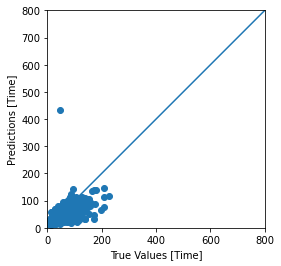

In [18]:
a = plt.axes(aspect='equal')
plt.scatter(real_duration, labels_test)
plt.xlabel('True Values [Time]')
plt.ylabel('Predictions [Time]')
lims = [0, 800]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

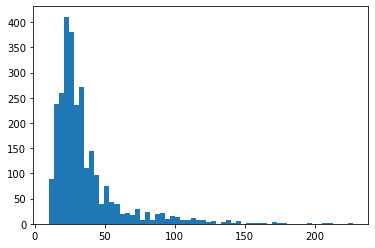

In [19]:
import matplotlib.pyplot as plt

x = real_duration
plt.hist(x, bins = 60)
plt.show()

In [20]:
x.mode()

0    25
dtype: int64

In [21]:
def percCal(x,y):
    return (x-y)*100/x

dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])


Text(0.5, 1.0, 'Ophthalmology')

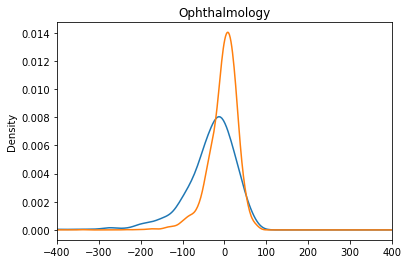

In [22]:
dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_XGboost'].plot(kind='density')
plt.xlim([-400, 400])
plt.title(names_services[i])

In [23]:
#Overutilization
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]

In [24]:
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]

In [25]:
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]

In [26]:
table = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['XGBoost Model', XGBoost_Within, XGBoost_overuse,XGBoost_under]]
print(tabulate(table))

-------------  -------------------  -------------------  -------------------
Model          Within               Overutilization      Underutilization
CUF Model      0.15793330890436058  0.22572370831806524  0.6163429827775742
XGBoost Model  0.2803224624404544   0.38805423231953096  0.33162330524001465
-------------  -------------------  -------------------  -------------------


* #### 3.8.2  Overall with all specialities models  <a class="anchor" id="3.8.2"></a> 

In [27]:
def generalresults(i):
    
    #load model
    planned_bycuf=Loading_models[names_services[i]]["Planned CUF"]
    labels_test=Loading_models[names_services[i]]["Label Test"]
    real_duration=Loading_models[names_services[i]]["Real Duaration"]
    
    #generate table for each speciality
    dataset_predicton = {"Real Duration": real_duration, "Planned by Cuf": planned_bycuf, "Labels from XGBoost": labels_test}
    dataset_predicton=pd.DataFrame(dataset_predicton)
    dataset_predicton
    
    #generate errors for each speciality
    dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
    dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])
    
    #percentage (0-1)- Overutilization
    CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
    XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
    
    # percentage (0-1) - Underutilization
    CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
    XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
    
    #percentage (0-1) - Within
    CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
    XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]
    
    return XGBoost_Within,XGBoost_under,XGBoost_overuse,CUF_Within,CUF_under,CUF_overuse,dataset_predicton.shape[0]

    

In [28]:
#generate a dictionary with labels from XBoost, time Planned by CUF and Real Duration of surgery for each speciality
Overall_results={}  

for i in range(len(names_services)):
    Overall_results.update({names_services[i]:{}})

for i in range(len(names_services)): # as últimas três tem tao poucas cirugias que não é possivel separar 80/20%
    general_results=generalresults(i)
    
    Overall_results[names_services[i]].update({"XGBoost":{"Whithin":general_results[0], "Underuse":general_results[1],"Overuse":general_results[2]}})
    Overall_results[names_services[i]].update({"Planned CUF":{"Whithin":general_results[3],"Underuse":general_results[4],"Overuse":general_results[5]}})
    Overall_results[names_services[i]].update({"Number of Surgeries":general_results[6]})


In [29]:
Number_surgeries=0
Total_Number_surgeries=0

XGBoost_within=0
XGBoost_under=0
XGBoost_over=0

CUF_within=0
CUF_under=0
CUF_over=0

for i in range(len(names_services)):
    
    Number_surgeries=Overall_results[names_services[i]]["Number of Surgeries"]
    Total_Number_surgeries=Total_Number_surgeries+Overall_results[names_services[i]]["Number of Surgeries"]
    
    XGBoost_within=XGBoost_within+Overall_results[names_services[i]]["XGBoost"]["Whithin"]*Number_surgeries
    XGBoost_under=XGBoost_under+Overall_results[names_services[i]]["XGBoost"]["Underuse"]*Number_surgeries
    XGBoost_over=XGBoost_over+Overall_results[names_services[i]]["XGBoost"]["Overuse"]*Number_surgeries
    
    CUF_within=CUF_within+Overall_results[names_services[i]]["Planned CUF"]["Whithin"]*Number_surgeries
    CUF_under=CUF_under+Overall_results[names_services[i]]["Planned CUF"]["Underuse"]*Number_surgeries
    CUF_over=CUF_over+Overall_results[names_services[i]]["Planned CUF"]["Overuse"]*Number_surgeries
    
Total_XGBoost_within=XGBoost_within/Total_Number_surgeries
Total_XGBoost_under=XGBoost_under/Total_Number_surgeries
Total_XGBoost_over=XGBoost_over/Total_Number_surgeries
Total_CUF_within=CUF_within/Total_Number_surgeries
Total_CUF_under=CUF_under/Total_Number_surgeries
Total_CUF_over=CUF_over/Total_Number_surgeries
    
    
    
    

In [30]:
table_overall = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', Total_CUF_within, Total_CUF_over,Total_CUF_under], ['XGBoost Model', Total_XGBoost_within, Total_XGBoost_over,Total_XGBoost_under]]
print(tabulate(table_overall))

-------------  -------------------  -------------------  -------------------
Model          Within               Overutilization      Underutilization
CUF Model      0.19004951662343786  0.29032067908512144  0.5196298042914407
XGBoost Model  0.2722824805470408   0.40916057533600564  0.31855694411695357
-------------  -------------------  -------------------  -------------------


In [31]:
name=[]
within=[]
surgeries=[]
cuf=[]
for i in range(len(names_services)):
    name.append(names_services[i])
    within.append(Overall_results[names_services[i]]["XGBoost"]["Whithin"])
    surgeries.append(Overall_results[names_services[i]]["Number of Surgeries"]/0.2)
    cuf.append(Overall_results[names_services[i]]["Planned CUF"]["Whithin"])
    

In [32]:
Within_predictions = {"Speciality": name, "Within XGBoost Predictions": within,"Within CUF Predictions": cuf,"Number of Surgeries": surgeries}

Within_predictions=pd.DataFrame(Within_predictions).sort_values(by='Within XGBoost Predictions',ascending=False)

Within_predictions=Within_predictions.replace(to_replace ="PNEUMOLOGIA", value ="Pulmonology")
Within_predictions=Within_predictions.replace(to_replace ="CIRURGIA CARDÍACA", value ="Cardiac surgery")
Within_predictions=Within_predictions.replace(to_replace ="DERMATOLOGIA", value ="Dermatology")
Within_predictions=Within_predictions.replace(to_replace ="CIRURGIA PEDIÁTRICA", value ="Pediatric Surgery")
Within_predictions=Within_predictions.replace(to_replace ="MEDICINA INTERNA", value ="Internal Medicine")
Within_predictions=Within_predictions.replace(to_replace ="CARDIOLOGIA", value ="Cardiology")
Within_predictions=Within_predictions.replace(to_replace ="GINECOLOGIA OBSTETRÍCIA", value ="Obstetrics and Gynecology")
Within_predictions=Within_predictions.replace(to_replace ="OTORRINOLARINGOLOGIA", value ="Otorhinolaryngology")
Within_predictions=Within_predictions.replace(to_replace ="CIRURGIA GERAL", value ="General surgery")
Within_predictions=Within_predictions.replace(to_replace ="OFTALMOLOGIA", value ="Ophthalmology")
Within_predictions=Within_predictions.replace(to_replace ="Orthopaedics", value ="Orthopedics")
Within_predictions=Within_predictions.replace(to_replace ="CIRURGIA VASCULAR", value ="Vascular Surgery")
Within_predictions=Within_predictions.replace(to_replace ="UROLOGIA", value ="Urology")
Within_predictions=Within_predictions.replace(to_replace ="NEURO-CIRURGIA", value ="Neurosurgery")
Within_predictions=Within_predictions.replace(to_replace ="MEDICINA DENTÁRIA", value ="Dental Medicine")
Within_predictions=Within_predictions.replace(to_replace ="CIR. PLÁSTICA E RECONSTRUTIVA E ESTÉTICA", value ="Plastic, Reconstructive and Aesthetic Surgery")
Within_predictions=Within_predictions.replace(to_replace ="CIRURGIA MAXILO-FACIAL", value ="Maxillofacial Surgery")
Within_predictions=Within_predictions.replace(to_replace ="ANESTESIOLOGIA", value ="Anesthesiology")
Within_predictions=Within_predictions.replace(to_replace ="ANGIOGRAFIA", value ="Angiography")
Within_predictions=Within_predictions.replace(to_replace ="CIRURGIA TORÁCICA", value ="Thoracic Surgery")
Within_predictions=Within_predictions.replace(to_replace ="GASTROENTEROLOGIA", value ="Gastroenterology")

Within_predictions=Within_predictions.set_index('Speciality')
Within_predictions=pd.DataFrame(Within_predictions).sort_values(by='Within XGBoost Predictions',ascending=False)



Within_predictions


,Within XGBoost Predictions,Within CUF Predictions,Number of Surgeries
Speciality,,,
Dermatology,0.428115,0.434505,1565.0
Cardiac surgery,0.359375,0.281250,320.0
Gastroenterology,0.307692,0.153846,65.0
Obstetrics and Gynecology,0.302211,0.194922,6105.0
Otorhinolaryngology,0.294601,0.207160,8520.0
Pediatric Surgery,0.292835,0.171340,1605.0
Vascular Surgery,0.284389,0.151468,3235.0
General surgery,0.282092,0.199683,12620.0
Ophthalmology,0.280322,0.157933,13645.0


Text(0, 0.5, 'Specialty')

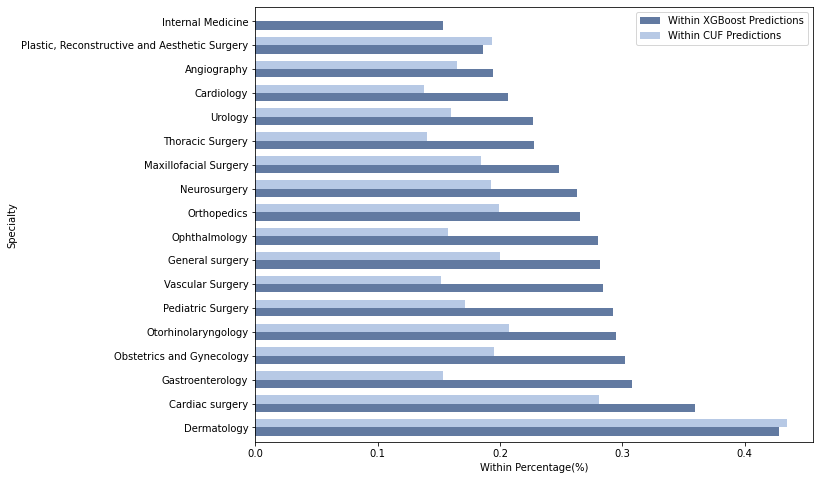

In [33]:
plt.show()
Within_predictions.drop(columns=['Number of Surgeries']).plot(kind='barh',figsize=(10, 8),width=0.7, color=['#627aa1','#b7c9e5'])
plt.xlabel('Within Percentage(%)')
plt.ylabel('Specialty')

* ### 3.9. SHAP Explanation <a class="anchor" id="3.9"></a>


#### 3.9.1  SHAP Summary Plot  <a class="anchor" id="3.9.1"></a> 


In [180]:
#choose a number between 0-20 to choose speciality
i=5



position=names_services[i]

X_shap=splittrain_test_speciality(position)[0] #drop column planned duration
   
bst_speciality = xgb.Booster()
bst_speciality.load_model("Speciality_specific{}.model".format(i))
   
shap_values = shap.TreeExplainer(bst_speciality).shap_values(X_shap)

explainer = shap.Explainer(bst_speciality)
shap_values1 = explainer(X_shap)

print("Prediction to {} speciality ".format(names_services[i]))

Prediction to Orthopedics speciality 


The SHAP values for XGBoost explain the margin output of the model, which is the change in log odds of dying for a Cox proportional hazards model. We can see below that the primary risk to a high use time according to the model is procedures.
This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset. The color allows us match how changes in the value of a feature effect the change in time 

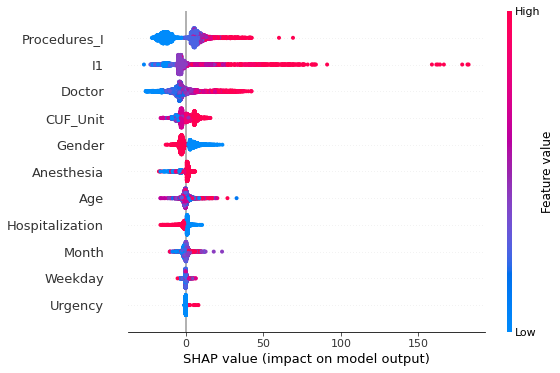

In [208]:

shap.summary_plot(shap_values, X_shap) #3 Vascular Surgery

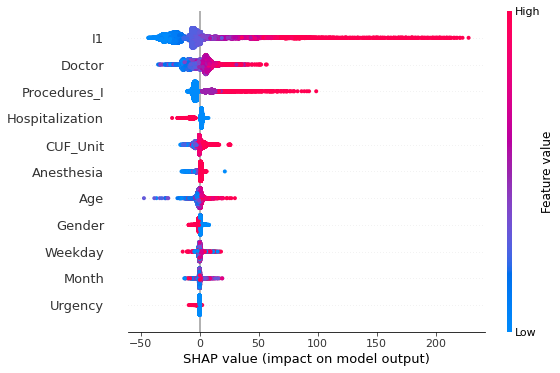

In [212]:
shap.summary_plot(shap_values, X_shap) #3 General surgery

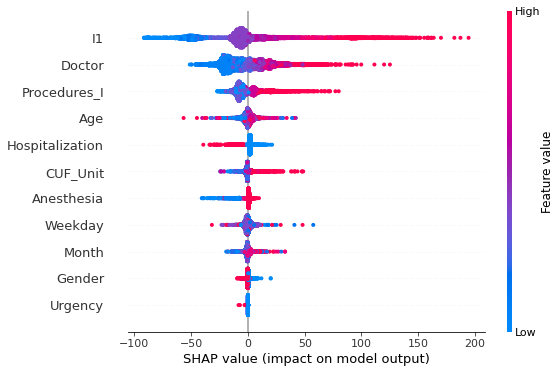

In [210]:
shap.summary_plot(shap_values, X_shap) #3 NEURO-CIRURGIA

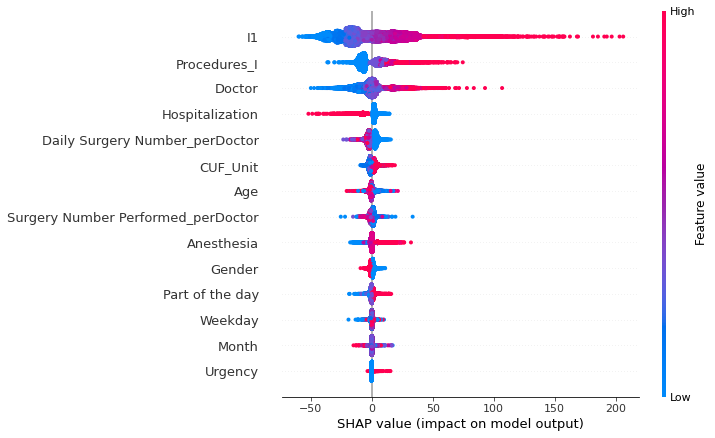

In [181]:
shap.summary_plot(shap_values, X_shap)#ortopedia

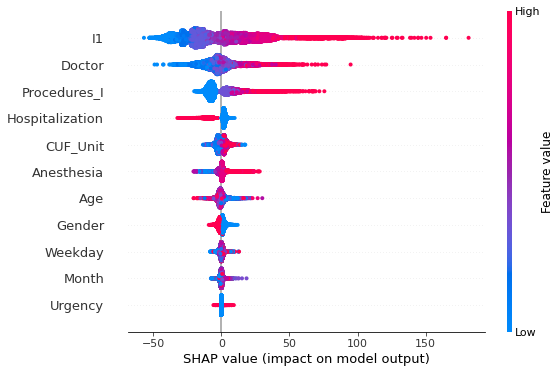

In [200]:
shap.summary_plot(shap_values, X_shap)#ortopedia
#high I1 increases the predicted time
#hospitalization lowers the predicted time
#high number of procedures increases the predicted time
#high number of procedures increases the predicted time

The next explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. 


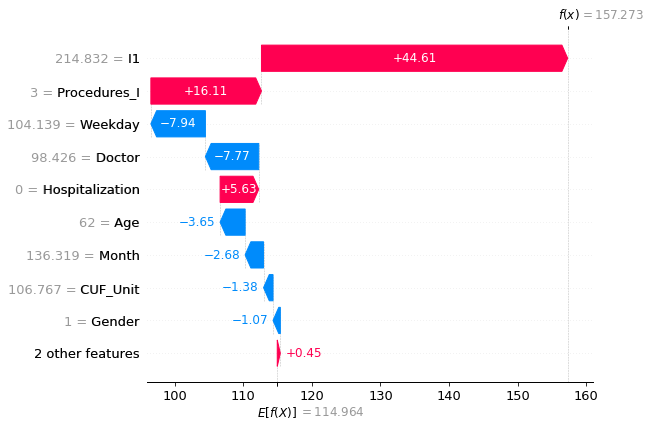

In [91]:
shap.plots.waterfall(shap_values1[1]) #For the first observation
#It starts with the base value 56.658 in the bottom, which is the average of all observations.

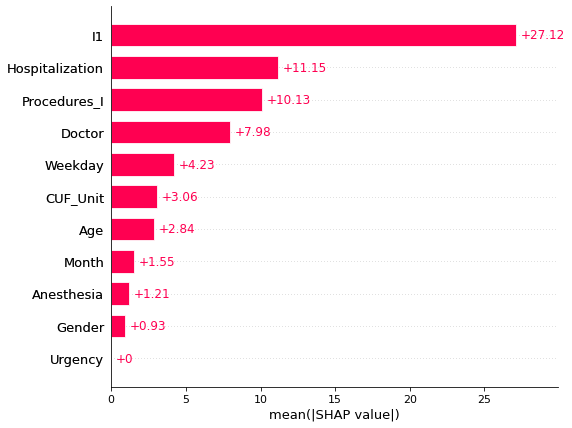

In [92]:
#Bar plot 
shap.plots.bar(shap_values1, max_display=12) # default is max_display=12

#### 3.9.2  SHAP Dependence Plots  <a class="anchor" id="3.9.2"></a> 

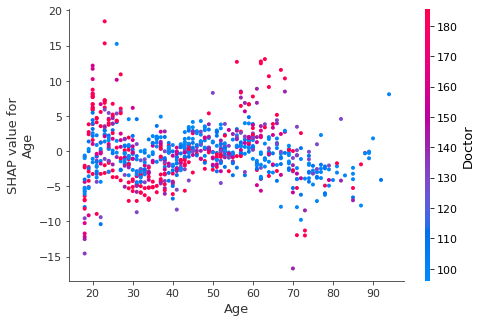

In [93]:
# we pass "Age" instead of an index because dependence_plot() will find it in X's column names for us
# Anestisia was automatically chosen for coloring based on a potential interaction to check that 
# the interaction is really in the model see SHAP interaction values below
shap.dependence_plot("Age", shap_values, X_shap)

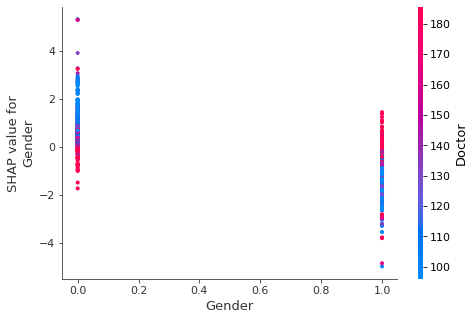

In [94]:
shap.dependence_plot("Gender", shap_values, X_shap)

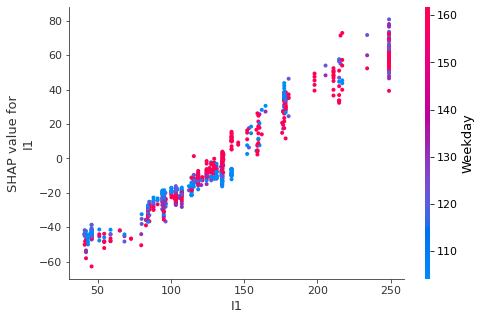

In [95]:

# we pass display_features so we get text display values for sex
shap.dependence_plot("I1", shap_values, X_shap)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


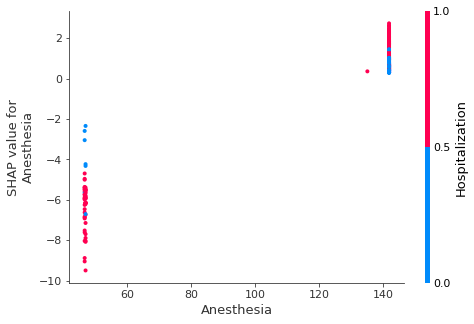

In [96]:
shap.dependence_plot("Anesthesia", shap_values, X_shap)

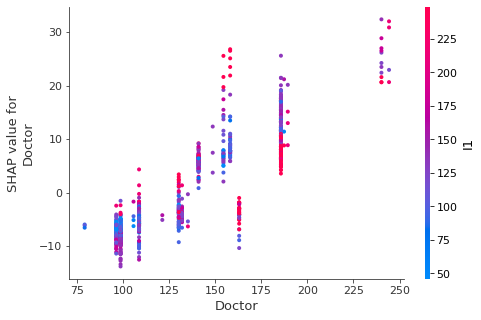

In [97]:
shap.dependence_plot("Doctor", shap_values, X_shap)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


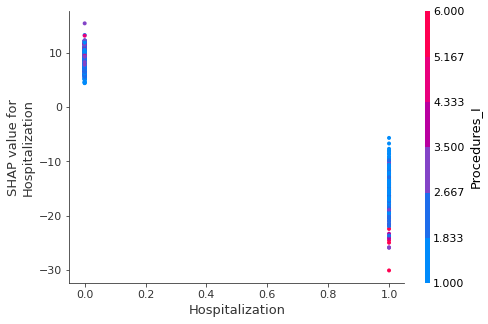

In [98]:
shap.dependence_plot("Hospitalization", shap_values, X_shap)

#### 3.9.3  Compute SHAP Interaction Values  <a class="anchor" id="3.9.3"></a> 

- A summary plot of a SHAP interaction value matrix plots a matrix of summary plots with the main effects on the diagonal and the interaction effects off the diagonal.
- SHAP interaction values are a generalization of SHAP values to higher order interactions. Fast exact computation of pairwise interactions are implemented in the latest version of XGBoost with the pred_interactions flag. With this flag XGBoost returns a matrix for every prediction, where the main effects are on the diagonal and the interaction effects are off-diagonal. The main effects are similar to the SHAP values you would get for a linear model, and the interaction effects captures all the higher-order interactions are divide them up among the pairwise interaction terms. Note that the sum of the entire interaction matrix is the difference between the model's current output and expected output, and so the interaction effects on the off-diagonal are split in half (since there are two of each). When plotting interaction effects the SHAP package automatically multiplies the off-diagonal values by two to get the full interaction effect.

In [ ]:
shap_interaction_values = shap.TreeExplainer(bst_speciality).shap_interaction_values(X_shap)

* #### SHAP Interaction Value Summary Plot
- A summary plot of a SHAP interaction value matrix plots a matrix of summary plots with the main effects on the diagonal and the interaction effects off the diagonal.

In [ ]:
shap.summary_plot(shap_interaction_values, X_shap)

* #### SHAP Interaction Value Dependence Plots

In [ ]:
shap.dependence_plot(
    ("Age","Age"),
    shap_interaction_values, X_shap
)

 The plot below involving age and sex shows that the sex-based gap varies by age and peaks at age 60.

In [ ]:
shap.dependence_plot(
    ("CUF_Unit", "I1"),
    shap_interaction_values, X_shap)

#for ages higher than 65 hold, be female as a positive impact in final prediction(more time)

In [ ]:
shap.dependence_plot(
    ("Hospitalization", "Gender"),
    shap_interaction_values, X_shap
)

In [ ]:
shap.dependence_plot(
    ("Hospitalization", "Gender"),
    shap_interaction_values, X_shap
)

In [ ]:
shap.dependence_plot(
    ("Age", "Doctor"),
    shap_interaction_values, X_shap
)

-------

## 4.  Create Surgeon-specific model <a class="anchor" id="4"></a> 

* #### 375 number of Surgeon-specific models

In [182]:
Datasets_surgeon=Surgeons_Dataset

In [183]:
Datasets_surgeon[list_surgeons[0]]['TrainSet']

,Urgency,Hospitalization,Gender,Daily Surgery Number_perDoctor,Surgery Number Performed_perDoctor,Procedures_I,Real Room Duration,Age,CUF Planned Duration,I1,Part of the day,Speciality,CUF_Unit,Month,Weekday,Anesthesia
283,0,0,1,2,429,1,57,55.0,90,65.072289,72.082667,65.363636,65.020528,60.761905,64.147687,72.663113
688,0,0,0,1,901,2,69,41.0,90,62.780645,72.082667,65.363636,65.020528,60.777778,74.958333,72.663113
90,0,0,0,5,140,3,99,60.0,120,62.780645,51.372549,65.363636,65.020528,62.142857,64.147687,72.663113
741,0,0,1,1,844,1,58,46.0,60,65.072289,86.548387,65.363636,65.020528,80.652174,64.593220,72.663113
675,0,0,0,1,745,1,62,40.0,90,65.072289,72.082667,65.363636,65.020528,61.296296,64.147687,72.663113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,3,581,3,79,49.0,120,62.780645,72.082667,65.363636,65.020528,54.057692,64.147687,51.765714
197,0,0,0,1,24,1,45,60.0,60,62.780645,72.082667,65.363636,65.020528,65.885246,64.147687,72.663113
215,0,0,0,2,238,1,58,53.0,60,77.272187,72.082667,65.363636,65.020528,60.777778,64.147687,72.663113
786,0,0,1,3,858,1,78,68.0,60,65.072289,72.082667,65.363636,65.020528,60.761905,64.147687,72.663113


In [184]:
for i in range(len(Datasets_surgeon)):
    
    Datasets_surgeon[list_surgeons[i]]['TrainSet']['CUF_Unit']=Datasets_surgeon[list_surgeons[i]]['TrainSet']['CUF_Unit'].astype('float')
    Datasets_surgeon[list_surgeons[i]]['TrainSet']['Anesthesia']=Datasets_surgeon[list_surgeons[i]]['TrainSet']['Anesthesia'].astype('float')
    Datasets_surgeon[list_surgeons[i]]['TrainSet']['Speciality']=Datasets_surgeon[list_surgeons[i]]['TrainSet']['Speciality'].astype('float')
    Datasets_surgeon[list_surgeons[i]]['TrainSet']['I1']=Datasets_surgeon[list_surgeons[i]]['TrainSet']['I1'].astype('float')
    Datasets_surgeon[list_surgeons[i]]['TrainSet']['Month']=Datasets_surgeon[list_surgeons[i]]['TrainSet']['Month'].astype('float')
    Datasets_surgeon[list_surgeons[i]]['TrainSet']['Weekday']=Datasets_surgeon[list_surgeons[i]]['TrainSet']['Weekday'].astype('float')
    Datasets_surgeon[list_surgeons[i]]['TrainSet']['Procedures_I']=Datasets_surgeon[list_surgeons[i]]['TrainSet']['Procedures_I'].astype('int64')
    Datasets_surgeon[list_surgeons[i]]['TrainSet']['Daily Surgery Number_perDoctor']=Datasets_surgeon[list_surgeons[i]]['TrainSet']['Daily Surgery Number_perDoctor'].astype('int64')
    Datasets_surgeon[list_surgeons[i]]['TrainSet']['Surgery Number Performed_perDoctor']=Datasets_surgeon[list_surgeons[i]]['TrainSet']['Surgery Number Performed_perDoctor'].astype('int64')
    
    
    Datasets_surgeon[list_surgeons[i]]['TestSet']['Anesthesia']=Datasets_surgeon[list_surgeons[i]]['TestSet']['Anesthesia'].astype('float')
    Datasets_surgeon[list_surgeons[i]]['TestSet']['Speciality']=Datasets_surgeon[list_surgeons[i]]['TestSet']['Speciality'].astype('float')
    Datasets_surgeon[list_surgeons[i]]['TestSet']['CUF_Unit']=Datasets_surgeon[list_surgeons[i]]['TestSet']['CUF_Unit'].astype('float')
    Datasets_surgeon[list_surgeons[i]]['TestSet']['I1']=Datasets_surgeon[list_surgeons[i]]['TestSet']['I1'].astype('float')
    Datasets_surgeon[list_surgeons[i]]['TestSet']['Month']=Datasets_surgeon[list_surgeons[i]]['TestSet']['Month'].astype('float')
    Datasets_surgeon[list_surgeons[i]]['TestSet']['Weekday']=Datasets_surgeon[list_surgeons[i]]['TestSet']['Weekday'].astype('float')
    Datasets_surgeon[list_surgeons[i]]['TestSet']['Procedures_I']=Datasets_surgeon[list_surgeons[i]]['TestSet']['Procedures_I'].astype('int64')
    Datasets_surgeon[list_surgeons[i]]['TestSet']['Daily Surgery Number_perDoctor']=Datasets_surgeon[list_surgeons[i]]['TestSet']['Daily Surgery Number_perDoctor'].astype('int64')
    Datasets_surgeon[list_surgeons[i]]['TestSet']['Surgery Number Performed_perDoctor']=Datasets_surgeon[list_surgeons[i]]['TestSet']['Surgery Number Performed_perDoctor'].astype('int64')
    

* ### 4.2.  Split Data  <a class="anchor" id="4.2"></a> 

In [185]:
#generate labellabel=pd.DataFrame(data['DUR_CIRURGIA_REAL'])
y = {}
X = {}
X_without_label = {}
for i in Datasets_surgeon:
    y[i]=Datasets_surgeon[i]['TrainSet']['Real Room Duration']
    X[i]=Datasets_surgeon[i]['TrainSet']
    X_without_label[i]=Datasets_surgeon[i]['TrainSet'].drop(columns=['Real Room Duration'])


In [186]:
# Train and test split using sklearn
def splittrain_test(i):
    
    X_train=Datasets_surgeon[i]['TrainSet'].reset_index(drop=True)
    X_test=Datasets_surgeon[i]['TestSet'].reset_index(drop=True)
    y_train=Datasets_surgeon[i]['TrainSet']['Real Room Duration'].reset_index(drop=True)
    y_test=Datasets_surgeon[i]['TestSet']['Real Room Duration'].reset_index(drop=True)
    
    
    #this is used to see later how accurate are predictions
    X_train_planned=X_train['CUF Planned Duration'] 
    X_test_planned=X_test['CUF Planned Duration']


    X_train=X_train.drop(columns=['CUF Planned Duration'])
    X_test=X_test.drop(columns=['CUF Planned Duration'])
    
    X_train=X_train.drop(columns=['Real Room Duration'])
    X_test=X_test.drop(columns=['Real Room Duration'])
    
    return X_train, X_test, y_train, y_test, X_train_planned,X_test_planned




In [187]:
Splited_data_Surgeon={} #creation of dictionaries for all 24 models 

for i in range(len(list_surgeons)):
    Splited_data_Surgeon.update({list_surgeons[i]:{}})
    


In [188]:
for i in list_surgeons:
    split=splittrain_test(i)
    matrixes=Dmatrix(i,split)
    
    Splited_data_Surgeon[i].update({"Splitdataset": [split[0],split[1],split[2],split[3],split[4],split[5] ]})
    Splited_data_Surgeon[i].update({"Dmatrixes": [matrixes[0], matrixes[1]]})
   

* ### 4.3.  Setting the optimal hyperparameters of ML model  <a class="anchor" id="4.3"></a> 

#### 4.3.1  Best parameters to **max_depth** and **min_child_weight**  <a class="anchor" id="4.3.1"></a> 

In [189]:
# Define initial best params and MAPE
def best_parameters1(i):
    min_mape = float("Inf")
    best_params = None
    for max_depth, min_child_weight in gridsearch_params:
        
    #print("CV with max_depth={}, min_child_weight={}, eta={}, gamma={}, colsample_bytree={},subsample={}".format(max_depth,min_child_weight,eta,gamma,colsample_bytree,subsample))
    # Update our parameters
        params['max_depth'] = max_depth
        params['min_child_weight'] = min_child_weight
    
    # Run CV
        cv_results = xgb.cv(
            params,
            Splited_data_Surgeon[list_surgeons[i]]["Dmatrixes"][0],
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            feval = xgb_within_mape, #if we want to costumize our Evaluation Metric
        
            #if I want to use both metrics
            #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
            maximize=False,
            early_stopping_rounds=10
        )
    # Update best MAPE
    #mean_within = cv_results['test-within-mean'].min()
    #boost_rounds_within = cv_results['test-within-mean'].argmin()
        mean_mape = cv_results['test-within_mape-mean'].min()
        boost_rounds = cv_results['test-within_mape-mean'].argmin()
    
        mean_total=mean_mape
    #mean_total=mean_within+mean_mape
    #print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
        if mean_total < min_mape:
            min_mape = mean_total
            best_params = (max_depth,min_child_weight)
        
    
    print("Best params {} : max_depth: {}, min_child_weight: {} MAPE: {}".format(i,best_params[0], best_params[1], min_mape))
    return best_params

#### 4.3.2  Best parameters to gamma,colsample_bytree and subsample tune <a class="anchor" id="4.3.2"></a> 


In [190]:
# Define initial best params and MAPE
def best_parameters2(i):
    min_mape = float("Inf")
    best_params_2 = None
    for gamma,colsample_bytree,subsample in gridsearch_params_2:
    #print("CV with max_depth={}, min_child_weight={}, eta={}, gamma={}, colsample_bytree={},subsample={}".format(max_depth,min_child_weight,eta,gamma,colsample_bytree,subsample))
    # Update our parameters
        params['gamma'] = gamma
        params['colsample_bytree'] = colsample_bytree
        params['subsample'] = subsample
    
    # Run CV
        cv_results = xgb.cv(
            params,
            Splited_data_Surgeon[list_surgeons[i]]["Dmatrixes"][0],
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            feval = xgb_within_mape,
        #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
            maximize=False,
            early_stopping_rounds=10
        )
        # Update best MAPE and Within

        #mean_within = cv_results['test-within-mean'].min()
        #boost_rounds_within = cv_results['test-within-mean'].argmin()
        mean_mape = cv_results['test-within_mape-mean'].min()
        boost_rounds = cv_results['test-within_mape-mean'].argmin()

        mean_total=mean_mape
        #mean_total=mean_within+mean_mape #minimize the total mape and 
        #print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
        if mean_total < min_mape:
            min_mape = mean_total
            best_params_2 = (gamma,colsample_bytree,subsample)
    print("Best params: gamma: {},colsample_bytree: {},subsample: {} MAPE: {}".format(best_params_2[0], best_params_2[1],best_params_2[2], min_mape))
    return best_params_2

#### 4.3.3  Best parameters to eta <a class="anchor" id="4.3.3"></a> 


In [191]:
#Best parameter to eta
# This can take some time…
def best_parameters3(i):
    min_mape = float("Inf")
    best_params_eta = None
    for eta in np.arange(0.01, 0.35, 0.005):
        #print("CV with eta={}".format(eta))
        # We update our parameters
        params['eta'] = eta
        # Run CV
        cv_results = xgb.cv(
                params,
                Splited_data_Surgeon[list_surgeons[i]]["Dmatrixes"][0],
                num_boost_round=num_boost_round,
                seed=42,
                nfold=5,
                feval = xgb_within_mape,
                #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
                maximize=False,
                early_stopping_rounds=10
              )
        # Update best score

        #mean_within = cv_results['test-within-mean'].min()
        #boost_rounds_within = cv_results['test-within-mean'].argmin()
        mean_mape = cv_results['test-within_mape-mean'].min()
        boost_rounds = cv_results['test-within_mape-mean'].argmin()

        mean_total=mean_mape
        #mean_total=mean_within+mean_mape #minimize the total mape and within
        #print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
        if mean_total < min_mape:
            min_mape = mean_total
            best_params_eta = eta
    print("Best params: {}, MAPE: {}".format(best_params_eta, min_mape))
    return best_params_eta


* ### 4.4.  Set Parameters of our gradient boosting ensemble  <a class="anchor" id="4.4"></a> 

I used the same funtions created in 3.4.

In [192]:
def set_parameters(i):
    best1=best_parameters1(i)
    best2=best_parameters2(i)
    best3=best_parameters3(i)
    params = {
        # Parameters that we are going to tune.
        'max_depth':best1[0],
        'min_child_weight': best1[1],
        'eta':best3,
        'colsample_bytree': best2[1],
        'subsample': best2[2],
        'gamma': best2[0],
        # Other parameters 
        'objective':'reg:squarederror', # regression MSE
        #the parameter disable_default_eval_metric is used to suppress the default metric in XGBoost.
        'disable_default_eval_metric': 1
    }

    #params['eval_metric'] = "mape"
    num_boost_round = 999
    return params

* ### 4.5.  Training  <a class="anchor" id="4.5"></a> 

In [193]:
def training_with_early_stopping_rounds(i):
    parameters=set_parameters(i)
    model = xgb.train(
        parameters,
        Splited_data_Surgeon[list_surgeons[i]]["Dmatrixes"][0],
        num_boost_round=num_boost_round,
        evals=[(Splited_data_Surgeon[list_surgeons[i]]["Dmatrixes"][1], "Test")],
        early_stopping_rounds=10,
        feval = xgb_within_mape,
        #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
        maximize=False
    )


    #print("Best MAPE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))
    return model.best_score,model.best_iteration+1,parameters


In [194]:
#remove early_stopping_rounds=10 to find best model

#num_boost_round = model.best_iteration + 1

def training_without_early_stopping_rounds(i):
    train_without=training_with_early_stopping_rounds(i)
    num_boost_round=train_without[1]

    best_model = xgb.train(
        train_without[2],
        Splited_data_Surgeon[list_surgeons[i]]["Dmatrixes"][0],
        num_boost_round=num_boost_round,
        evals=[(Splited_data_Surgeon[list_surgeons[i]]["Dmatrixes"][1], "Test")],
        feval = xgb_within_mape,
        #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
        maximize=False
    )


    return train_without[2],best_model




* ### 4.6.  Save Model  <a class="anchor" id="4.6"></a> 


In [195]:
def save_model_Surgeon(i):
    pos_training=training_without_early_stopping_rounds(i)
    best_model=pos_training[1]
    parameters=pos_training[0]
    
    name="Surgeon_specific{}.model".format(i)
    best_model.save_model(name)
    
    return best_model,parameters,name

In [196]:
Dictionary_Surgeon_models={} #creation of dictionaries for all 24 models 

for i in range(len(list_surgeons)):
    Dictionary_Surgeon_models.update({list_surgeons[i]:{}})

#this_dict = {}this_dict = {}

In [197]:
for i in range(len(list_surgeons)):
    
    Dictionary_Surgeon_models[list_surgeons[i]].update({"Data": [X[list_surgeons[i]], y[list_surgeons[i]]]})
    model=save_model_Surgeon(i)
    Dictionary_Surgeon_models[list_surgeons[i]].update({"BestParameters": [model[0],model[1],model[2]]})

Best params 0 : max_depth: 12, min_child_weight: 7 MAPE: -0.10241720000000001
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 1.0 MAPE: -0.0935084
Best params: 0.175, MAPE: -0.0965192
[0]	Test-within_mape:0.80974
[1]	Test-within_mape:0.65961
[2]	Test-within_mape:0.53800
[3]	Test-within_mape:0.43008
[4]	Test-within_mape:0.31695
[5]	Test-within_mape:0.23590
[6]	Test-within_mape:0.12045
[7]	Test-within_mape:-0.01600
[8]	Test-within_mape:-0.08000
[9]	Test-within_mape:-0.13022
[10]	Test-within_mape:-0.14630
[11]	Test-within_mape:-0.17462
[12]	Test-within_mape:-0.18780
[13]	Test-within_mape:-0.17609
[14]	Test-within_mape:-0.14961
[15]	Test-within_mape:-0.17311
[16]	Test-within_mape:-0.14861
[17]	Test-within_mape:-0.19619
[18]	Test-within_mape:-0.17023
[19]	Test-within_mape:-0.14554
[20]	Test-within_mape:-0.12182
[21]	Test-within_mape:-0.10204
[22]	Test-within_mape:-0.10063
[23]	Test-within_mape:-0.10011
[24]	Test-within_mape:-0.09581
[25]	Test-within_mape:-0.07274
[26]	Test-within_m

[12]	Test-within_mape:-0.00984
[13]	Test-within_mape:-0.00854
[14]	Test-within_mape:-0.04415
Best params 5 : max_depth: 3, min_child_weight: 1 MAPE: -0.10351099999999999
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 1.0 MAPE: -0.0808286
Best params: 0.32999999999999996, MAPE: -0.0931716
[0]	Test-within_mape:0.61519
[1]	Test-within_mape:0.38482
[2]	Test-within_mape:0.13150
[3]	Test-within_mape:0.01160
[4]	Test-within_mape:0.00217
[5]	Test-within_mape:0.16419
[6]	Test-within_mape:0.24822
[7]	Test-within_mape:0.17613
[8]	Test-within_mape:0.10780
[9]	Test-within_mape:0.12132
[10]	Test-within_mape:0.13061
[11]	Test-within_mape:0.13334
[12]	Test-within_mape:0.12945
[13]	Test-within_mape:0.12647
[0]	Test-within_mape:0.61519
[1]	Test-within_mape:0.38482
[2]	Test-within_mape:0.13150
[3]	Test-within_mape:0.01160
[4]	Test-within_mape:0.00217
Best params 6 : max_depth: 3, min_child_weight: 4 MAPE: -0.15530300000000002
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 0.8 MAPE: -0

[6]	Test-within_mape:0.03244
[7]	Test-within_mape:-0.02924
[8]	Test-within_mape:-0.21809
[9]	Test-within_mape:-0.14544
[10]	Test-within_mape:-0.18277
[11]	Test-within_mape:-0.15984
[12]	Test-within_mape:-0.27757
[13]	Test-within_mape:-0.27937
[14]	Test-within_mape:-0.27986
[15]	Test-within_mape:-0.30499
[16]	Test-within_mape:-0.30670
[17]	Test-within_mape:-0.30674
[18]	Test-within_mape:-0.25011
[19]	Test-within_mape:-0.25010
[20]	Test-within_mape:-0.21884
[21]	Test-within_mape:-0.21752
[22]	Test-within_mape:-0.18533
[23]	Test-within_mape:-0.15671
[24]	Test-within_mape:-0.12992
[25]	Test-within_mape:-0.21476
[26]	Test-within_mape:-0.24334
[0]	Test-within_mape:0.79473
[1]	Test-within_mape:0.63828
[2]	Test-within_mape:0.50874
[3]	Test-within_mape:0.41103
[4]	Test-within_mape:0.27831
[5]	Test-within_mape:0.24658
[6]	Test-within_mape:0.03244
[7]	Test-within_mape:-0.02924
[8]	Test-within_mape:-0.21809
[9]	Test-within_mape:-0.14544
[10]	Test-within_mape:-0.18277
[11]	Test-within_mape:-0.15984

[15]	Test-within_mape:-0.13502
[16]	Test-within_mape:-0.17274
[17]	Test-within_mape:-0.22770
[18]	Test-within_mape:-0.24564
[19]	Test-within_mape:-0.23013
[20]	Test-within_mape:-0.22877
[21]	Test-within_mape:-0.21161
[22]	Test-within_mape:-0.19255
[23]	Test-within_mape:-0.17331
[24]	Test-within_mape:-0.19205
[25]	Test-within_mape:-0.17294
[26]	Test-within_mape:-0.17116
[27]	Test-within_mape:-0.17147
[0]	Test-within_mape:0.87499
[1]	Test-within_mape:0.77167
[2]	Test-within_mape:0.68091
[3]	Test-within_mape:0.59507
[4]	Test-within_mape:0.52446
[5]	Test-within_mape:0.42687
[6]	Test-within_mape:0.35341
[7]	Test-within_mape:0.30589
[8]	Test-within_mape:0.23069
[9]	Test-within_mape:0.19578
[10]	Test-within_mape:0.12073
[11]	Test-within_mape:0.03189
[12]	Test-within_mape:-0.02238
[13]	Test-within_mape:-0.08817
[14]	Test-within_mape:-0.11374
[15]	Test-within_mape:-0.13502
[16]	Test-within_mape:-0.17274
[17]	Test-within_mape:-0.22770
[18]	Test-within_mape:-0.24564
Best params 17 : max_depth: 3,

[9]	Test-within_mape:-0.12954
[10]	Test-within_mape:-0.19260
[11]	Test-within_mape:-0.23283
[12]	Test-within_mape:-0.23727
[13]	Test-within_mape:-0.26003
[14]	Test-within_mape:-0.26138
[15]	Test-within_mape:-0.20043
[16]	Test-within_mape:-0.19937
[17]	Test-within_mape:-0.26302
[18]	Test-within_mape:-0.25676
[19]	Test-within_mape:-0.25629
[20]	Test-within_mape:-0.26014
[21]	Test-within_mape:-0.26273
[22]	Test-within_mape:-0.26232
[23]	Test-within_mape:-0.26231
[24]	Test-within_mape:-0.26347
[25]	Test-within_mape:-0.26242
[26]	Test-within_mape:-0.22393
[27]	Test-within_mape:-0.20075
[28]	Test-within_mape:-0.27910
[29]	Test-within_mape:-0.27795
[30]	Test-within_mape:-0.27855
[31]	Test-within_mape:-0.27861
[32]	Test-within_mape:-0.25887
[33]	Test-within_mape:-0.26008
[34]	Test-within_mape:-0.30411
[35]	Test-within_mape:-0.30437
[36]	Test-within_mape:-0.30428
[37]	Test-within_mape:-0.34659
[38]	Test-within_mape:-0.32141
[39]	Test-within_mape:-0.32480
[40]	Test-within_mape:-0.32780
[41]	Test

[20]	Test-within_mape:-0.09008
[21]	Test-within_mape:-0.06736
[22]	Test-within_mape:-0.06566
[23]	Test-within_mape:-0.06532
[24]	Test-within_mape:-0.10478
[25]	Test-within_mape:-0.10646
[26]	Test-within_mape:-0.08659
[27]	Test-within_mape:-0.08803
[28]	Test-within_mape:-0.10574
[29]	Test-within_mape:-0.04758
[30]	Test-within_mape:-0.04611
[31]	Test-within_mape:-0.08472
[32]	Test-within_mape:-0.12374
[33]	Test-within_mape:-0.10403
[34]	Test-within_mape:-0.10233
[35]	Test-within_mape:-0.12047
[36]	Test-within_mape:-0.10070
[37]	Test-within_mape:-0.13863
[38]	Test-within_mape:-0.12002
[39]	Test-within_mape:-0.10249
[40]	Test-within_mape:-0.16058
Best params 24 : max_depth: 5, min_child_weight: 1 MAPE: 0.007446999999999998
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 0.7 MAPE: 0.015145399999999998
Best params: 0.26999999999999996, MAPE: 0.0060039999999999955
[0]	Test-within_mape:0.68046
[1]	Test-within_mape:0.47965
[2]	Test-within_mape:0.22789
[3]	Test-within_mape:0.10530
[4]	T

[2]	Test-within_mape:0.17839
[3]	Test-within_mape:0.14522
[4]	Test-within_mape:0.13123
[5]	Test-within_mape:0.04680
[6]	Test-within_mape:0.00108
[7]	Test-within_mape:0.06275
[8]	Test-within_mape:0.18919
[9]	Test-within_mape:0.14389
[10]	Test-within_mape:0.21995
[11]	Test-within_mape:0.15126
[12]	Test-within_mape:0.23435
[13]	Test-within_mape:0.24523
[14]	Test-within_mape:0.19208
[15]	Test-within_mape:0.20303
[0]	Test-within_mape:0.56800
[1]	Test-within_mape:0.45583
[2]	Test-within_mape:0.17839
[3]	Test-within_mape:0.14522
[4]	Test-within_mape:0.13123
[5]	Test-within_mape:0.04680
[6]	Test-within_mape:0.00108
Best params 31 : max_depth: 11, min_child_weight: 7 MAPE: 0.2038956
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 1.0 MAPE: 0.2038956
Best params: 0.20999999999999996, MAPE: 0.18079260000000003
[0]	Test-within_mape:0.73645
[1]	Test-within_mape:0.55100
[2]	Test-within_mape:0.37131
[3]	Test-within_mape:0.30873
[4]	Test-within_mape:0.22124
[5]	Test-within_mape:0.23208
[6]	Te

[10]	Test-within_mape:0.24106
[11]	Test-within_mape:0.21518
[12]	Test-within_mape:0.02159
[13]	Test-within_mape:-0.04825
[14]	Test-within_mape:0.00307
[15]	Test-within_mape:0.00207
[16]	Test-within_mape:-0.01145
[17]	Test-within_mape:-0.13193
[18]	Test-within_mape:-0.12883
[19]	Test-within_mape:-0.19441
[20]	Test-within_mape:-0.19830
[21]	Test-within_mape:-0.20020
[22]	Test-within_mape:-0.26252
[23]	Test-within_mape:-0.26052
[24]	Test-within_mape:-0.20326
[25]	Test-within_mape:-0.31846
[26]	Test-within_mape:-0.26135
[27]	Test-within_mape:-0.26300
[28]	Test-within_mape:-0.25843
[29]	Test-within_mape:-0.25348
[30]	Test-within_mape:-0.13138
[31]	Test-within_mape:-0.12907
[32]	Test-within_mape:-0.13197
[33]	Test-within_mape:-0.13325
[34]	Test-within_mape:-0.12856
[0]	Test-within_mape:0.87686
[1]	Test-within_mape:0.76832
[2]	Test-within_mape:0.68254
[3]	Test-within_mape:0.59694
[4]	Test-within_mape:0.52890
[5]	Test-within_mape:0.46912
[6]	Test-within_mape:0.35463
[7]	Test-within_mape:0.2578

[47]	Test-within_mape:-0.28315
[48]	Test-within_mape:-0.28226
[49]	Test-within_mape:-0.28331
[50]	Test-within_mape:-0.28317
[51]	Test-within_mape:-0.28495
[52]	Test-within_mape:-0.28495
[53]	Test-within_mape:-0.28710
Best params 40 : max_depth: 7, min_child_weight: 4 MAPE: -0.06415599999999999
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 0.9 MAPE: -0.05000400000000001
Best params: 0.09499999999999999, MAPE: -0.0626012
[0]	Test-within_mape:0.88619
[1]	Test-within_mape:0.79888
[2]	Test-within_mape:0.71998
[3]	Test-within_mape:0.64835
[4]	Test-within_mape:0.58500
[5]	Test-within_mape:0.50256
[6]	Test-within_mape:0.45445
[7]	Test-within_mape:0.41092
[8]	Test-within_mape:0.39474
[9]	Test-within_mape:0.36278
[10]	Test-within_mape:0.21877
[11]	Test-within_mape:0.19165
[12]	Test-within_mape:0.12094
[13]	Test-within_mape:0.03421
[14]	Test-within_mape:-0.00247
[15]	Test-within_mape:0.00961
[16]	Test-within_mape:-0.02041
[17]	Test-within_mape:-0.00812
[18]	Test-within_mape:-0.08289
[1

[21]	Test-within_mape:0.04613
[22]	Test-within_mape:0.11983
[23]	Test-within_mape:0.11793
[24]	Test-within_mape:0.11669
[25]	Test-within_mape:0.11640
[26]	Test-within_mape:0.03963
[27]	Test-within_mape:0.03563
[28]	Test-within_mape:0.03149
[29]	Test-within_mape:0.10622
[30]	Test-within_mape:0.10856
[31]	Test-within_mape:0.18551
[32]	Test-within_mape:0.18558
[33]	Test-within_mape:0.18483
[34]	Test-within_mape:0.18829
[35]	Test-within_mape:0.11329
[36]	Test-within_mape:0.11316
[37]	Test-within_mape:0.19252
[38]	Test-within_mape:0.11545
[0]	Test-within_mape:0.87596
[1]	Test-within_mape:0.78281
[2]	Test-within_mape:0.70890
[3]	Test-within_mape:0.64150
[4]	Test-within_mape:0.48608
[5]	Test-within_mape:0.35265
[6]	Test-within_mape:0.40081
[7]	Test-within_mape:0.36714
[8]	Test-within_mape:0.42773
[9]	Test-within_mape:0.40501
[10]	Test-within_mape:0.38448
[11]	Test-within_mape:0.36146
[12]	Test-within_mape:0.33883
[13]	Test-within_mape:0.25068
[14]	Test-within_mape:0.15785
[15]	Test-within_map

[5]	Test-within_mape:-0.21373
[6]	Test-within_mape:-0.21796
[7]	Test-within_mape:-0.21732
[8]	Test-within_mape:-0.31204
[9]	Test-within_mape:-0.31186
[10]	Test-within_mape:-0.41147
[11]	Test-within_mape:-0.41954
Best params 50 : max_depth: 4, min_child_weight: 3 MAPE: -0.1437492
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 0.9 MAPE: -0.129153
Best params: 0.18999999999999997, MAPE: -0.1085268
[0]	Test-within_mape:0.78670
[1]	Test-within_mape:0.62809
[2]	Test-within_mape:0.43407
[3]	Test-within_mape:0.43134
[4]	Test-within_mape:0.29567
[5]	Test-within_mape:0.10185
[6]	Test-within_mape:0.14803
[7]	Test-within_mape:0.06421
[8]	Test-within_mape:-0.09422
[9]	Test-within_mape:-0.10100
[10]	Test-within_mape:-0.10366
[11]	Test-within_mape:-0.02177
[12]	Test-within_mape:-0.01495
[13]	Test-within_mape:-0.09384
[14]	Test-within_mape:-0.09085
[15]	Test-within_mape:-0.09087
[16]	Test-within_mape:-0.08575
[17]	Test-within_mape:-0.00279
[18]	Test-within_mape:0.00671
[19]	Test-within_mape:

[1]	Test-within_mape:0.49939
[2]	Test-within_mape:0.19280
[3]	Test-within_mape:0.25261
[4]	Test-within_mape:0.08448
[5]	Test-within_mape:-0.03112
[6]	Test-within_mape:-0.07533
[7]	Test-within_mape:-0.10536
[8]	Test-within_mape:-0.13576
[9]	Test-within_mape:-0.16834
[10]	Test-within_mape:-0.13288
[11]	Test-within_mape:-0.09769
[12]	Test-within_mape:-0.09170
[13]	Test-within_mape:-0.08492
[14]	Test-within_mape:-0.08561
[15]	Test-within_mape:-0.12133
[16]	Test-within_mape:-0.15468
[17]	Test-within_mape:-0.15276
[18]	Test-within_mape:-0.18267
Best params 56 : max_depth: 3, min_child_weight: 3 MAPE: -0.2390196
Best params: gamma: 0.0,colsample_bytree: 0.7,subsample: 1.0 MAPE: -0.17320839999999998
Best params: 0.205, MAPE: -0.17098359999999999
[0]	Test-within_mape:0.71451
[1]	Test-within_mape:0.52449
[2]	Test-within_mape:0.33098
[3]	Test-within_mape:0.35054
[4]	Test-within_mape:0.22656
[5]	Test-within_mape:-0.02334
[6]	Test-within_mape:0.04446
[7]	Test-within_mape:0.04683
[8]	Test-within_map

[32]	Test-within_mape:-0.15886
[33]	Test-within_mape:-0.15944
[34]	Test-within_mape:-0.20264
[35]	Test-within_mape:-0.20261
[36]	Test-within_mape:-0.24570
Best params 61 : max_depth: 6, min_child_weight: 7 MAPE: -0.0279042
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 0.9 MAPE: -0.027385400000000004
Best params: 0.13499999999999998, MAPE: -0.057562800000000004
[0]	Test-within_mape:0.85973
[1]	Test-within_mape:0.74117
[2]	Test-within_mape:0.64718
[3]	Test-within_mape:0.49418
[4]	Test-within_mape:0.39747
[5]	Test-within_mape:0.38596
[6]	Test-within_mape:0.38982
[7]	Test-within_mape:0.36946
[8]	Test-within_mape:0.34846
[9]	Test-within_mape:0.30317
[10]	Test-within_mape:0.31987
[11]	Test-within_mape:0.31340
[12]	Test-within_mape:0.21573
[13]	Test-within_mape:0.17125
[14]	Test-within_mape:0.16308
[15]	Test-within_mape:0.15844
[16]	Test-within_mape:0.16613
[17]	Test-within_mape:0.16169
[18]	Test-within_mape:0.12466
[19]	Test-within_mape:0.09334
[20]	Test-within_mape:0.09594
[21]	T

[4]	Test-within_mape:0.07259
[5]	Test-within_mape:0.06754
Best params 66 : max_depth: 5, min_child_weight: 1 MAPE: -0.039123200000000004
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 0.9 MAPE: -0.0316464
Best params: 0.26499999999999996, MAPE: -0.051854999999999984
[0]	Test-within_mape:0.70583
[1]	Test-within_mape:0.48826
[2]	Test-within_mape:0.25670
[3]	Test-within_mape:0.06754
[4]	Test-within_mape:-0.17769
[5]	Test-within_mape:-0.12369
[6]	Test-within_mape:-0.11459
[7]	Test-within_mape:-0.05845
[8]	Test-within_mape:-0.01021
[9]	Test-within_mape:0.00048
[10]	Test-within_mape:0.00453
[11]	Test-within_mape:0.05582
[12]	Test-within_mape:0.06386
[13]	Test-within_mape:0.01676
[14]	Test-within_mape:0.01898
[0]	Test-within_mape:0.70583
[1]	Test-within_mape:0.48826
[2]	Test-within_mape:0.25670
[3]	Test-within_mape:0.06754
[4]	Test-within_mape:-0.17769
Best params 67 : max_depth: 6, min_child_weight: 5 MAPE: -0.1153372
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 0.9 MAP

[10]	Test-within_mape:0.10658
[11]	Test-within_mape:0.11599
[12]	Test-within_mape:0.15764
[13]	Test-within_mape:0.15321
[14]	Test-within_mape:0.15093
[15]	Test-within_mape:0.15107
[16]	Test-within_mape:0.15138
[17]	Test-within_mape:0.15451
[18]	Test-within_mape:0.15361
[0]	Test-within_mape:0.80854
[1]	Test-within_mape:0.65110
[2]	Test-within_mape:0.48240
[3]	Test-within_mape:0.36554
[4]	Test-within_mape:0.26220
[5]	Test-within_mape:0.25840
[6]	Test-within_mape:0.10809
[7]	Test-within_mape:0.10072
[8]	Test-within_mape:0.05982
[9]	Test-within_mape:0.05942
Best params 71 : max_depth: 6, min_child_weight: 2 MAPE: -0.061727199999999996
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 0.7 MAPE: -0.006493799999999999
Best params: 0.20999999999999996, MAPE: -0.0152526
[0]	Test-within_mape:0.73889
[1]	Test-within_mape:0.55681
[2]	Test-within_mape:0.50195
[3]	Test-within_mape:0.38494
[4]	Test-within_mape:0.23755
[5]	Test-within_mape:0.11163
[6]	Test-within_mape:0.18622
[7]	Test-within_ma

[5]	Test-within_mape:-0.28918
Best params 76 : max_depth: 13, min_child_weight: 7 MAPE: -0.036091200000000004
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 1.0 MAPE: -0.033315399999999995
Best params: 0.295, MAPE: -0.053886
[0]	Test-within_mape:0.68845
[1]	Test-within_mape:0.44592
[2]	Test-within_mape:0.26482
[3]	Test-within_mape:0.16868
[4]	Test-within_mape:0.11038
[5]	Test-within_mape:0.01523
[6]	Test-within_mape:-0.07943
[7]	Test-within_mape:-0.16762
[8]	Test-within_mape:-0.19743
[9]	Test-within_mape:-0.21504
[10]	Test-within_mape:-0.17783
[11]	Test-within_mape:-0.10139
[12]	Test-within_mape:-0.03860
[13]	Test-within_mape:-0.03378
[14]	Test-within_mape:0.02184
[15]	Test-within_mape:0.03374
[16]	Test-within_mape:0.06917
[17]	Test-within_mape:0.07899
[18]	Test-within_mape:0.10906
[19]	Test-within_mape:0.14791
[0]	Test-within_mape:0.68845
[1]	Test-within_mape:0.44592
[2]	Test-within_mape:0.26482
[3]	Test-within_mape:0.16868
[4]	Test-within_mape:0.11038
[5]	Test-within_mape:0

[5]	Test-within_mape:0.38769
[6]	Test-within_mape:0.26830
[7]	Test-within_mape:0.09584
[8]	Test-within_mape:-0.00663
[9]	Test-within_mape:-0.09694
[10]	Test-within_mape:-0.17786
Best params 83 : max_depth: 7, min_child_weight: 7 MAPE: -0.015454400000000002
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 1.0 MAPE: 0.0016298000000000007
Best params: 0.205, MAPE: -0.014472400000000002
[0]	Test-within_mape:0.75388
[1]	Test-within_mape:0.53751
[2]	Test-within_mape:0.41882
[3]	Test-within_mape:0.21838
[4]	Test-within_mape:0.20301
[5]	Test-within_mape:0.10912
[6]	Test-within_mape:0.11533
[7]	Test-within_mape:0.09348
[8]	Test-within_mape:0.10724
[9]	Test-within_mape:0.11043
[10]	Test-within_mape:0.10726
[11]	Test-within_mape:0.16528
[12]	Test-within_mape:0.17438
[13]	Test-within_mape:0.18357
[14]	Test-within_mape:0.18285
[15]	Test-within_mape:0.19303
[16]	Test-within_mape:0.17834
[0]	Test-within_mape:0.75388
[1]	Test-within_mape:0.53751
[2]	Test-within_mape:0.41882
[3]	Test-within_map

[6]	Test-within_mape:0.01023
[7]	Test-within_mape:-0.05450
[8]	Test-within_mape:0.02406
[9]	Test-within_mape:0.01685
[10]	Test-within_mape:0.06381
[11]	Test-within_mape:0.09886
[12]	Test-within_mape:0.01663
[13]	Test-within_mape:0.02555
[14]	Test-within_mape:-0.02238
[15]	Test-within_mape:-0.06457
[16]	Test-within_mape:-0.06116
[17]	Test-within_mape:-0.06462
[18]	Test-within_mape:-0.05324
[19]	Test-within_mape:0.03546
[20]	Test-within_mape:-0.04566
[21]	Test-within_mape:-0.08664
[22]	Test-within_mape:-0.08476
[23]	Test-within_mape:-0.03568
[24]	Test-within_mape:-0.03411
[25]	Test-within_mape:-0.03650
[26]	Test-within_mape:-0.04005
[27]	Test-within_mape:-0.04057
[28]	Test-within_mape:0.00570
[29]	Test-within_mape:-0.02692
[30]	Test-within_mape:-0.01614
[0]	Test-within_mape:0.82576
[1]	Test-within_mape:0.68139
[2]	Test-within_mape:0.56284
[3]	Test-within_mape:0.46848
[4]	Test-within_mape:0.34666
[5]	Test-within_mape:0.18990
[6]	Test-within_mape:0.01023
[7]	Test-within_mape:-0.05450
[8]	T

[22]	Test-within_mape:0.27734
[23]	Test-within_mape:0.28222
[24]	Test-within_mape:0.29014
[25]	Test-within_mape:0.28887
[26]	Test-within_mape:0.28794
[0]	Test-within_mape:0.69097
[1]	Test-within_mape:0.51444
[2]	Test-within_mape:0.28728
[3]	Test-within_mape:0.34766
[4]	Test-within_mape:0.33852
[5]	Test-within_mape:0.34224
[6]	Test-within_mape:0.30814
[7]	Test-within_mape:0.28604
[8]	Test-within_mape:0.29913
[9]	Test-within_mape:0.36344
[10]	Test-within_mape:0.37242
[11]	Test-within_mape:0.37043
[12]	Test-within_mape:0.37532
[13]	Test-within_mape:0.32469
[14]	Test-within_mape:0.32942
[15]	Test-within_mape:0.33234
[16]	Test-within_mape:0.33038
[17]	Test-within_mape:0.27652
Best params 94 : max_depth: 3, min_child_weight: 7 MAPE: -0.1278336
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 0.8 MAPE: -0.1255344
Best params: 0.11999999999999998, MAPE: -0.10920580000000002
[0]	Test-within_mape:0.85952
[1]	Test-within_mape:0.73607
[2]	Test-within_mape:0.64669
[3]	Test-within_mape:0.575

[16]	Test-within_mape:0.01858
[17]	Test-within_mape:0.02125
[18]	Test-within_mape:0.02452
[19]	Test-within_mape:0.08153
[20]	Test-within_mape:0.09265
[21]	Test-within_mape:0.09497
[22]	Test-within_mape:0.14585
[0]	Test-within_mape:0.86450
[1]	Test-within_mape:0.75221
[2]	Test-within_mape:0.65172
[3]	Test-within_mape:0.56454
[4]	Test-within_mape:0.48642
[5]	Test-within_mape:0.37227
[6]	Test-within_mape:0.32461
[7]	Test-within_mape:0.18544
[8]	Test-within_mape:0.05541
[9]	Test-within_mape:0.03538
[10]	Test-within_mape:0.01960
[11]	Test-within_mape:0.06419
[12]	Test-within_mape:0.00974
[13]	Test-within_mape:-0.03560
Best params 99 : max_depth: 7, min_child_weight: 7 MAPE: -0.0890296
Best params: gamma: 0.1,colsample_bytree: 0.8,subsample: 0.9 MAPE: -0.041233399999999996
Best params: 0.01, MAPE: -0.038106
[0]	Test-within_mape:0.96552
[1]	Test-within_mape:0.95473
[2]	Test-within_mape:0.94421
[3]	Test-within_mape:0.93350
[4]	Test-within_mape:0.92255
[5]	Test-within_mape:0.91220
[6]	Test-with

Best params: 0.27499999999999997, MAPE: 0.13953359999999998
[0]	Test-within_mape:0.62887
[1]	Test-within_mape:0.46157
[2]	Test-within_mape:0.31632
[3]	Test-within_mape:0.13089
[4]	Test-within_mape:0.26331
[5]	Test-within_mape:0.24593
[6]	Test-within_mape:0.28663
[7]	Test-within_mape:0.25449
[8]	Test-within_mape:0.25666
[9]	Test-within_mape:0.26082
[10]	Test-within_mape:0.20853
[11]	Test-within_mape:0.08617
[12]	Test-within_mape:0.08252
[13]	Test-within_mape:0.16173
[14]	Test-within_mape:0.16385
[15]	Test-within_mape:0.15888
[16]	Test-within_mape:0.18449
[17]	Test-within_mape:0.26596
[18]	Test-within_mape:0.35347
[19]	Test-within_mape:0.34896
[20]	Test-within_mape:0.34248
[21]	Test-within_mape:0.27614
[22]	Test-within_mape:0.35200
[0]	Test-within_mape:0.62887
[1]	Test-within_mape:0.46157
[2]	Test-within_mape:0.31632
[3]	Test-within_mape:0.13089
[4]	Test-within_mape:0.26331
[5]	Test-within_mape:0.24593
[6]	Test-within_mape:0.28663
[7]	Test-within_mape:0.25449
[8]	Test-within_mape:0.25666

[5]	Test-within_mape:0.33131
[6]	Test-within_mape:0.22352
[7]	Test-within_mape:0.17422
[8]	Test-within_mape:0.14214
[9]	Test-within_mape:0.07106
[10]	Test-within_mape:0.06170
[11]	Test-within_mape:-0.04605
[12]	Test-within_mape:0.00272
[13]	Test-within_mape:-0.00090
[14]	Test-within_mape:-0.00194
[15]	Test-within_mape:-0.10312
[16]	Test-within_mape:-0.15689
[17]	Test-within_mape:-0.13876
[18]	Test-within_mape:-0.14207
[19]	Test-within_mape:-0.08153
[20]	Test-within_mape:-0.08382
[21]	Test-within_mape:-0.13285
[22]	Test-within_mape:-0.12655
[23]	Test-within_mape:-0.17667
[24]	Test-within_mape:-0.11729
[25]	Test-within_mape:-0.17304
[26]	Test-within_mape:-0.17103
[27]	Test-within_mape:-0.17477
[28]	Test-within_mape:-0.17569
[29]	Test-within_mape:-0.16943
[30]	Test-within_mape:-0.16688
[31]	Test-within_mape:-0.16636
[32]	Test-within_mape:-0.17042
[0]	Test-within_mape:0.85326
[1]	Test-within_mape:0.72595
[2]	Test-within_mape:0.62416
[3]	Test-within_mape:0.53370
[4]	Test-within_mape:0.39901

[20]	Test-within_mape:-0.00278
[21]	Test-within_mape:0.00230
[22]	Test-within_mape:0.03296
[23]	Test-within_mape:0.03410
[24]	Test-within_mape:0.03865
[25]	Test-within_mape:0.03832
[26]	Test-within_mape:0.04018
[27]	Test-within_mape:0.07233
[0]	Test-within_mape:0.62845
[1]	Test-within_mape:0.32981
[2]	Test-within_mape:0.15037
[3]	Test-within_mape:0.06358
[4]	Test-within_mape:0.05010
[5]	Test-within_mape:0.02432
[6]	Test-within_mape:0.05708
[7]	Test-within_mape:-0.00183
[8]	Test-within_mape:0.04505
[9]	Test-within_mape:-0.02157
[10]	Test-within_mape:-0.04983
[11]	Test-within_mape:-0.01333
[12]	Test-within_mape:0.02075
[13]	Test-within_mape:-0.00671
[14]	Test-within_mape:-0.00560
[15]	Test-within_mape:-0.03515
[16]	Test-within_mape:0.03141
[17]	Test-within_mape:0.03537
[18]	Test-within_mape:-0.06792
Best params 112 : max_depth: 3, min_child_weight: 4 MAPE: -0.0248322
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 0.9 MAPE: -0.0637498
Best params: 0.15999999999999998, MAPE: -0.0

[9]	Test-within_mape:0.23418
[10]	Test-within_mape:0.16329
[11]	Test-within_mape:0.07044
[12]	Test-within_mape:0.06946
[13]	Test-within_mape:0.11388
[14]	Test-within_mape:0.11771
[15]	Test-within_mape:0.14057
[16]	Test-within_mape:0.09832
[17]	Test-within_mape:0.06056
[18]	Test-within_mape:0.07339
[19]	Test-within_mape:0.03925
[20]	Test-within_mape:0.08482
[21]	Test-within_mape:0.08490
[22]	Test-within_mape:0.09092
[23]	Test-within_mape:0.09151
[24]	Test-within_mape:0.09581
[25]	Test-within_mape:0.09999
[26]	Test-within_mape:0.10032
[27]	Test-within_mape:0.09684
[28]	Test-within_mape:0.10456
[0]	Test-within_mape:0.83255
[1]	Test-within_mape:0.70170
[2]	Test-within_mape:0.56968
[3]	Test-within_mape:0.43885
[4]	Test-within_mape:0.40053
[5]	Test-within_mape:0.15299
[6]	Test-within_mape:0.21447
[7]	Test-within_mape:0.23306
[8]	Test-within_mape:0.18825
[9]	Test-within_mape:0.23418
[10]	Test-within_mape:0.16329
[11]	Test-within_mape:0.07044
[12]	Test-within_mape:0.06946
[13]	Test-within_mape

[44]	Test-within_mape:-0.04761
[45]	Test-within_mape:-0.03229
[46]	Test-within_mape:-0.00198
[47]	Test-within_mape:-0.01866
[48]	Test-within_mape:-0.03450
[49]	Test-within_mape:-0.05185
[50]	Test-within_mape:-0.05146
[51]	Test-within_mape:-0.06642
[52]	Test-within_mape:-0.06566
[53]	Test-within_mape:-0.06582
[54]	Test-within_mape:-0.06651
Best params 122 : max_depth: 9, min_child_weight: 1 MAPE: 0.0877634
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 0.9 MAPE: 0.081578
Best params: 0.30499999999999994, MAPE: 0.0878836
[0]	Test-within_mape:0.63342
[1]	Test-within_mape:0.41684
[2]	Test-within_mape:0.16504
[3]	Test-within_mape:0.08548
[4]	Test-within_mape:0.04679
[5]	Test-within_mape:0.05290
[6]	Test-within_mape:0.14163
[7]	Test-within_mape:0.15368
[8]	Test-within_mape:0.27891
[9]	Test-within_mape:0.25409
[10]	Test-within_mape:0.32752
[11]	Test-within_mape:0.30344
[12]	Test-within_mape:0.34281
[13]	Test-within_mape:0.34460
[14]	Test-within_mape:0.34465
[0]	Test-within_mape:0.63

[1]	Test-within_mape:0.91292
[2]	Test-within_mape:0.87686
[3]	Test-within_mape:0.84227
[4]	Test-within_mape:0.80804
[5]	Test-within_mape:0.77062
[6]	Test-within_mape:0.73817
[7]	Test-within_mape:0.70890
[8]	Test-within_mape:0.67146
[9]	Test-within_mape:0.64443
[10]	Test-within_mape:0.61835
[11]	Test-within_mape:0.59273
[12]	Test-within_mape:0.56802
[13]	Test-within_mape:0.54463
[14]	Test-within_mape:0.49944
[15]	Test-within_mape:0.47529
[16]	Test-within_mape:0.45476
[17]	Test-within_mape:0.42459
[18]	Test-within_mape:0.40650
[19]	Test-within_mape:0.40016
[20]	Test-within_mape:0.38394
[21]	Test-within_mape:0.33630
[22]	Test-within_mape:0.28850
[23]	Test-within_mape:0.24194
[24]	Test-within_mape:0.23740
[25]	Test-within_mape:0.20351
[26]	Test-within_mape:0.17974
[27]	Test-within_mape:0.15966
[28]	Test-within_mape:0.13903
[29]	Test-within_mape:0.13023
[30]	Test-within_mape:0.12379
[31]	Test-within_mape:0.09671
[32]	Test-within_mape:0.09288
[33]	Test-within_mape:0.08790
[34]	Test-within_ma

[51]	Test-within_mape:0.39176
[52]	Test-within_mape:0.38701
[53]	Test-within_mape:0.32760
[54]	Test-within_mape:0.32288
[55]	Test-within_mape:0.31630
Best params 133 : max_depth: 4, min_child_weight: 1 MAPE: -0.021922599999999997
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 0.9 MAPE: -0.044518800000000004
Best params: 0.21999999999999997, MAPE: -0.023566200000000002
[0]	Test-within_mape:0.75617
[1]	Test-within_mape:0.58354
[2]	Test-within_mape:0.36249
[3]	Test-within_mape:0.23894
[4]	Test-within_mape:0.14907
[5]	Test-within_mape:0.15860
[6]	Test-within_mape:0.06249
[7]	Test-within_mape:0.00506
[8]	Test-within_mape:-0.04401
[9]	Test-within_mape:-0.00447
[10]	Test-within_mape:-0.08411
[11]	Test-within_mape:-0.08701
[12]	Test-within_mape:-0.12623
[13]	Test-within_mape:-0.17160
[14]	Test-within_mape:-0.12604
[15]	Test-within_mape:-0.12434
[16]	Test-within_mape:-0.11878
[17]	Test-within_mape:-0.11690
[18]	Test-within_mape:-0.03065
[19]	Test-within_mape:-0.02753
[20]	Test-within_

[6]	Test-within_mape:0.04716
[7]	Test-within_mape:0.00027
[8]	Test-within_mape:-0.05379
[9]	Test-within_mape:-0.10297
[10]	Test-within_mape:-0.03090
[11]	Test-within_mape:0.03447
[12]	Test-within_mape:-0.02433
[13]	Test-within_mape:-0.01739
[14]	Test-within_mape:-0.00885
[0]	Test-within_mape:0.75175
[1]	Test-within_mape:0.55620
[2]	Test-within_mape:0.40181
[3]	Test-within_mape:0.11715
[4]	Test-within_mape:-0.18185
Best params 140 : max_depth: 5, min_child_weight: 1 MAPE: -0.065636
Best params: gamma: 0.30000000000000004,colsample_bytree: 0.7,subsample: 1.0 MAPE: -0.05348460000000001
Best params: 0.16999999999999998, MAPE: -0.05327320000000001
[0]	Test-within_mape:0.79722
[1]	Test-within_mape:0.63958
[2]	Test-within_mape:0.50170
[3]	Test-within_mape:0.34658
[4]	Test-within_mape:0.30269
[5]	Test-within_mape:0.23679
[6]	Test-within_mape:0.06475
[7]	Test-within_mape:-0.08128
[8]	Test-within_mape:-0.13654
[9]	Test-within_mape:-0.18363
[10]	Test-within_mape:-0.19646
[11]	Test-within_mape:-0.

[9]	Test-within_mape:-0.06322
[10]	Test-within_mape:-0.10251
[11]	Test-within_mape:-0.10340
[12]	Test-within_mape:-0.10391
[13]	Test-within_mape:-0.06420
[14]	Test-within_mape:-0.06142
[15]	Test-within_mape:-0.02301
[16]	Test-within_mape:-0.02314
[17]	Test-within_mape:-0.00033
[18]	Test-within_mape:-0.01775
[19]	Test-within_mape:-0.01470
[20]	Test-within_mape:-0.01131
[21]	Test-within_mape:0.00682
[0]	Test-within_mape:0.80218
[1]	Test-within_mape:0.66251
[2]	Test-within_mape:0.54013
[3]	Test-within_mape:0.43007
[4]	Test-within_mape:0.31945
[5]	Test-within_mape:0.19749
[6]	Test-within_mape:0.12446
[7]	Test-within_mape:0.06887
[8]	Test-within_mape:0.01704
[9]	Test-within_mape:-0.06322
[10]	Test-within_mape:-0.10251
[11]	Test-within_mape:-0.10340
[12]	Test-within_mape:-0.10391
Best params 147 : max_depth: 5, min_child_weight: 2 MAPE: -0.0247196
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 1.0 MAPE: -0.038553199999999996
Best params: 0.11499999999999998, MAPE: -0.00990340000000

[69]	Test-within_mape:0.23337
[70]	Test-within_mape:0.22972
[71]	Test-within_mape:0.20583
[72]	Test-within_mape:0.19728
[73]	Test-within_mape:0.18346
[74]	Test-within_mape:0.15996
[75]	Test-within_mape:0.14652
[76]	Test-within_mape:0.11778
[77]	Test-within_mape:0.12465
[78]	Test-within_mape:0.11676
[79]	Test-within_mape:0.09842
[80]	Test-within_mape:0.09050
[81]	Test-within_mape:0.08766
[82]	Test-within_mape:0.07997
[83]	Test-within_mape:0.07777
[84]	Test-within_mape:0.06527
[85]	Test-within_mape:0.05751
[86]	Test-within_mape:0.05511
[87]	Test-within_mape:0.04272
[88]	Test-within_mape:0.03549
[89]	Test-within_mape:0.02326
[90]	Test-within_mape:0.00595
[91]	Test-within_mape:-0.00097
[92]	Test-within_mape:-0.00824
[93]	Test-within_mape:-0.01992
[94]	Test-within_mape:-0.02120
[95]	Test-within_mape:-0.02745
[96]	Test-within_mape:-0.03364
[97]	Test-within_mape:-0.05022
[98]	Test-within_mape:-0.05136
[99]	Test-within_mape:-0.05740
[100]	Test-within_mape:-0.05816
[101]	Test-within_mape:-0.069

[59]	Test-within_mape:0.18356
[60]	Test-within_mape:0.17844
[61]	Test-within_mape:0.17261
[62]	Test-within_mape:0.16729
[63]	Test-within_mape:0.12735
[64]	Test-within_mape:0.08740
[65]	Test-within_mape:0.08184
[66]	Test-within_mape:0.04301
[67]	Test-within_mape:0.03930
[68]	Test-within_mape:0.03508
[69]	Test-within_mape:0.03112
[70]	Test-within_mape:0.02697
[71]	Test-within_mape:0.02334
[72]	Test-within_mape:0.01991
[73]	Test-within_mape:0.01704
[74]	Test-within_mape:0.01395
[75]	Test-within_mape:0.01042
[76]	Test-within_mape:0.04166
[77]	Test-within_mape:0.03836
[78]	Test-within_mape:0.03561
[79]	Test-within_mape:0.03401
[80]	Test-within_mape:0.03128
[81]	Test-within_mape:0.02915
[82]	Test-within_mape:0.02689
[83]	Test-within_mape:0.02400
[84]	Test-within_mape:-0.01280
[85]	Test-within_mape:0.02003
[86]	Test-within_mape:0.01855
[87]	Test-within_mape:0.01709
[88]	Test-within_mape:0.01549
[89]	Test-within_mape:0.01366
[90]	Test-within_mape:0.01256
[91]	Test-within_mape:-0.02388
[92]	Tes

[1]	Test-within_mape:0.72561
[2]	Test-within_mape:0.61906
[3]	Test-within_mape:0.53128
[4]	Test-within_mape:0.37331
[5]	Test-within_mape:0.36944
[6]	Test-within_mape:0.24333
[7]	Test-within_mape:0.25256
[8]	Test-within_mape:0.18894
[9]	Test-within_mape:0.13536
[10]	Test-within_mape:0.20214
[11]	Test-within_mape:0.14290
[12]	Test-within_mape:0.09532
[13]	Test-within_mape:0.04972
[14]	Test-within_mape:0.04629
[15]	Test-within_mape:-0.00112
[16]	Test-within_mape:-0.00196
[17]	Test-within_mape:-0.04349
[18]	Test-within_mape:-0.04546
[19]	Test-within_mape:-0.04398
[20]	Test-within_mape:-0.00295
[21]	Test-within_mape:0.00148
[22]	Test-within_mape:0.04323
[23]	Test-within_mape:0.04530
[24]	Test-within_mape:0.04364
[25]	Test-within_mape:0.03797
[26]	Test-within_mape:0.03702
[27]	Test-within_mape:-0.00040
[28]	Test-within_mape:0.00546
[0]	Test-within_mape:0.85381
[1]	Test-within_mape:0.72561
[2]	Test-within_mape:0.61906
[3]	Test-within_mape:0.53128
[4]	Test-within_mape:0.37331
[5]	Test-within_m

Best params: 0.16499999999999998, MAPE: 0.20963959999999998
[0]	Test-within_mape:0.73057
[1]	Test-within_mape:0.63489
[2]	Test-within_mape:0.47917
[3]	Test-within_mape:0.42451
[4]	Test-within_mape:0.25709
[5]	Test-within_mape:0.19396
[6]	Test-within_mape:0.25185
[7]	Test-within_mape:0.24176
[8]	Test-within_mape:0.26920
[9]	Test-within_mape:0.31903
[10]	Test-within_mape:0.41967
[11]	Test-within_mape:0.43294
[12]	Test-within_mape:0.42811
[13]	Test-within_mape:0.41554
[14]	Test-within_mape:0.45635
[15]	Test-within_mape:0.46519
[0]	Test-within_mape:0.73057
[1]	Test-within_mape:0.63489
[2]	Test-within_mape:0.47917
[3]	Test-within_mape:0.42451
[4]	Test-within_mape:0.25709
[5]	Test-within_mape:0.19396
Best params 165 : max_depth: 3, min_child_weight: 3 MAPE: -0.0548966
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 0.8 MAPE: -0.004807200000000003
Best params: 0.31999999999999995, MAPE: -0.016697800000000002
[0]	Test-within_mape:0.57106
[1]	Test-within_mape:0.37664
[2]	Test-within_ma

[9]	Test-within_mape:0.04916
[10]	Test-within_mape:0.04953
[11]	Test-within_mape:0.01705
[12]	Test-within_mape:0.01584
[13]	Test-within_mape:0.02113
[14]	Test-within_mape:-0.01346
[15]	Test-within_mape:-0.01272
[16]	Test-within_mape:-0.00317
[17]	Test-within_mape:-0.07547
[18]	Test-within_mape:-0.07222
[19]	Test-within_mape:-0.06756
[20]	Test-within_mape:-0.06622
[21]	Test-within_mape:-0.05473
[22]	Test-within_mape:-0.05277
[23]	Test-within_mape:-0.05450
[24]	Test-within_mape:-0.01684
[25]	Test-within_mape:0.02208
[26]	Test-within_mape:-0.01372
[0]	Test-within_mape:0.78459
[1]	Test-within_mape:0.61658
[2]	Test-within_mape:0.44604
[3]	Test-within_mape:0.27337
[4]	Test-within_mape:0.20841
[5]	Test-within_mape:0.12353
[6]	Test-within_mape:0.06582
[7]	Test-within_mape:0.05835
[8]	Test-within_mape:0.05544
[9]	Test-within_mape:0.04916
[10]	Test-within_mape:0.04953
[11]	Test-within_mape:0.01705
[12]	Test-within_mape:0.01584
[13]	Test-within_mape:0.02113
[14]	Test-within_mape:-0.01346
[15]	Tes

[12]	Test-within_mape:-0.01364
[13]	Test-within_mape:-0.00808
[14]	Test-within_mape:-0.00445
[15]	Test-within_mape:-0.00331
[16]	Test-within_mape:0.00585
[17]	Test-within_mape:0.01423
[18]	Test-within_mape:0.00713
[0]	Test-within_mape:0.70082
[1]	Test-within_mape:0.48201
[2]	Test-within_mape:0.37942
[3]	Test-within_mape:0.22515
[4]	Test-within_mape:0.06564
[5]	Test-within_mape:0.02578
[6]	Test-within_mape:0.06446
[7]	Test-within_mape:-0.06204
[8]	Test-within_mape:-0.06830
Best params 178 : max_depth: 4, min_child_weight: 3 MAPE: -0.0662794
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 1.0 MAPE: -0.014030200000000001
Best params: 0.11499999999999998, MAPE: -0.019418799999999996
[0]	Test-within_mape:0.87162
[1]	Test-within_mape:0.77521
[2]	Test-within_mape:0.69173
[3]	Test-within_mape:0.61276
[4]	Test-within_mape:0.54912
[5]	Test-within_mape:0.48591
[6]	Test-within_mape:0.39382
[7]	Test-within_mape:0.35272
[8]	Test-within_mape:0.27406
[9]	Test-within_mape:0.20206
[10]	Test-wit

[3]	Test-within_mape:0.41131
[4]	Test-within_mape:0.34216
[5]	Test-within_mape:0.22353
[6]	Test-within_mape:0.08396
[7]	Test-within_mape:0.03029
[8]	Test-within_mape:-0.05573
[9]	Test-within_mape:-0.10019
[10]	Test-within_mape:-0.14530
[11]	Test-within_mape:-0.14511
[12]	Test-within_mape:-0.14242
[13]	Test-within_mape:-0.18116
[14]	Test-within_mape:-0.14855
[15]	Test-within_mape:-0.14711
[16]	Test-within_mape:-0.14462
[17]	Test-within_mape:-0.17799
[18]	Test-within_mape:-0.24724
[19]	Test-within_mape:-0.24856
[20]	Test-within_mape:-0.21187
[21]	Test-within_mape:-0.20836
[22]	Test-within_mape:-0.17597
[23]	Test-within_mape:-0.17617
[24]	Test-within_mape:-0.17412
[25]	Test-within_mape:-0.20691
[26]	Test-within_mape:-0.24066
[27]	Test-within_mape:-0.24194
[28]	Test-within_mape:-0.24223
[0]	Test-within_mape:0.79655
[1]	Test-within_mape:0.62348
[2]	Test-within_mape:0.42770
[3]	Test-within_mape:0.41131
[4]	Test-within_mape:0.34216
[5]	Test-within_mape:0.22353
[6]	Test-within_mape:0.08396
[7]

[14]	Test-within_mape:0.00530
[15]	Test-within_mape:-0.03303
[16]	Test-within_mape:-0.03547
[17]	Test-within_mape:0.00950
[18]	Test-within_mape:0.04968
[19]	Test-within_mape:-0.02930
[20]	Test-within_mape:-0.03244
[21]	Test-within_mape:-0.06643
Best params 189 : max_depth: 3, min_child_weight: 6 MAPE: -0.0854084
Best params: gamma: 0.0,colsample_bytree: 0.7,subsample: 0.9 MAPE: -0.1277082
Best params: 0.3, MAPE: -0.0840706
[0]	Test-within_mape:0.67871
[1]	Test-within_mape:0.46500
[2]	Test-within_mape:0.17655
[3]	Test-within_mape:0.04439
[4]	Test-within_mape:-0.03547
[5]	Test-within_mape:-0.18750
[6]	Test-within_mape:-0.13815
[7]	Test-within_mape:-0.17006
[8]	Test-within_mape:-0.11022
[9]	Test-within_mape:-0.09600
[10]	Test-within_mape:-0.09384
[11]	Test-within_mape:-0.09271
[12]	Test-within_mape:-0.08659
[13]	Test-within_mape:-0.07580
[14]	Test-within_mape:-0.07803
[15]	Test-within_mape:-0.03463
[0]	Test-within_mape:0.67871
[1]	Test-within_mape:0.46500
[2]	Test-within_mape:0.17655
[3]	

[8]	Test-within_mape:0.42939
[9]	Test-within_mape:0.48046
[10]	Test-within_mape:0.50702
[11]	Test-within_mape:0.50409
[12]	Test-within_mape:0.55458
[13]	Test-within_mape:0.55523
[14]	Test-within_mape:0.56248
[15]	Test-within_mape:0.57358
[0]	Test-within_mape:0.81492
[1]	Test-within_mape:0.73797
[2]	Test-within_mape:0.64160
[3]	Test-within_mape:0.54918
[4]	Test-within_mape:0.50439
[5]	Test-within_mape:0.48234
[6]	Test-within_mape:0.42788
Best params 197 : max_depth: 3, min_child_weight: 2 MAPE: -0.028416599999999997
Best params: gamma: 0.0,colsample_bytree: 0.8,subsample: 1.0 MAPE: 0.0478228
Best params: 0.27499999999999997, MAPE: 0.031316
[0]	Test-within_mape:0.68100
[1]	Test-within_mape:0.45652
[2]	Test-within_mape:0.29252
[3]	Test-within_mape:0.15768
[4]	Test-within_mape:0.13703
[5]	Test-within_mape:0.01303
[6]	Test-within_mape:0.01209
[7]	Test-within_mape:0.05937
[8]	Test-within_mape:0.06561
[9]	Test-within_mape:0.06933
[10]	Test-within_mape:0.05707
[11]	Test-within_mape:0.10429
[12

[13]	Test-within_mape:0.02579
[14]	Test-within_mape:0.02061
[15]	Test-within_mape:-0.00834
[16]	Test-within_mape:0.02552
[17]	Test-within_mape:0.02654
[18]	Test-within_mape:0.03086
[19]	Test-within_mape:0.03465
[20]	Test-within_mape:0.00251
[21]	Test-within_mape:0.03174
[22]	Test-within_mape:0.03323
[23]	Test-within_mape:0.06647
[24]	Test-within_mape:0.06658
[0]	Test-within_mape:0.85148
[1]	Test-within_mape:0.72715
[2]	Test-within_mape:0.62666
[3]	Test-within_mape:0.54338
[4]	Test-within_mape:0.45922
[5]	Test-within_mape:0.29514
[6]	Test-within_mape:0.21815
[7]	Test-within_mape:0.14921
[8]	Test-within_mape:0.09876
[9]	Test-within_mape:0.12200
[10]	Test-within_mape:0.14260
[11]	Test-within_mape:0.07662
[12]	Test-within_mape:0.06470
[13]	Test-within_mape:0.02579
[14]	Test-within_mape:0.02061
[15]	Test-within_mape:-0.00834
Best params 203 : max_depth: 3, min_child_weight: 2 MAPE: 0.130052
Best params: gamma: 0.0,colsample_bytree: 0.7,subsample: 1.0 MAPE: 0.1070816
Best params: 0.224999999

[11]	Test-within_mape:0.28384
[12]	Test-within_mape:0.27627
[13]	Test-within_mape:0.27003
[14]	Test-within_mape:0.21196
[15]	Test-within_mape:0.26944
[16]	Test-within_mape:0.25936
[17]	Test-within_mape:0.26524
[18]	Test-within_mape:0.26038
[19]	Test-within_mape:0.26529
[20]	Test-within_mape:0.21176
[21]	Test-within_mape:0.09684
[22]	Test-within_mape:0.09640
[23]	Test-within_mape:0.03845
[24]	Test-within_mape:0.09614
[25]	Test-within_mape:0.10282
[26]	Test-within_mape:0.04779
[27]	Test-within_mape:0.04938
[28]	Test-within_mape:0.05177
[29]	Test-within_mape:0.05127
[30]	Test-within_mape:0.05350
[31]	Test-within_mape:0.05346
[32]	Test-within_mape:-0.00521
[33]	Test-within_mape:-0.00248
[34]	Test-within_mape:-0.00211
[35]	Test-within_mape:-0.00132
[36]	Test-within_mape:-0.00095
[37]	Test-within_mape:-0.00069
[38]	Test-within_mape:0.00201
[39]	Test-within_mape:0.00165
[40]	Test-within_mape:0.00051
[41]	Test-within_mape:0.00196
[42]	Test-within_mape:0.00354
[0]	Test-within_mape:0.86898
[1]	T

[25]	Test-within_mape:0.05550
[0]	Test-within_mape:0.71168
[1]	Test-within_mape:0.55799
[2]	Test-within_mape:0.38069
[3]	Test-within_mape:0.27851
[4]	Test-within_mape:0.14458
[5]	Test-within_mape:0.10052
[6]	Test-within_mape:0.06857
[7]	Test-within_mape:0.17067
[8]	Test-within_mape:0.14851
[9]	Test-within_mape:0.17827
[10]	Test-within_mape:0.15170
[11]	Test-within_mape:0.12530
[12]	Test-within_mape:0.12842
[13]	Test-within_mape:0.05413
[14]	Test-within_mape:-0.00196
[15]	Test-within_mape:-0.02933
Best params 214 : max_depth: 3, min_child_weight: 2 MAPE: -0.14128380000000001
Best params: gamma: 0.0,colsample_bytree: 0.7,subsample: 0.8 MAPE: -0.1224758
Best params: 0.235, MAPE: -0.0994472
[0]	Test-within_mape:0.72190
[1]	Test-within_mape:0.52705
[2]	Test-within_mape:0.34104
[3]	Test-within_mape:0.19866
[4]	Test-within_mape:0.02056
[5]	Test-within_mape:-0.03650
[6]	Test-within_mape:-0.00053
[7]	Test-within_mape:-0.04326
[8]	Test-within_mape:-0.06025
[9]	Test-within_mape:-0.07451
[10]	Test

[14]	Test-within_mape:0.26999
[15]	Test-within_mape:0.22204
[16]	Test-within_mape:0.19114
[17]	Test-within_mape:0.14766
[18]	Test-within_mape:0.12921
[19]	Test-within_mape:0.14753
[20]	Test-within_mape:0.13250
[21]	Test-within_mape:0.12018
[22]	Test-within_mape:0.12342
[23]	Test-within_mape:0.13271
[24]	Test-within_mape:0.13061
[25]	Test-within_mape:0.12719
[26]	Test-within_mape:0.12509
[27]	Test-within_mape:0.14234
[28]	Test-within_mape:0.13068
[29]	Test-within_mape:0.12265
[30]	Test-within_mape:0.12993
[0]	Test-within_mape:0.89929
[1]	Test-within_mape:0.82156
[2]	Test-within_mape:0.74378
[3]	Test-within_mape:0.68673
[4]	Test-within_mape:0.62313
[5]	Test-within_mape:0.56211
[6]	Test-within_mape:0.49495
[7]	Test-within_mape:0.45136
[8]	Test-within_mape:0.42139
[9]	Test-within_mape:0.37927
[10]	Test-within_mape:0.33684
[11]	Test-within_mape:0.30744
[12]	Test-within_mape:0.29968
[13]	Test-within_mape:0.26593
[14]	Test-within_mape:0.26999
[15]	Test-within_mape:0.22204
[16]	Test-within_map

[52]	Test-within_mape:0.18038
[53]	Test-within_mape:0.16626
[54]	Test-within_mape:0.15263
[55]	Test-within_mape:0.11761
[56]	Test-within_mape:0.11451
[57]	Test-within_mape:0.12195
[58]	Test-within_mape:0.11935
[59]	Test-within_mape:0.13821
[60]	Test-within_mape:0.12597
[61]	Test-within_mape:0.13465
[62]	Test-within_mape:0.12182
[63]	Test-within_mape:0.10964
[64]	Test-within_mape:0.10760
[65]	Test-within_mape:0.11660
[66]	Test-within_mape:0.11512
[67]	Test-within_mape:0.12459
[68]	Test-within_mape:0.13392
[69]	Test-within_mape:0.12228
[70]	Test-within_mape:0.11078
[71]	Test-within_mape:0.12045
[72]	Test-within_mape:0.11975
[73]	Test-within_mape:0.11958
[74]	Test-within_mape:0.11908
[0]	Test-within_mape:0.96416
[1]	Test-within_mape:0.94195
[2]	Test-within_mape:0.92116
[3]	Test-within_mape:0.90138
[4]	Test-within_mape:0.88121
[5]	Test-within_mape:0.86029
[6]	Test-within_mape:0.84116
[7]	Test-within_mape:0.82120
[8]	Test-within_mape:0.80283
[9]	Test-within_mape:0.78341
[10]	Test-within_map

Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 0.8 MAPE: 0.040379399999999996
Best params: 0.05999999999999999, MAPE: 0.018720800000000003
[0]	Test-within_mape:0.92767
[1]	Test-within_mape:0.86713
[2]	Test-within_mape:0.80445
[3]	Test-within_mape:0.74098
[4]	Test-within_mape:0.68220
[5]	Test-within_mape:0.60656
[6]	Test-within_mape:0.58310
[7]	Test-within_mape:0.53269
[8]	Test-within_mape:0.50266
[9]	Test-within_mape:0.45773
[10]	Test-within_mape:0.43276
[11]	Test-within_mape:0.42552
[12]	Test-within_mape:0.39154
[13]	Test-within_mape:0.36050
[14]	Test-within_mape:0.33048
[15]	Test-within_mape:0.30151
[16]	Test-within_mape:0.30360
[17]	Test-within_mape:0.23286
[18]	Test-within_mape:0.21092
[19]	Test-within_mape:0.21646
[20]	Test-within_mape:0.21065
[21]	Test-within_mape:0.22001
[22]	Test-within_mape:0.20396
[23]	Test-within_mape:0.20142
[24]	Test-within_mape:0.19910
[25]	Test-within_mape:0.16705
[26]	Test-within_mape:0.13542
[27]	Test-within_mape:0.16400
[28]	Test-within_mape

[19]	Test-within_mape:0.28600
[20]	Test-within_mape:0.28116
[21]	Test-within_mape:0.27478
[22]	Test-within_mape:0.27130
[23]	Test-within_mape:0.20333
[24]	Test-within_mape:0.27282
[25]	Test-within_mape:0.27582
[26]	Test-within_mape:0.27795
[27]	Test-within_mape:0.27535
[28]	Test-within_mape:0.14148
[29]	Test-within_mape:0.07676
[30]	Test-within_mape:0.07448
[31]	Test-within_mape:0.07429
[32]	Test-within_mape:0.00629
[33]	Test-within_mape:0.01306
[34]	Test-within_mape:0.00967
[35]	Test-within_mape:0.00887
[36]	Test-within_mape:0.00790
[37]	Test-within_mape:0.01029
[38]	Test-within_mape:0.00963
[39]	Test-within_mape:0.00603
[40]	Test-within_mape:0.00504
Best params 234 : max_depth: 4, min_child_weight: 1 MAPE: -0.1250394
Best params: gamma: 0.4,colsample_bytree: 0.8,subsample: 0.9 MAPE: -0.096775
Best params: 0.07999999999999999, MAPE: -0.1152812
[0]	Test-within_mape:0.90406
[1]	Test-within_mape:0.82127
[2]	Test-within_mape:0.74930
[3]	Test-within_mape:0.68973
[4]	Test-within_mape:0.6409

[3]	Test-within_mape:0.43231
[4]	Test-within_mape:0.34415
[5]	Test-within_mape:0.19829
[6]	Test-within_mape:0.21475
[7]	Test-within_mape:0.27989
[8]	Test-within_mape:0.20746
[9]	Test-within_mape:0.13652
[10]	Test-within_mape:0.10831
[11]	Test-within_mape:0.10576
[12]	Test-within_mape:0.06488
[13]	Test-within_mape:0.03758
[14]	Test-within_mape:-0.00120
[15]	Test-within_mape:-0.04320
[16]	Test-within_mape:-0.02012
[17]	Test-within_mape:-0.01770
[18]	Test-within_mape:-0.01801
[19]	Test-within_mape:-0.01455
[20]	Test-within_mape:0.02821
[21]	Test-within_mape:-0.03138
[22]	Test-within_mape:-0.03238
[23]	Test-within_mape:-0.01243
[24]	Test-within_mape:-0.03140
[0]	Test-within_mape:0.81067
[1]	Test-within_mape:0.64577
[2]	Test-within_mape:0.56097
[3]	Test-within_mape:0.43231
[4]	Test-within_mape:0.34415
[5]	Test-within_mape:0.19829
[6]	Test-within_mape:0.21475
[7]	Test-within_mape:0.27989
[8]	Test-within_mape:0.20746
[9]	Test-within_mape:0.13652
[10]	Test-within_mape:0.10831
[11]	Test-within_

[16]	Test-within_mape:0.62763
[17]	Test-within_mape:0.61078
[18]	Test-within_mape:0.59409
[19]	Test-within_mape:0.57783
[20]	Test-within_mape:0.56165
[21]	Test-within_mape:0.54573
[22]	Test-within_mape:0.53164
[23]	Test-within_mape:0.51667
[24]	Test-within_mape:0.50245
[25]	Test-within_mape:0.48797
[26]	Test-within_mape:0.47555
[27]	Test-within_mape:0.46338
[28]	Test-within_mape:0.42556
[29]	Test-within_mape:0.38953
[30]	Test-within_mape:0.37665
[31]	Test-within_mape:0.36448
[32]	Test-within_mape:0.35328
[33]	Test-within_mape:0.29424
[34]	Test-within_mape:0.28457
[35]	Test-within_mape:0.27454
[36]	Test-within_mape:0.26536
[37]	Test-within_mape:0.25708
[38]	Test-within_mape:0.27374
[39]	Test-within_mape:0.26492
[40]	Test-within_mape:0.23417
[41]	Test-within_mape:0.22768
[42]	Test-within_mape:0.22149
[43]	Test-within_mape:0.19121
[44]	Test-within_mape:0.16035
[45]	Test-within_mape:0.15441
[46]	Test-within_mape:0.17374
[47]	Test-within_mape:0.14364
[48]	Test-within_mape:0.16358
[49]	Test-

[22]	Test-within_mape:-0.06442
Best params 248 : max_depth: 3, min_child_weight: 7 MAPE: 0.071744
Best params: gamma: 0.0,colsample_bytree: 0.7,subsample: 1.0 MAPE: 0.0936486
Best params: 0.15999999999999998, MAPE: 0.10539000000000001
[0]	Test-within_mape:0.79099
[1]	Test-within_mape:0.61662
[2]	Test-within_mape:0.47505
[3]	Test-within_mape:0.14226
[4]	Test-within_mape:0.09889
[5]	Test-within_mape:0.07934
[6]	Test-within_mape:0.14952
[7]	Test-within_mape:0.07671
[8]	Test-within_mape:0.14866
[9]	Test-within_mape:0.15313
[10]	Test-within_mape:0.16717
[11]	Test-within_mape:0.19701
[12]	Test-within_mape:0.21864
[13]	Test-within_mape:0.23994
[14]	Test-within_mape:0.17576
[15]	Test-within_mape:0.18282
[16]	Test-within_mape:0.12317
[17]	Test-within_mape:0.13711
[0]	Test-within_mape:0.79099
[1]	Test-within_mape:0.61662
[2]	Test-within_mape:0.47505
[3]	Test-within_mape:0.14226
[4]	Test-within_mape:0.09889
[5]	Test-within_mape:0.07934
[6]	Test-within_mape:0.14952
[7]	Test-within_mape:0.07671
Bes

[24]	Test-within_mape:0.33335
[25]	Test-within_mape:0.37216
[26]	Test-within_mape:0.34558
[27]	Test-within_mape:0.34805
[28]	Test-within_mape:0.35060
[29]	Test-within_mape:0.31834
[30]	Test-within_mape:0.29583
[31]	Test-within_mape:0.30602
[32]	Test-within_mape:0.31045
[0]	Test-within_mape:0.86206
[1]	Test-within_mape:0.72510
[2]	Test-within_mape:0.62476
[3]	Test-within_mape:0.61955
[4]	Test-within_mape:0.56171
[5]	Test-within_mape:0.57552
[6]	Test-within_mape:0.56080
[7]	Test-within_mape:0.51612
[8]	Test-within_mape:0.52948
[9]	Test-within_mape:0.47476
[10]	Test-within_mape:0.44156
[11]	Test-within_mape:0.38277
[12]	Test-within_mape:0.37161
[13]	Test-within_mape:0.36539
[14]	Test-within_mape:0.32661
[15]	Test-within_mape:0.36733
[16]	Test-within_mape:0.33932
[17]	Test-within_mape:0.36352
[18]	Test-within_mape:0.36724
[19]	Test-within_mape:0.33676
[20]	Test-within_mape:0.37168
[21]	Test-within_mape:0.32943
[22]	Test-within_mape:0.28240
Best params 254 : max_depth: 3, min_child_weight: 

Best params: gamma: 0.0,colsample_bytree: 0.8,subsample: 0.8 MAPE: -0.07507660000000001
Best params: 0.26499999999999996, MAPE: -0.0809512
[0]	Test-within_mape:0.72830
[1]	Test-within_mape:0.53027
[2]	Test-within_mape:0.31572
[3]	Test-within_mape:0.26533
[4]	Test-within_mape:0.11053
[5]	Test-within_mape:-0.09327
[6]	Test-within_mape:-0.24603
[7]	Test-within_mape:-0.21803
[8]	Test-within_mape:-0.22241
[9]	Test-within_mape:-0.18245
[10]	Test-within_mape:-0.14417
[11]	Test-within_mape:-0.13910
[12]	Test-within_mape:-0.16747
[13]	Test-within_mape:-0.09824
[14]	Test-within_mape:0.00610
[15]	Test-within_mape:-0.03213
[0]	Test-within_mape:0.72830
[1]	Test-within_mape:0.53027
[2]	Test-within_mape:0.31572
[3]	Test-within_mape:0.26533
[4]	Test-within_mape:0.11053
[5]	Test-within_mape:-0.09327
[6]	Test-within_mape:-0.24603
Best params 261 : max_depth: 4, min_child_weight: 1 MAPE: -0.0837102
Best params: gamma: 0.0,colsample_bytree: 0.8,subsample: 1.0 MAPE: -0.026989399999999997
Best params: 0.205

[17]	Test-within_mape:0.58062
[18]	Test-within_mape:0.56286
[19]	Test-within_mape:0.54848
[20]	Test-within_mape:0.53092
[21]	Test-within_mape:0.51789
[22]	Test-within_mape:0.50377
[23]	Test-within_mape:0.49231
[24]	Test-within_mape:0.47773
[25]	Test-within_mape:0.46581
[26]	Test-within_mape:0.45188
[27]	Test-within_mape:0.43839
[28]	Test-within_mape:0.38340
[29]	Test-within_mape:0.37351
[30]	Test-within_mape:0.31655
[31]	Test-within_mape:0.30781
[32]	Test-within_mape:0.29611
[33]	Test-within_mape:0.24494
[34]	Test-within_mape:0.19189
[35]	Test-within_mape:0.13865
[36]	Test-within_mape:0.13211
[37]	Test-within_mape:0.12597
[38]	Test-within_mape:0.12266
[39]	Test-within_mape:0.11613
[40]	Test-within_mape:0.10930
[41]	Test-within_mape:0.10313
[42]	Test-within_mape:0.09978
[43]	Test-within_mape:0.09517
[44]	Test-within_mape:0.17818
[45]	Test-within_mape:0.13162
[46]	Test-within_mape:0.12849
[47]	Test-within_mape:0.12682
[48]	Test-within_mape:0.12347
[49]	Test-within_mape:0.11983
[50]	Test-

[10]	Test-within_mape:-0.26867
[11]	Test-within_mape:-0.27719
[12]	Test-within_mape:-0.28030
[13]	Test-within_mape:-0.35959
[14]	Test-within_mape:-0.20774
[15]	Test-within_mape:-0.28987
[16]	Test-within_mape:-0.29387
[17]	Test-within_mape:-0.29654
[18]	Test-within_mape:-0.21838
[19]	Test-within_mape:-0.21872
[20]	Test-within_mape:-0.21722
[21]	Test-within_mape:-0.21832
[22]	Test-within_mape:-0.21953
[0]	Test-within_mape:0.78454
[1]	Test-within_mape:0.62306
[2]	Test-within_mape:0.49186
[3]	Test-within_mape:0.40069
[4]	Test-within_mape:0.24263
[5]	Test-within_mape:0.10701
[6]	Test-within_mape:-0.23547
[7]	Test-within_mape:-0.26157
[8]	Test-within_mape:-0.34527
[9]	Test-within_mape:-0.26691
[10]	Test-within_mape:-0.26867
[11]	Test-within_mape:-0.27719
[12]	Test-within_mape:-0.28030
[13]	Test-within_mape:-0.35959
Best params 271 : max_depth: 5, min_child_weight: 7 MAPE: 0.089548
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 0.7 MAPE: 0.08316960000000001
Best params: 0.1599999999

[11]	Test-within_mape:0.16024
[12]	Test-within_mape:0.11785
[13]	Test-within_mape:0.12154
[14]	Test-within_mape:0.12097
[15]	Test-within_mape:0.13401
[16]	Test-within_mape:0.13505
[17]	Test-within_mape:0.13414
[18]	Test-within_mape:0.09243
[19]	Test-within_mape:0.12629
[20]	Test-within_mape:0.12711
[21]	Test-within_mape:0.12476
[22]	Test-within_mape:0.12329
[23]	Test-within_mape:0.12205
[24]	Test-within_mape:0.11990
[25]	Test-within_mape:0.12725
[26]	Test-within_mape:0.12552
[27]	Test-within_mape:0.12667
[28]	Test-within_mape:0.12620
[0]	Test-within_mape:0.65961
[1]	Test-within_mape:0.32653
[2]	Test-within_mape:0.29933
[3]	Test-within_mape:0.29882
[4]	Test-within_mape:0.23720
[5]	Test-within_mape:0.19151
[6]	Test-within_mape:0.18391
[7]	Test-within_mape:0.17241
[8]	Test-within_mape:0.16222
[9]	Test-within_mape:0.16162
[10]	Test-within_mape:0.16346
[11]	Test-within_mape:0.16024
[12]	Test-within_mape:0.11785
[13]	Test-within_mape:0.12154
[14]	Test-within_mape:0.12097
[15]	Test-within_map

[2]	Test-within_mape:0.70392
[3]	Test-within_mape:0.62147
[4]	Test-within_mape:0.55881
[5]	Test-within_mape:0.51019
[6]	Test-within_mape:0.46713
[7]	Test-within_mape:0.28069
[8]	Test-within_mape:0.25146
[9]	Test-within_mape:0.23279
[10]	Test-within_mape:0.25961
[11]	Test-within_mape:0.24242
[12]	Test-within_mape:0.15991
[13]	Test-within_mape:0.11710
[14]	Test-within_mape:0.07771
[15]	Test-within_mape:0.11416
[16]	Test-within_mape:0.10982
[17]	Test-within_mape:0.11356
[18]	Test-within_mape:0.15663
[19]	Test-within_mape:0.16019
[20]	Test-within_mape:0.13059
[21]	Test-within_mape:0.13369
[22]	Test-within_mape:0.13472
[23]	Test-within_mape:0.17654
[0]	Test-within_mape:0.88347
[1]	Test-within_mape:0.78443
[2]	Test-within_mape:0.70392
[3]	Test-within_mape:0.62147
[4]	Test-within_mape:0.55881
[5]	Test-within_mape:0.51019
[6]	Test-within_mape:0.46713
[7]	Test-within_mape:0.28069
[8]	Test-within_mape:0.25146
[9]	Test-within_mape:0.23279
[10]	Test-within_mape:0.25961
[11]	Test-within_mape:0.2424

[8]	Test-within_mape:0.20106
[9]	Test-within_mape:0.12542
[10]	Test-within_mape:0.10111
[11]	Test-within_mape:0.02679
[12]	Test-within_mape:-0.03699
[13]	Test-within_mape:0.01188
[14]	Test-within_mape:-0.09816
Best params 289 : max_depth: 5, min_child_weight: 4 MAPE: 0.034160800000000005
Best params: gamma: 0.0,colsample_bytree: 0.9,subsample: 0.9 MAPE: 0.062201000000000006
Best params: 0.20999999999999996, MAPE: 0.041411199999999995
[0]	Test-within_mape:0.74565
[1]	Test-within_mape:0.56465
[2]	Test-within_mape:0.46176
[3]	Test-within_mape:0.28996
[4]	Test-within_mape:0.19857
[5]	Test-within_mape:0.15817
[6]	Test-within_mape:0.15897
[7]	Test-within_mape:0.13621
[8]	Test-within_mape:0.08167
[9]	Test-within_mape:0.07314
[10]	Test-within_mape:0.05762
[11]	Test-within_mape:0.07796
[12]	Test-within_mape:0.10495
[13]	Test-within_mape:0.11019
[14]	Test-within_mape:0.10256
[15]	Test-within_mape:0.10451
[16]	Test-within_mape:0.12102
[17]	Test-within_mape:0.12236
[18]	Test-within_mape:0.11399
[1

[15]	Test-within_mape:-0.03387
[16]	Test-within_mape:-0.03926
[17]	Test-within_mape:-0.04215
[18]	Test-within_mape:-0.11037
[19]	Test-within_mape:-0.11680
[20]	Test-within_mape:-0.11622
[21]	Test-within_mape:-0.17654
[22]	Test-within_mape:-0.17649
[23]	Test-within_mape:-0.23978
Best params 294 : max_depth: 4, min_child_weight: 6 MAPE: -0.0978752
Best params: gamma: 0.0,colsample_bytree: 0.7,subsample: 1.0 MAPE: -0.0858496
Best params: 0.27999999999999997, MAPE: -0.0846848
[0]	Test-within_mape:0.67260
[1]	Test-within_mape:0.41730
[2]	Test-within_mape:0.20542
[3]	Test-within_mape:-0.00741
[4]	Test-within_mape:-0.02890
[5]	Test-within_mape:-0.06389
[6]	Test-within_mape:-0.03507
[7]	Test-within_mape:0.00991
[8]	Test-within_mape:0.01627
[9]	Test-within_mape:0.03348
[10]	Test-within_mape:0.06021
[11]	Test-within_mape:0.04646
[12]	Test-within_mape:0.04075
[13]	Test-within_mape:0.05416
[14]	Test-within_mape:0.06929
[0]	Test-within_mape:0.67260
[1]	Test-within_mape:0.41730
[2]	Test-within_mape:

[16]	Test-within_mape:-0.05784
[17]	Test-within_mape:-0.11823
[18]	Test-within_mape:-0.12003
[19]	Test-within_mape:-0.01996
[20]	Test-within_mape:-0.01969
[21]	Test-within_mape:-0.02147
[22]	Test-within_mape:-0.02183
[23]	Test-within_mape:-0.01878
[24]	Test-within_mape:-0.01779
[25]	Test-within_mape:0.03581
[26]	Test-within_mape:-0.01086
[27]	Test-within_mape:0.04163
[0]	Test-within_mape:0.88733
[1]	Test-within_mape:0.79331
[2]	Test-within_mape:0.71771
[3]	Test-within_mape:0.64243
[4]	Test-within_mape:0.57779
[5]	Test-within_mape:0.52066
[6]	Test-within_mape:0.45616
[7]	Test-within_mape:0.40262
[8]	Test-within_mape:0.30702
[9]	Test-within_mape:0.22311
[10]	Test-within_mape:0.18875
[11]	Test-within_mape:0.05248
[12]	Test-within_mape:-0.02325
[13]	Test-within_mape:-0.03913
[14]	Test-within_mape:-0.05130
[15]	Test-within_mape:-0.05791
[16]	Test-within_mape:-0.05784
[17]	Test-within_mape:-0.11823
[18]	Test-within_mape:-0.12003
Best params 301 : max_depth: 4, min_child_weight: 5 MAPE: -0.12

[1]	Test-within_mape:0.45146
[2]	Test-within_mape:0.27759
[3]	Test-within_mape:0.08668
[4]	Test-within_mape:0.00440
[5]	Test-within_mape:-0.03126
[6]	Test-within_mape:-0.11142
[7]	Test-within_mape:-0.06093
[8]	Test-within_mape:-0.00842
[9]	Test-within_mape:-0.01368
[10]	Test-within_mape:-0.04467
[11]	Test-within_mape:-0.04548
[12]	Test-within_mape:-0.06756
[13]	Test-within_mape:-0.04162
[14]	Test-within_mape:-0.04252
[15]	Test-within_mape:-0.04282
[0]	Test-within_mape:0.67614
[1]	Test-within_mape:0.45146
[2]	Test-within_mape:0.27759
[3]	Test-within_mape:0.08668
[4]	Test-within_mape:0.00440
[5]	Test-within_mape:-0.03126
[6]	Test-within_mape:-0.11142
Best params 307 : max_depth: 3, min_child_weight: 2 MAPE: -0.0386428
Best params: gamma: 0.0,colsample_bytree: 0.7,subsample: 0.7 MAPE: -0.048429999999999994
Best params: 0.295, MAPE: -0.018990800000000002
[0]	Test-within_mape:0.66102
[1]	Test-within_mape:0.41869
[2]	Test-within_mape:0.28495
[3]	Test-within_mape:0.09673
[4]	Test-within_mape:

[1]	Test-within_mape:0.56661
[2]	Test-within_mape:0.42294
[3]	Test-within_mape:0.27377
[4]	Test-within_mape:0.07954
[5]	Test-within_mape:-0.17105
[6]	Test-within_mape:-0.28288
[7]	Test-within_mape:-0.33779
[8]	Test-within_mape:-0.33851
[9]	Test-within_mape:-0.29299
[10]	Test-within_mape:-0.33557
[11]	Test-within_mape:-0.25368
[12]	Test-within_mape:-0.20996
[13]	Test-within_mape:-0.16430
[14]	Test-within_mape:-0.15539
[15]	Test-within_mape:-0.18200
[16]	Test-within_mape:-0.17770
[17]	Test-within_mape:-0.21214
[18]	Test-within_mape:-0.25083
[0]	Test-within_mape:0.75036
[1]	Test-within_mape:0.56661
[2]	Test-within_mape:0.42294
[3]	Test-within_mape:0.27377
[4]	Test-within_mape:0.07954
[5]	Test-within_mape:-0.17105
[6]	Test-within_mape:-0.28288
[7]	Test-within_mape:-0.33779
[8]	Test-within_mape:-0.33851
Best params 314 : max_depth: 6, min_child_weight: 7 MAPE: 0.047185000000000005
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 0.8 MAPE: 0.041060200000000005
Best params: 0.01999999

[5]	Test-within_mape:0.52307
[6]	Test-within_mape:0.45021
[7]	Test-within_mape:0.38648
[8]	Test-within_mape:0.33786
[9]	Test-within_mape:0.24650
[10]	Test-within_mape:0.20088
[11]	Test-within_mape:0.21291
[12]	Test-within_mape:0.16558
[13]	Test-within_mape:0.14554
[14]	Test-within_mape:0.13157
[15]	Test-within_mape:0.12962
[16]	Test-within_mape:0.11897
[17]	Test-within_mape:0.09531
[18]	Test-within_mape:0.13626
[19]	Test-within_mape:0.11330
[20]	Test-within_mape:0.12779
[21]	Test-within_mape:0.15561
[22]	Test-within_mape:0.14977
[23]	Test-within_mape:0.15260
[24]	Test-within_mape:0.15684
[25]	Test-within_mape:0.16115
[26]	Test-within_mape:0.16713
[27]	Test-within_mape:0.16897
[0]	Test-within_mape:0.89383
[1]	Test-within_mape:0.80446
[2]	Test-within_mape:0.70893
[3]	Test-within_mape:0.63837
[4]	Test-within_mape:0.58153
[5]	Test-within_mape:0.52307
[6]	Test-within_mape:0.45021
[7]	Test-within_mape:0.38648
[8]	Test-within_mape:0.33786
[9]	Test-within_mape:0.24650
[10]	Test-within_mape:0.2

[31]	Test-within_mape:0.04451
[32]	Test-within_mape:0.05411
[33]	Test-within_mape:0.06285
[34]	Test-within_mape:0.06307
[35]	Test-within_mape:0.07266
[36]	Test-within_mape:0.07294
[0]	Test-within_mape:0.85658
[1]	Test-within_mape:0.73008
[2]	Test-within_mape:0.62805
[3]	Test-within_mape:0.56286
[4]	Test-within_mape:0.48848
[5]	Test-within_mape:0.41459
[6]	Test-within_mape:0.34382
[7]	Test-within_mape:0.32096
[8]	Test-within_mape:0.25596
[9]	Test-within_mape:0.18183
[10]	Test-within_mape:0.14808
[11]	Test-within_mape:0.14718
[12]	Test-within_mape:0.14371
[13]	Test-within_mape:0.10317
[14]	Test-within_mape:0.10969
[15]	Test-within_mape:0.09220
[16]	Test-within_mape:0.08323
[17]	Test-within_mape:0.10177
[18]	Test-within_mape:0.05449
[19]	Test-within_mape:0.05351
[20]	Test-within_mape:0.02513
[21]	Test-within_mape:0.05615
[22]	Test-within_mape:0.02939
[23]	Test-within_mape:0.04096
[24]	Test-within_mape:0.03097
[25]	Test-within_mape:0.02291
[26]	Test-within_mape:0.01303
Best params 324 : ma

[7]	Test-within_mape:0.21086
[8]	Test-within_mape:0.26094
[9]	Test-within_mape:0.21369
[10]	Test-within_mape:0.21975
[11]	Test-within_mape:0.17571
[12]	Test-within_mape:0.16833
[13]	Test-within_mape:0.15905
[14]	Test-within_mape:0.16241
[15]	Test-within_mape:0.15669
[0]	Test-within_mape:0.73324
[1]	Test-within_mape:0.51238
[2]	Test-within_mape:0.41958
[3]	Test-within_mape:0.36079
[4]	Test-within_mape:0.13159
[5]	Test-within_mape:0.12339
Best params 330 : max_depth: 8, min_child_weight: 6 MAPE: -0.1469586
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 1.0 MAPE: -0.10939399999999999
Best params: 0.33999999999999997, MAPE: -0.13698059999999998
[0]	Test-within_mape:0.61505
[1]	Test-within_mape:0.26290
[2]	Test-within_mape:0.10731
[3]	Test-within_mape:0.08979
[4]	Test-within_mape:0.02205
[5]	Test-within_mape:0.10478
[6]	Test-within_mape:0.12356
[7]	Test-within_mape:0.07796
[8]	Test-within_mape:0.03501
[9]	Test-within_mape:0.04340
[10]	Test-within_mape:0.12682
[11]	Test-within_mape

[2]	Test-within_mape:0.62630
[3]	Test-within_mape:0.53131
[4]	Test-within_mape:0.36778
[5]	Test-within_mape:0.30941
[6]	Test-within_mape:0.29420
[7]	Test-within_mape:0.13638
[8]	Test-within_mape:0.03486
[9]	Test-within_mape:0.09802
[10]	Test-within_mape:0.08756
[11]	Test-within_mape:0.07341
[12]	Test-within_mape:-0.00600
[13]	Test-within_mape:-0.04523
[14]	Test-within_mape:-0.12770
[15]	Test-within_mape:-0.13568
[16]	Test-within_mape:-0.13196
[17]	Test-within_mape:-0.13061
[18]	Test-within_mape:-0.12836
[19]	Test-within_mape:-0.09223
[20]	Test-within_mape:-0.12301
[21]	Test-within_mape:-0.12171
[22]	Test-within_mape:-0.15998
Best params 338 : max_depth: 4, min_child_weight: 6 MAPE: 0.056617799999999996
Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 1.0 MAPE: 0.08031400000000001
Best params: 0.345, MAPE: 0.08035500000000001
[0]	Test-within_mape:0.59422
[1]	Test-within_mape:0.29482
[2]	Test-within_mape:0.16222
[3]	Test-within_mape:0.17421
[4]	Test-within_mape:0.18429
[5]	Test-w

[56]	Test-within_mape:-0.01030
[57]	Test-within_mape:-0.08678
[58]	Test-within_mape:-0.08640
[59]	Test-within_mape:-0.08632
[60]	Test-within_mape:-0.08641
[61]	Test-within_mape:-0.12596
[62]	Test-within_mape:-0.12650
[63]	Test-within_mape:-0.12691
Best params 342 : max_depth: 8, min_child_weight: 7 MAPE: 0.10011540000000001
Best params: gamma: 0.0,colsample_bytree: 0.8,subsample: 0.9 MAPE: 0.10390320000000001
Best params: 0.24999999999999997, MAPE: 0.0544408
[0]	Test-within_mape:0.67954
[1]	Test-within_mape:0.51719
[2]	Test-within_mape:0.30011
[3]	Test-within_mape:0.13774
[4]	Test-within_mape:0.10401
[5]	Test-within_mape:0.12165
[6]	Test-within_mape:0.18126
[7]	Test-within_mape:0.14710
[8]	Test-within_mape:0.20135
[9]	Test-within_mape:0.22095
[10]	Test-within_mape:0.24244
[11]	Test-within_mape:0.25307
[12]	Test-within_mape:0.29990
[13]	Test-within_mape:0.28344
[0]	Test-within_mape:0.67954
[1]	Test-within_mape:0.51719
[2]	Test-within_mape:0.30011
[3]	Test-within_mape:0.13774
[4]	Test-wi

Best params: 0.20999999999999996, MAPE: -0.31371899999999997
[0]	Test-within_mape:0.79026
[1]	Test-within_mape:0.63163
[2]	Test-within_mape:0.50760
[3]	Test-within_mape:0.41889
[4]	Test-within_mape:0.28067
[5]	Test-within_mape:0.28932
[6]	Test-within_mape:0.19497
[7]	Test-within_mape:0.10455
[8]	Test-within_mape:0.01952
[9]	Test-within_mape:0.01232
[10]	Test-within_mape:0.00188
[11]	Test-within_mape:-0.00636
[12]	Test-within_mape:-0.00997
[13]	Test-within_mape:-0.13289
[14]	Test-within_mape:-0.13875
[15]	Test-within_mape:-0.13604
[16]	Test-within_mape:-0.13808
[17]	Test-within_mape:-0.14058
[18]	Test-within_mape:-0.20207
[19]	Test-within_mape:-0.26312
[20]	Test-within_mape:-0.26187
[21]	Test-within_mape:-0.13975
[22]	Test-within_mape:-0.13853
[23]	Test-within_mape:-0.25681
[24]	Test-within_mape:-0.25555
[25]	Test-within_mape:-0.25225
[26]	Test-within_mape:-0.18702
[27]	Test-within_mape:-0.24648
[28]	Test-within_mape:-0.24808
[0]	Test-within_mape:0.79026
[1]	Test-within_mape:0.63163
[2]

[15]	Test-within_mape:0.41162
[16]	Test-within_mape:0.40166
[0]	Test-within_mape:0.73845
[1]	Test-within_mape:0.57996
[2]	Test-within_mape:0.39660
[3]	Test-within_mape:0.42896
[4]	Test-within_mape:0.32029
[5]	Test-within_mape:0.31834
[6]	Test-within_mape:0.16025
Best params 354 : max_depth: 3, min_child_weight: 2 MAPE: -0.0795528
Best params: gamma: 0.2,colsample_bytree: 1.0,subsample: 0.7 MAPE: -0.0482244
Best params: 0.19999999999999998, MAPE: -0.0343438
[0]	Test-within_mape:0.79431
[1]	Test-within_mape:0.62333
[2]	Test-within_mape:0.39905
[3]	Test-within_mape:0.31636
[4]	Test-within_mape:0.25387
[5]	Test-within_mape:0.01230
[6]	Test-within_mape:-0.00237
[7]	Test-within_mape:-0.07371
[8]	Test-within_mape:-0.00042
[9]	Test-within_mape:-0.00279
[10]	Test-within_mape:0.06059
[11]	Test-within_mape:0.00195
[12]	Test-within_mape:0.00735
[13]	Test-within_mape:0.01471
[14]	Test-within_mape:0.02104
[15]	Test-within_mape:0.08903
[16]	Test-within_mape:0.09391
[17]	Test-within_mape:0.09527
[0]	T

Best params: gamma: 0.0,colsample_bytree: 1.0,subsample: 0.8 MAPE: 0.07596939999999999
Best params: 0.285, MAPE: 0.0555628
[0]	Test-within_mape:0.70401
[1]	Test-within_mape:0.51593
[2]	Test-within_mape:0.32242
[3]	Test-within_mape:0.22062
[4]	Test-within_mape:0.10225
[5]	Test-within_mape:-0.00068
[6]	Test-within_mape:-0.08600
[7]	Test-within_mape:-0.10693
[8]	Test-within_mape:-0.09470
[9]	Test-within_mape:0.00078
[10]	Test-within_mape:-0.06125
[11]	Test-within_mape:-0.04714
[12]	Test-within_mape:-0.03544
[13]	Test-within_mape:-0.04918
[14]	Test-within_mape:-0.02831
[15]	Test-within_mape:0.14896
[16]	Test-within_mape:0.07732
[0]	Test-within_mape:0.70401
[1]	Test-within_mape:0.51593
[2]	Test-within_mape:0.32242
[3]	Test-within_mape:0.22062
[4]	Test-within_mape:0.10225
[5]	Test-within_mape:-0.00068
[6]	Test-within_mape:-0.08600
[7]	Test-within_mape:-0.10693
Best params 358 : max_depth: 8, min_child_weight: 5 MAPE: -0.013377599999999998
Best params: gamma: 0.0,colsample_bytree: 0.8,subsamp

[13]	Test-within_mape:0.02388
[14]	Test-within_mape:-0.04204
[15]	Test-within_mape:0.06735
[16]	Test-within_mape:0.01101
[17]	Test-within_mape:0.00900
[18]	Test-within_mape:-0.04342
[19]	Test-within_mape:0.01308
[20]	Test-within_mape:-0.03866
[21]	Test-within_mape:0.01599
[22]	Test-within_mape:-0.09686
[23]	Test-within_mape:0.02220
[24]	Test-within_mape:0.01623
[25]	Test-within_mape:0.01248
[26]	Test-within_mape:0.01529
[27]	Test-within_mape:0.01568
[28]	Test-within_mape:0.01602
[29]	Test-within_mape:0.06900
[30]	Test-within_mape:-0.04479
[31]	Test-within_mape:-0.04490
[32]	Test-within_mape:0.01549
[0]	Test-within_mape:0.74559
[1]	Test-within_mape:0.50279
[2]	Test-within_mape:0.46906
[3]	Test-within_mape:0.33044
[4]	Test-within_mape:0.28233
[5]	Test-within_mape:0.14087
[6]	Test-within_mape:0.05215
[7]	Test-within_mape:-0.00470
[8]	Test-within_mape:-0.01669
[9]	Test-within_mape:0.10129
[10]	Test-within_mape:-0.01625
[11]	Test-within_mape:-0.08441
[12]	Test-within_mape:-0.09006
[13]	Test

[18]	Test-within_mape:0.13976
[19]	Test-within_mape:0.03973
[20]	Test-within_mape:-0.01087
[21]	Test-within_mape:-0.01424
[22]	Test-within_mape:0.03193
[23]	Test-within_mape:0.03179
[24]	Test-within_mape:0.04142
[25]	Test-within_mape:0.13854
[26]	Test-within_mape:0.14289
[27]	Test-within_mape:0.14942
[28]	Test-within_mape:0.20329
[29]	Test-within_mape:0.25499
[30]	Test-within_mape:0.21122
[0]	Test-within_mape:0.91793
[1]	Test-within_mape:0.85619
[2]	Test-within_mape:0.78479
[3]	Test-within_mape:0.72907
[4]	Test-within_mape:0.68387
[5]	Test-within_mape:0.64242
[6]	Test-within_mape:0.58678
[7]	Test-within_mape:0.48887
[8]	Test-within_mape:0.44251
[9]	Test-within_mape:0.36111
[10]	Test-within_mape:0.33439
[11]	Test-within_mape:0.31181
[12]	Test-within_mape:0.25144
[13]	Test-within_mape:0.33199
[14]	Test-within_mape:0.31838
[15]	Test-within_mape:0.25877
[16]	Test-within_mape:0.24823
[17]	Test-within_mape:0.19222
[18]	Test-within_mape:0.13976
[19]	Test-within_mape:0.03973
[20]	Test-within_m

[13]	Test-within_mape:0.20058
[14]	Test-within_mape:0.12674
[15]	Test-within_mape:0.12534
[16]	Test-within_mape:0.05665
[17]	Test-within_mape:0.05409
Best params 376 : max_depth: 5, min_child_weight: 2 MAPE: -0.10056620000000002
Best params: gamma: 0.0,colsample_bytree: 0.7,subsample: 1.0 MAPE: -0.035247200000000006
Best params: 0.015, MAPE: -0.081042
[0]	Test-within_mape:0.95380
[1]	Test-within_mape:0.93276
[2]	Test-within_mape:0.91181
[3]	Test-within_mape:0.89198
[4]	Test-within_mape:0.87030
[5]	Test-within_mape:0.85025
[6]	Test-within_mape:0.83127
[7]	Test-within_mape:0.81300
[8]	Test-within_mape:0.79456
[9]	Test-within_mape:0.77683
[10]	Test-within_mape:0.75892
[11]	Test-within_mape:0.74041
[12]	Test-within_mape:0.72224
[13]	Test-within_mape:0.70427
[14]	Test-within_mape:0.68664
[15]	Test-within_mape:0.66770
[16]	Test-within_mape:0.65045
[17]	Test-within_mape:0.63358
[18]	Test-within_mape:0.61689
[19]	Test-within_mape:0.60094
[20]	Test-within_mape:0.58469
[21]	Test-within_mape:0.57

[18]	Test-within_mape:0.18316
[0]	Test-within_mape:0.63397
[1]	Test-within_mape:0.31946
[2]	Test-within_mape:0.33905
[3]	Test-within_mape:0.31502
[4]	Test-within_mape:0.14258
[5]	Test-within_mape:0.22923
[6]	Test-within_mape:0.14948
[7]	Test-within_mape:0.15158
[8]	Test-within_mape:0.15049
[9]	Test-within_mape:0.07670
Best params 380 : max_depth: 5, min_child_weight: 1 MAPE: -0.0246192
Best params: gamma: 0.0,colsample_bytree: 0.8,subsample: 0.7 MAPE: -0.025188
Best params: 0.11999999999999998, MAPE: 0.0278634
[0]	Test-within_mape:0.85244
[1]	Test-within_mape:0.72447
[2]	Test-within_mape:0.61890
[3]	Test-within_mape:0.44974
[4]	Test-within_mape:0.31538
[5]	Test-within_mape:0.25807
[6]	Test-within_mape:0.14845
[7]	Test-within_mape:0.27592
[8]	Test-within_mape:0.35179
[9]	Test-within_mape:0.35574
[10]	Test-within_mape:0.26943
[11]	Test-within_mape:0.27160
[12]	Test-within_mape:0.20468
[13]	Test-within_mape:0.19713
[14]	Test-within_mape:0.26117
[15]	Test-within_mape:0.25989
[0]	Test-withi

* ### 4.7. Load Model  <a class="anchor" id="4.7"></a> 


In [198]:
#generate a dictionary with labels from XBoost, time Planned by CUF and Real Duration of surgery for each speciality
Loading_Surgeon_models={}  

for i in range(len(list_surgeons)):
    Loading_Surgeon_models.update({list_surgeons[i]:{}})

for i in range(len(list_surgeons)): # as últimas três tem tao poucas cirugias que não é possivel separar 80/20%
    bst_speciality = xgb.Booster()
    name="Surgeon_specific{}.model".format(i)
    Loading_Surgeon_models[list_surgeons[i]].update({"Load Model":bst_speciality.load_model(name)})
    Loading_Surgeon_models[list_surgeons[i]].update({"Label Test":bst_speciality.predict(Splited_data_Surgeon[list_surgeons[i]]["Dmatrixes"][1])})
    Loading_Surgeon_models[list_surgeons[i]].update({"Planned CUF":Splited_data_Surgeon[list_surgeons[i]]["Splitdataset"][5]})
    Loading_Surgeon_models[list_surgeons[i]].update({"Real Duaration":Splited_data_Surgeon[list_surgeons[i]]["Splitdataset"][3]})
    
                                             




* ### 4.8.  Predictions  <a class="anchor" id="4.8"></a> 

* #### 4.8.1  Specific surgeon  <a class="anchor" id="4.8.1"></a> 

In [ ]:
#choose a number between 0-375 to choose speciality
i=0

planned_bycuf=Loading_Surgeon_models[list_surgeons[i]]["Planned CUF"]
labels_test=Loading_Surgeon_models[list_surgeons[i]]["Label Test"]
real_duration=Loading_Surgeon_models[list_surgeons[i]]["Real Duaration"]

print("Prediction to {} doctor ".format(list_surgeons[i]))

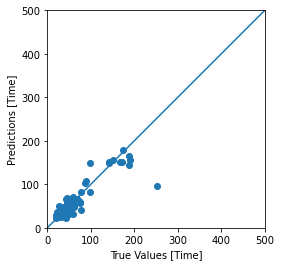

In [201]:
a = plt.axes(aspect='equal')
plt.scatter(real_duration, labels_test)
plt.xlabel('True Values [Time]')
plt.ylabel('Predictions [Time]')
lims = [0, 500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [202]:
def percCal(x,y):
    return (x-y)*100/x

dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])


Text(0.5, 1.0, '132273102')

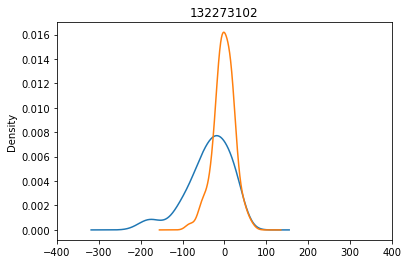

In [203]:
dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])


dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_XGboost'].plot(kind='density')
plt.xlim([-400, 400])
plt.title(list_surgeons[i])


In [204]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]

In [205]:
table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['XGBoost Model', XGBoost_Within, XGBoost_overuse,XGBoost_under]]
print(tabulate(table2))

-------------  -------------------  ------------------  ------------------
Model          Within               Overutilization     Underutilization
CUF Model      0.12941176470588237  0.2                 0.6705882352941176
XGBoost Model  0.38823529411764707  0.3058823529411765  0.3058823529411765
-------------  -------------------  ------------------  ------------------


* #### 4.8.2  Overall with all surgeon models  <a class="anchor" id="4.8.2"></a> 

In [206]:
def generalresults_surgeon(i):
    
    #load model
    planned_bycuf=Loading_Surgeon_models[list_surgeons[i]]["Planned CUF"]
    labels_test=Loading_Surgeon_models[list_surgeons[i]]["Label Test"]
    real_duration=Loading_Surgeon_models[list_surgeons[i]]["Real Duaration"]
    
    #generate table for each speciality
    dataset_predicton = {"Real Duration": real_duration, "Planned by Cuf": planned_bycuf, "Labels from XGBoost": labels_test}
    dataset_predicton=pd.DataFrame(dataset_predicton)
    dataset_predicton
    
    #generate errors for each speciality
    dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
    dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])
    
    #percentage (0-1)- Overutilization
    CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
    XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
    
    # percentage (0-1) - Underutilization
    CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
    XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
    
    #percentage (0-1) - Within
    CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
    XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]
    
    return XGBoost_Within,XGBoost_under,XGBoost_overuse,CUF_Within,CUF_under,CUF_overuse,dataset_predicton.shape[0]

    

In [207]:
#generate a dictionary with labels from XBoost, time Planned by CUF and Real Duration of surgery for each speciality
Overall_surgeon_results={}  

for i in range(len(list_surgeons)):
    Overall_surgeon_results.update({list_surgeons[i]:{}})

for i in range(len(list_surgeons)): # as últimas três tem tao poucas cirugias que não é possivel separar 80/20%
    general_results=generalresults_surgeon(i)
    
    Overall_surgeon_results[list_surgeons[i]].update({"XGBoost":{"Whithin":general_results[0], "Underuse":general_results[1],"Overuse":general_results[2]}})
    Overall_surgeon_results[list_surgeons[i]].update({"Planned CUF":{"Whithin":general_results[3],"Underuse":general_results[4],"Overuse":general_results[5]}})
    Overall_surgeon_results[list_surgeons[i]].update({"Number of Surgeries":general_results[6]})


In [208]:
Number_surgeries=0
Total_Number_surgeries=0

XGBoost_within=0
XGBoost_under=0
XGBoost_over=0

CUF_within=0
CUF_under=0
CUF_over=0

for i in range(len(list_surgeons)):
    
    Number_surgeries=Overall_surgeon_results[list_surgeons[i]]["Number of Surgeries"]
    Total_Number_surgeries=Total_Number_surgeries+Overall_surgeon_results[list_surgeons[i]]["Number of Surgeries"]
    
    XGBoost_within=XGBoost_within+Overall_surgeon_results[list_surgeons[i]]["XGBoost"]["Whithin"]*Number_surgeries
    XGBoost_under=XGBoost_under+Overall_surgeon_results[list_surgeons[i]]["XGBoost"]["Underuse"]*Number_surgeries
    XGBoost_over=XGBoost_over+Overall_surgeon_results[list_surgeons[i]]["XGBoost"]["Overuse"]*Number_surgeries
    
    CUF_within=CUF_within+Overall_surgeon_results[list_surgeons[i]]["Planned CUF"]["Whithin"]*Number_surgeries
    CUF_under=CUF_under+Overall_surgeon_results[list_surgeons[i]]["Planned CUF"]["Underuse"]*Number_surgeries
    CUF_over=CUF_over+Overall_surgeon_results[list_surgeons[i]]["Planned CUF"]["Overuse"]*Number_surgeries
    
Total_XGBoost_within=XGBoost_within/Total_Number_surgeries
Total_XGBoost_under=XGBoost_under/Total_Number_surgeries
Total_XGBoost_over=XGBoost_over/Total_Number_surgeries
Total_CUF_within=CUF_within/Total_Number_surgeries
Total_CUF_under=CUF_under/Total_Number_surgeries
Total_CUF_over=CUF_over/Total_Number_surgeries
    
    

In [209]:
table_surgeon_overall = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', Total_CUF_within, Total_CUF_over,Total_CUF_under], ['XGBoost Model', Total_XGBoost_within, Total_XGBoost_over,Total_XGBoost_under]]
print(tabulate(table_surgeon_overall))

-------------  -------------------  -------------------  ------------------
Model          Within               Overutilization      Underutilization
CUF Model      0.18375354210564557  0.27704715541669694  0.5391993024776575
XGBoost Model  0.3281987938676161   0.41233742643319043  0.2594637796991935
-------------  -------------------  -------------------  ------------------


* ### 4.9. SHAP Explanation <a class="anchor" id="4.9"></a>

In [215]:
#choose a number between 0-375 to choose speciality
i=115


position=list_surgeons[i]
X_shap=splittrain_test(position)[0]

bst_doctor = xgb.Booster()
bst_doctor.load_model("Surgeon_specific{}.model".format(i))
   
shap_values = shap.TreeExplainer(bst_doctor).shap_values(X_shap)

explainer = shap.Explainer(bst_doctor)
shap_values1 = explainer(X_shap)

print("Prediction to {} doctor ".format(list_surgeons[i]))

Prediction to 072257981 doctor 


The next explanation shows features each contributing to push the model output from the base value (the average model output over the training dataset we passed) to the model output. Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue. 


#### 3.8.1 SHAP Summary Plot <a class="anchor" id="3.8.1"></a>

The SHAP values for XGBoost explain the margin output of the model, which is the change in log odds of dying for a Cox proportional hazards model. We can see below that the primary risk to a high use time according to the model is procedures.

This summary plot replaces the typical bar chart of feature importance. It tells which features are most important, and also their range of effects over the dataset. The color allows us match how changes in the value of a feature effect the change in time 


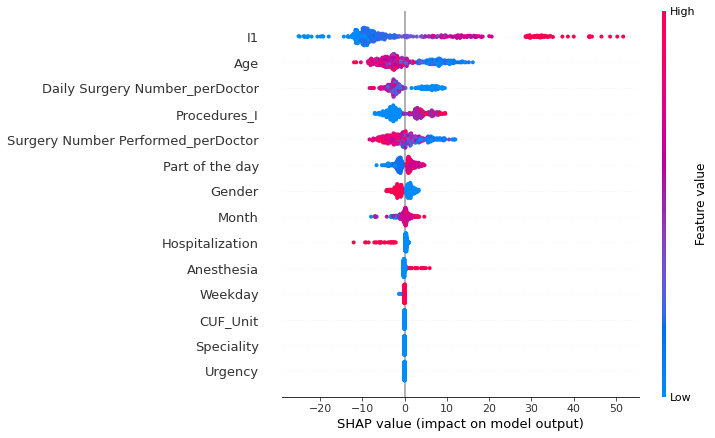

In [216]:
shap.summary_plot(shap_values, X_shap) #65.914215686 CIRURGIA Geral

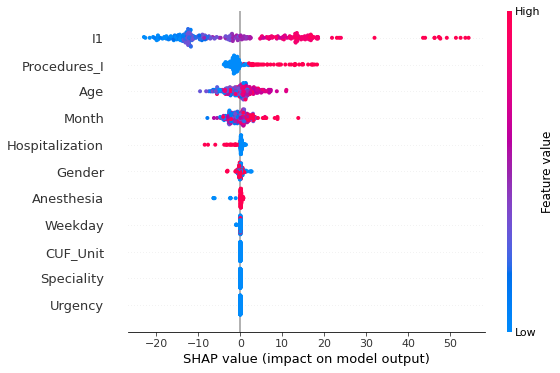

In [143]:
shap.summary_plot(shap_values, X_shap) #72.1094674556213 CG

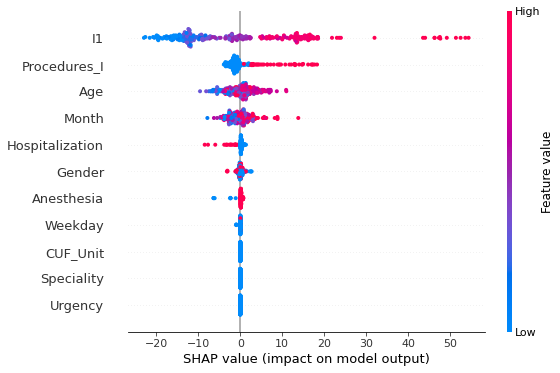

In [144]:
#103.44520 OTORRINOLARINGOLOGIA
shap.summary_plot(shap_values, X_shap)

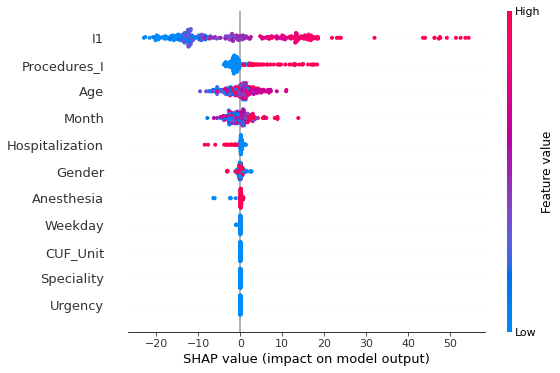

In [145]:
shap.summary_plot(shap_values, X_shap) #60.16153846153846 Genecologia

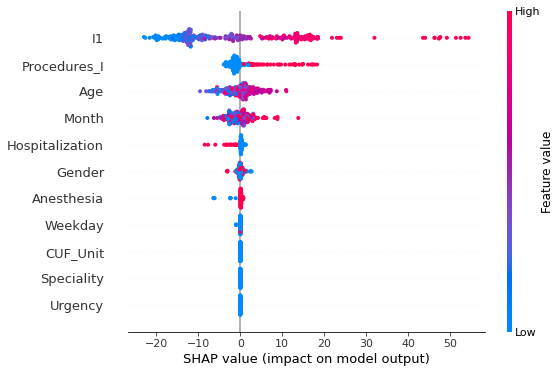

In [146]:
shap.summary_plot(shap_values, X_shap) #56.43810848400556 UROLOGIA

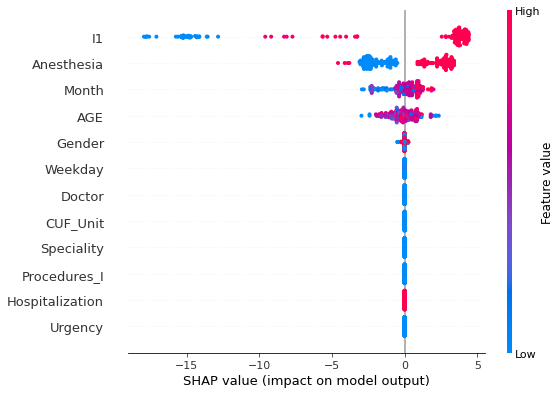

In [292]:
shap.summary_plot(shap_values, X_shap)# 37.00749063670412 OFTALMOLOGIA

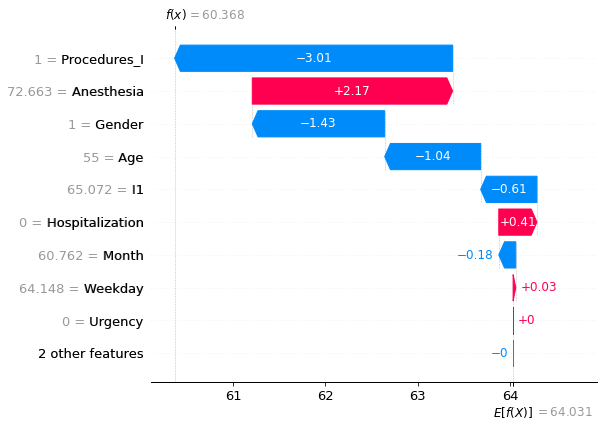

In [107]:
shap.plots.waterfall(shap_values1[0])

#### 3.8.2 SHAP Dependence Plots <a class="anchor" id="3.8.2"></a>

In [108]:
shap.dependence_plot("AGE", shap_values, X_shap)

ValueError: Could not find feature named: AGE

In [ ]:
shap.dependence_plot("Gender", shap_values, X_shap)

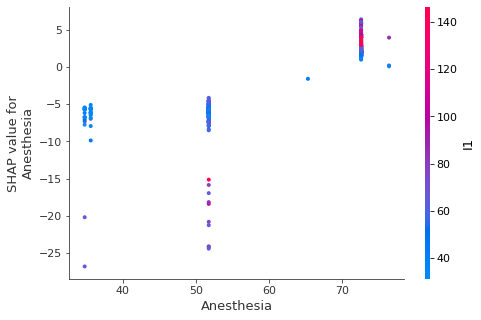

In [109]:
shap.dependence_plot("Anesthesia", shap_values, X_shap)

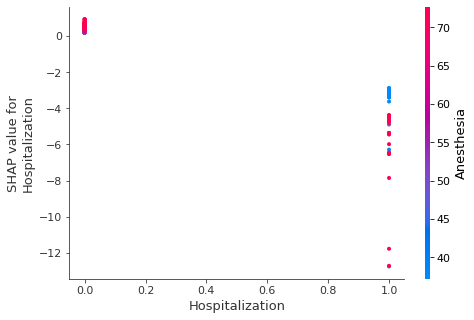

In [110]:
shap.dependence_plot("Hospitalization", shap_values, X_shap)

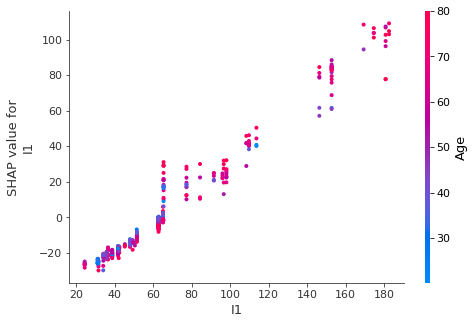

In [111]:
shap.dependence_plot("I1", shap_values, X_shap)

#### 3.8.3 Compute SHAP Interaction Values <a class="anchor" id="3.8.3"></a>

In [112]:
shap_interaction_values = shap.TreeExplainer(bst_doctor).shap_interaction_values(X_shap)

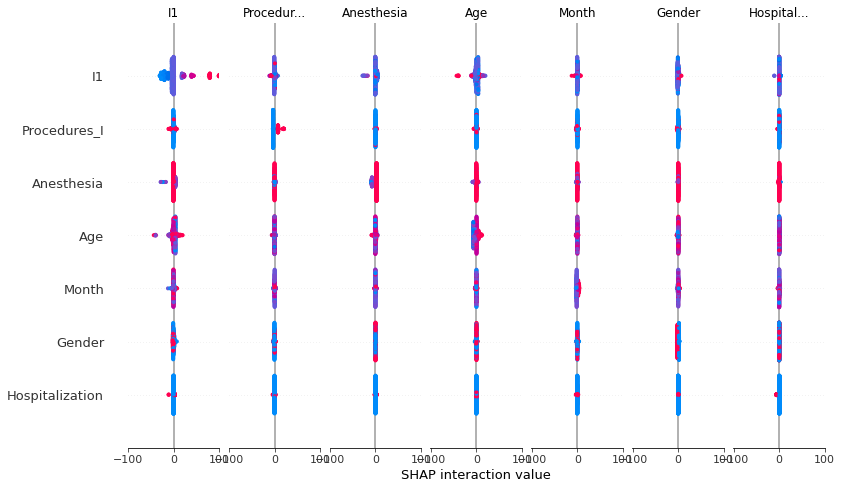

In [113]:
shap.summary_plot(shap_interaction_values, X_shap)

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


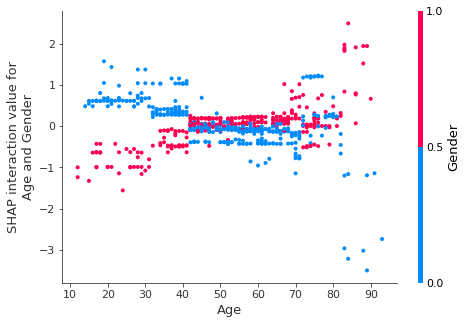

In [115]:
shap.dependence_plot(
    ("Age", "Gender"),
    shap_interaction_values, X_shap
)

-----

## 5.  Create General model <a class="anchor" id="5"></a> 

* ### 5.1. Generate datasets <a class="anchor" id="5.1"></a>

In [6]:
Genenal_Dataset['TrainSet']['CUF_Unit']=Genenal_Dataset['TrainSet']['CUF_Unit'].astype('float')
Genenal_Dataset['TrainSet']['Anesthesia']=Genenal_Dataset['TrainSet']['Anesthesia'].astype('float')
Genenal_Dataset['TrainSet']['Doctor']=Genenal_Dataset['TrainSet']['Doctor'].astype('float')
Genenal_Dataset['TrainSet']['I1']=Genenal_Dataset['TrainSet']['I1'].astype('float')
Genenal_Dataset['TrainSet']['Month']=Genenal_Dataset['TrainSet']['Month'].astype('float')
Genenal_Dataset['TrainSet']['Weekday']=Genenal_Dataset['TrainSet']['Weekday'].astype('float')
Genenal_Dataset['TrainSet']['Procedures_I']=Genenal_Dataset['TrainSet']['Procedures_I'].astype('int64')
Genenal_Dataset['TrainSet']['Daily Surgery Number_perDoctor']=Genenal_Dataset['TrainSet']['Daily Surgery Number_perDoctor'].astype('int64')
Genenal_Dataset['TrainSet']['Surgery Number Performed_perDoctor']=Genenal_Dataset['TrainSet']['Surgery Number Performed_perDoctor'].astype('int64')

Genenal_Dataset['TestSet']['Anesthesia']=Genenal_Dataset['TestSet']['Anesthesia'].astype('float')
Genenal_Dataset['TestSet']['Doctor']=Genenal_Dataset['TestSet']['Doctor'].astype('float')
Genenal_Dataset['TestSet']['CUF_Unit']=Genenal_Dataset['TestSet']['CUF_Unit'].astype('float')
Genenal_Dataset['TestSet']['I1']=Genenal_Dataset['TestSet']['I1'].astype('float')
Genenal_Dataset['TestSet']['Month']=Genenal_Dataset['TestSet']['Month'].astype('float')
Genenal_Dataset['TestSet']['Weekday']=Genenal_Dataset['TestSet']['Weekday'].astype('float')
Genenal_Dataset['TestSet']['Procedures_I']=Genenal_Dataset['TestSet']['Procedures_I'].astype('int64')
Genenal_Dataset['TestSet']['Daily Surgery Number_perDoctor']=Genenal_Dataset['TestSet']['Daily Surgery Number_perDoctor'].astype('int64')
Genenal_Dataset['TestSet']['Surgery Number Performed_perDoctor']=Genenal_Dataset['TestSet']['Surgery Number Performed_perDoctor'].astype('int64')


* ### 5.2. Train -Test Split <a class="anchor" id="5.2"></a>

In [7]:
#generate labellabel=pd.DataFrame(data['DUR_CIRURGIA_REAL'])

y_general=Genenal_Dataset['TrainSet']['Real Room Duration']
X_general=Genenal_Dataset['TrainSet']
X_without_label_general=Genenal_Dataset['TrainSet'].drop(columns=['Real Room Duration'])


In [8]:
# Train and test split using sklearn
def splittrain_test_general():
    
    X_train=Genenal_Dataset['TrainSet'].reset_index(drop=True)
    X_test=Genenal_Dataset['TestSet'].reset_index(drop=True)
    y_train=Genenal_Dataset['TrainSet']['Real Room Duration'].reset_index(drop=True)
    y_test=Genenal_Dataset['TestSet']['Real Room Duration'].reset_index(drop=True)
    
    
    #this is used to see later how accurate are predictions
    X_train_planned=X_train['CUF Planned Duration'] 
    X_test_planned=X_test['CUF Planned Duration']


    X_train=X_train.drop(columns=['CUF Planned Duration'])
    X_test=X_test.drop(columns=['CUF Planned Duration'])
    
    X_train=X_train.drop(columns=['Real Room Duration'])
    X_test=X_test.drop(columns=['Real Room Duration'])
    
    return X_train, X_test, y_train, y_test, X_train_planned,X_test_planned


In [9]:
Splited_data_general={} #creation of dictionaries 

In [10]:
split=splittrain_test_general()

D_train = xgb.DMatrix(split[0], label=split[2])
D_test = xgb.DMatrix(split[1], label=split[3])

Splited_data_general.update({"Splitdataset": [split[0],split[1],split[2],split[3],split[4],split[5] ]})
Splited_data_general.update({"Dmatrixes": [D_train, D_test]})


In [11]:
# Define initial best params and MAPE
def best_parameters1():
    min_mape = float("Inf")
    best_params = None
    for max_depth, min_child_weight in gridsearch_params:
        
    #print("CV with max_depth={}, min_child_weight={}, eta={}, gamma={}, colsample_bytree={},subsample={}".format(max_depth,min_child_weight,eta,gamma,colsample_bytree,subsample))
    # Update our parameters
        params['max_depth'] = max_depth
        params['min_child_weight'] = min_child_weight
    
    # Run CV
        cv_results = xgb.cv(
            params,
            Splited_data_general["Dmatrixes"][0],
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            feval = xgb_within_mape, #if we want to costumize our Evaluation Metric
        
            #if I want to use both metrics
            #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
            maximize=False,
            early_stopping_rounds=10
        )
    # Update best MAPE
    #mean_within = cv_results['test-within-mean'].min()
    #boost_rounds_within = cv_results['test-within-mean'].argmin()
        mean_mape = cv_results['test-within_mape-mean'].min()
        boost_rounds = cv_results['test-within_mape-mean'].argmin()
    
        mean_total=mean_mape
    #mean_total=mean_within+mean_mape
    #print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
        if mean_total < min_mape:
            min_mape = mean_total
            best_params = (max_depth,min_child_weight)
        
    
    print("Best params : max_depth: {}, min_child_weight: {} MAPE: {}".format(best_params[0], best_params[1], min_mape))
    return best_params

In [12]:
# Define initial best params and MAPE
def best_parameters2():
    min_mape = float("Inf")
    best_params_2 = None
    for gamma,colsample_bytree,subsample in gridsearch_params_2:
    #print("CV with max_depth={}, min_child_weight={}, eta={}, gamma={}, colsample_bytree={},subsample={}".format(max_depth,min_child_weight,eta,gamma,colsample_bytree,subsample))
    # Update our parameters
        params['gamma'] = gamma
        params['colsample_bytree'] = colsample_bytree
        params['subsample'] = subsample
    
    # Run CV
        cv_results = xgb.cv(
            params,
            Splited_data_general["Dmatrixes"][0],
            num_boost_round=num_boost_round,
            seed=42,
            nfold=5,
            feval = xgb_within_mape,
        #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
            maximize=False,
            early_stopping_rounds=10
        )
        # Update best MAPE and Within

        #mean_within = cv_results['test-within-mean'].min()
        #boost_rounds_within = cv_results['test-within-mean'].argmin()
        mean_mape = cv_results['test-within_mape-mean'].min()
        boost_rounds = cv_results['test-within_mape-mean'].argmin()

        mean_total=mean_mape
        #mean_total=mean_within+mean_mape #minimize the total mape and 
        #print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
        if mean_total < min_mape:
            min_mape = mean_total
            best_params_2 = (gamma,colsample_bytree,subsample)
    print("Best params: gamma: {},colsample_bytree: {},subsample: {} MAPE: {}".format(best_params_2[0], best_params_2[1],best_params_2[2], min_mape))
    return best_params_2

In [13]:
#Best parameter to eta
# This can take some time…
def best_parameters3():
    min_mape = float("Inf")
    best_params_eta = None
    for eta in np.arange(0.01, 0.35, 0.005):
        #print("CV with eta={}".format(eta))
        # We update our parameters
        params['eta'] = eta
        # Run CV
        cv_results = xgb.cv(
                params,
                Splited_data_general["Dmatrixes"][0],
                num_boost_round=num_boost_round,
                seed=42,
                nfold=5,
                feval = xgb_within_mape,
                #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
                maximize=False,
                early_stopping_rounds=10
              )
        # Update best score

        #mean_within = cv_results['test-within-mean'].min()
        #boost_rounds_within = cv_results['test-within-mean'].argmin()
        mean_mape = cv_results['test-within_mape-mean'].min()
        boost_rounds = cv_results['test-within_mape-mean'].argmin()

        mean_total=mean_mape
        #mean_total=mean_within+mean_mape #minimize the total mape and within
        #print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
        if mean_total < min_mape:
            min_mape = mean_total
            best_params_eta = eta
    print("Best params: {}, MAPE: {}".format(best_params_eta, min_mape))
    return best_params_eta


In [14]:
def set_parameters():
    best1=best_parameters1()
    best2=best_parameters2()
    best3=best_parameters3()
    params = {
        # Parameters that we are going to tune.
        'max_depth':best1[0],
        'min_child_weight': best1[1],
        'eta':best3,
        'colsample_bytree': best2[1],
        'subsample': best2[2],
        'gamma': best2[0],
        # Other parameters 
        'objective':'reg:squarederror', # regression MSE
        #the parameter disable_default_eval_metric is used to suppress the default metric in XGBoost.
        'disable_default_eval_metric': 1
    }

    #params['eval_metric'] = "mape"
    num_boost_round = 999
    return params

In [15]:
def training_with_early_stopping_rounds():
    parameters=set_parameters()
    model = xgb.train(
        parameters,
        Splited_data_general["Dmatrixes"][0],
        num_boost_round=num_boost_round,
        evals=[(Splited_data_general["Dmatrixes"][1], "Test")],
        early_stopping_rounds=10,
        feval = xgb_within_mape,
        #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
        maximize=False
    )


    #print("Best MAPE: {:.2f} in {} rounds".format(model.best_score, model.best_iteration+1))
    return model.best_score,model.best_iteration+1,parameters


In [16]:
#remove early_stopping_rounds=10 to find best model

#num_boost_round = model.best_iteration + 1

def training_without_early_stopping_rounds():
    train_without=training_with_early_stopping_rounds()
    num_boost_round=train_without[1]

    best_model = xgb.train(
        train_without[2],
        Splited_data_general["Dmatrixes"][0],
        num_boost_round=num_boost_round,
        evals=[(Splited_data_general["Dmatrixes"][1], "Test")],
        feval = xgb_within_mape,
        #feval = lambda preds, D_train: [xgb_within(preds, D_train), xgb_mape(preds, D_train)],
        maximize=False
    )


    return train_without[2],best_model


* ### 5.6. Save Model <a class="anchor" id="5.6"></a>

In [109]:
def save_model_General():
    pos_training=training_without_early_stopping_rounds()
    best_model=pos_training[1]
    parameters=pos_training[0]
    
    name="General.model"
    best_model.save_model(name)
    
    return best_model,parameters,name

In [110]:
Dictionary_General_model={} 

Dictionary_General_model.update({"Data": [X_general, y_general]})
model=save_model_General()
Dictionary_General_model.update({"BestParameters": [model[0],model[1],model[2]]})

Best params : max_depth: 14, min_child_weight: 6 MAPE: 0.010598400000000001
Best params: gamma: 0.2,colsample_bytree: 1,subsample: 1 MAPE: 0.0108326
Best params: 0.039999999999999994, MAPE: -0.0026406
[0]	Test-within_mape:0.94541
[1]	Test-within_mape:0.90278
[2]	Test-within_mape:0.86194
[3]	Test-within_mape:0.82267
[4]	Test-within_mape:0.78503
[5]	Test-within_mape:0.74890
[6]	Test-within_mape:0.71429
[7]	Test-within_mape:0.68028
[8]	Test-within_mape:0.64687
[9]	Test-within_mape:0.61559
[10]	Test-within_mape:0.58517
[11]	Test-within_mape:0.55616
[12]	Test-within_mape:0.52881
[13]	Test-within_mape:0.50114
[14]	Test-within_mape:0.47439
[15]	Test-within_mape:0.44881
[16]	Test-within_mape:0.42314
[17]	Test-within_mape:0.39982
[18]	Test-within_mape:0.37448
[19]	Test-within_mape:0.35246
[20]	Test-within_mape:0.33065
[21]	Test-within_mape:0.30943
[22]	Test-within_mape:0.29013
[23]	Test-within_mape:0.27086
[24]	Test-within_mape:0.24972
[25]	Test-within_mape:0.23202
[26]	Test-within_mape:0.21444

* ### 5.7. Load Model <a class="anchor" id="5.7"></a>

In [52]:
#generate a dictionary with labels from XBoost, time Planned by CUF and Real Duration of surgery for each speciality
Loading_Geral_models={}  

bst_general = xgb.Booster()
name="General.model"
Loading_Geral_models.update({"Load Model":bst_general.load_model(name)})
Loading_Geral_models.update({"Label Test":bst_general.predict(Splited_data_general["Dmatrixes"][1])})
Loading_Geral_models.update({"Planned CUF":Splited_data_general["Splitdataset"][5]})
Loading_Geral_models.update({"Real Duaration":Splited_data_general["Splitdataset"][3]})

             

* ### 5.8. Prediction <a class="anchor" id="5.8"></a>

In [18]:
planned_bycuf=Loading_Geral_models["Planned CUF"]
labels_test=Loading_Geral_models["Label Test"]
real_duration=Loading_Geral_models["Real Duaration"]


In [19]:
dataset_predicton = {"Real Duration": real_duration, "Planned by Cuf": planned_bycuf, "Labels from XGBoost": labels_test}
dataset_predicton=pd.DataFrame(dataset_predicton)
dataset_predicton

,Real Duration,Planned by Cuf,Labels from XGBoost
0,41,60,40.607834
1,55,60,63.093517
2,12,60,27.167685
3,53,60,90.247955
4,55,30,65.219688
...,...,...,...
16972,19,20,17.124981
16973,90,90,87.226151
16974,94,60,27.933104
16975,33,60,36.837681


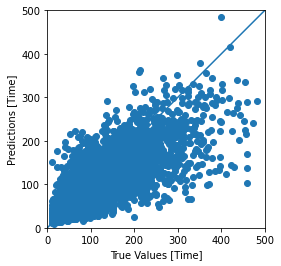

In [20]:
a = plt.axes(aspect='equal')
plt.scatter(real_duration, labels_test)
plt.xlabel('True Values [Time]')
plt.ylabel('Predictions [Time]')
lims = [0, 500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [21]:
def percCal(x,y):
    return (x-y)*100/x

NameError: name 'i' is not defined

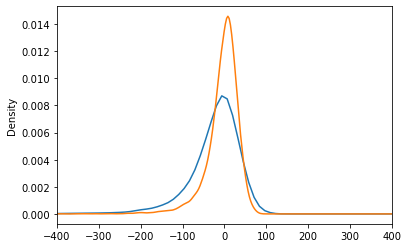

In [22]:
dataset_predicton['Error_XGboost'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Labels from XGBoost'])
dataset_predicton['Error_CUF'] = percCal(dataset_predicton['Real Duration'], dataset_predicton['Planned by Cuf'])


dataset_predicton['Error_CUF'].plot(kind='density')
dataset_predicton['Error_XGboost'].plot(kind='density')
plt.xlim([-400, 400])
plt.title(list_surgeons[i])

In [23]:
#Overutilization 
CUF_overuse=dataset_predicton[dataset_predicton['Error_CUF']>10].shape[0]/dataset_predicton.shape[0]
XGBoost_overuse=dataset_predicton[dataset_predicton['Error_XGboost']>10].shape[0]/dataset_predicton.shape[0]
#Underutilization
CUF_under=dataset_predicton[dataset_predicton['Error_CUF']<-10].shape[0]/dataset_predicton.shape[0]
XGBoost_under=dataset_predicton[dataset_predicton['Error_XGboost']<-10].shape[0]/dataset_predicton.shape[0]
#Within
CUF_Within=dataset_predicton[dataset_predicton['Error_CUF'].abs()<=10].shape[0]/dataset_predicton.shape[0]
XGBoost_Within=dataset_predicton[dataset_predicton['Error_XGboost'].abs()<=10].shape[0]/dataset_predicton.shape[0]

In [24]:
table2 = [['Model', 'Within', 'Overutilization','Underutilization'], ['CUF Model', CUF_Within, CUF_overuse,CUF_under], ['XGBoost Model', XGBoost_Within, XGBoost_overuse,XGBoost_under]]
print(tabulate(table2))

-------------  -------------------  -------------------  -------------------
Model          Within               Overutilization      Underutilization
CUF Model      0.1920245037403546   0.28626965895034456  0.5217058373093009
XGBoost Model  0.27437120810508336  0.38699416858102137  0.33863462331389527
-------------  -------------------  -------------------  -------------------


* ### 5.9.  <a class="anchor" id="5.9"></a>

In [25]:
print(bst_general.feature_importances_)

AttributeError: 'Booster' object has no attribute 'feature_importances_'

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

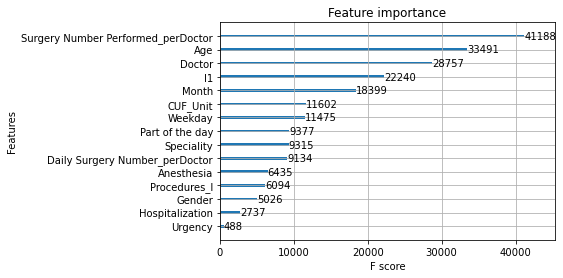

In [80]:

plot_importance(bst_general)

In [79]:
from xgboost import plot_importance



In [54]:
sorted_idx = bst_general.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], bst_general.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

AttributeError: 'Booster' object has no attribute 'feature_importances_'

In [70]:
bst_general.get_score(importance_type='weight')

{'I1': 22240,
 'Doctor': 28757,
 'Surgery Number Performed_perDoctor': 41188,
 'Speciality': 9315,
 'Procedures_I': 6094,
 'Age': 33491,
 'Month': 18399,
 'CUF_Unit': 11602,
 'Part of the day': 9377,
 'Daily Surgery Number_perDoctor': 9134,
 'Anesthesia': 6435,
 'Weekday': 11475,
 'Hospitalization': 2737,
 'Gender': 5026,
 'Urgency': 488}

In [124]:
feature_important = bst_general.get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

<AxesSubplot:>

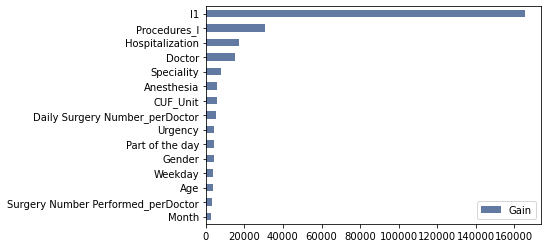

In [125]:
data = pd.DataFrame(data=values, index=keys, columns=["gain"]).sort_values(by = "gain", ascending=True)
data = data.rename(columns={'gain': 'Gain'})

data.plot(kind='barh',color="#627aa1", label='Gain')

In [126]:
feature_important = bst_general.get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

<AxesSubplot:>

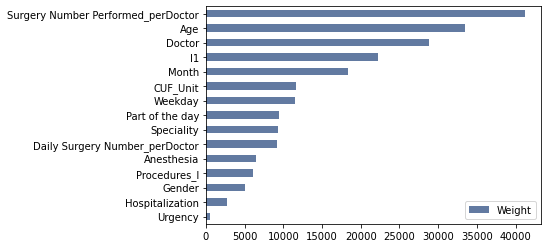

In [127]:
data = pd.DataFrame(data=values, index=keys, columns=["weight"]).sort_values(by = "weight", ascending=True)
data = data.rename(columns={'weight': 'Weight'})

data.plot(kind='barh',color="#627aa1", label='Weight')

In [129]:
feature_important = bst_general.get_score(importance_type='cover')
keys = list(feature_important.keys())
values = list(feature_important.values())

<AxesSubplot:>

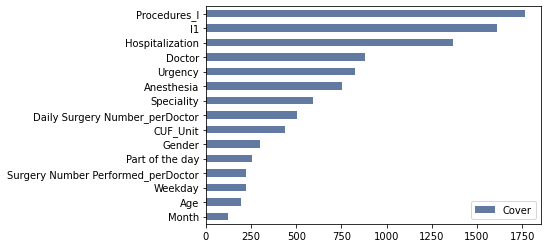

In [130]:
data = pd.DataFrame(data=values, index=keys, columns=["cover"]).sort_values(by = "cover", ascending=True)
data = data.rename(columns={'cover': 'Cover'})

data.plot(kind='barh',color="#627aa1", label='Cover')

In [38]:

X_shap=splittrain_test_general()[0]

bst_general = xgb.Booster()
bst_general.load_model("General.model")
   
shap_values = shap.TreeExplainer(bst_general).shap_values(X_shap)

explainer = shap.Explainer(bst_general)
shap_values1 = explainer(X_shap)


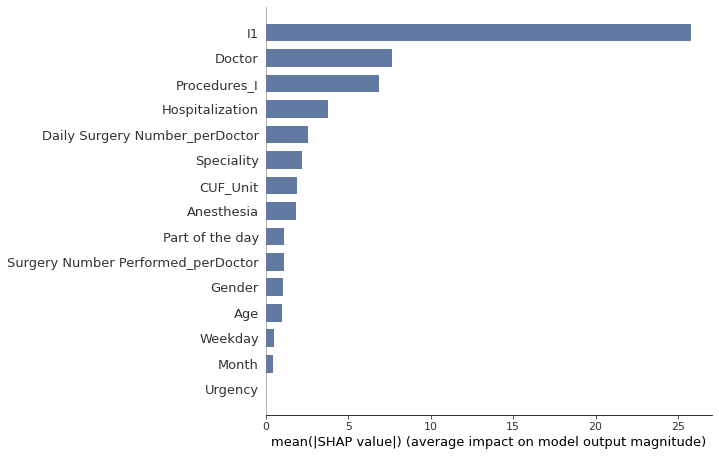

In [44]:
shap.summary_plot(shap_values, X_shap, plot_type="bar",color="#627aa1")

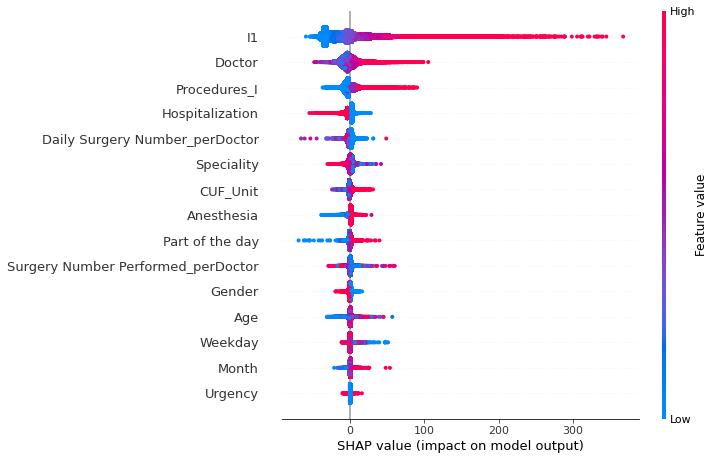

In [122]:
shap.summary_plot(shap_values, X_shap)

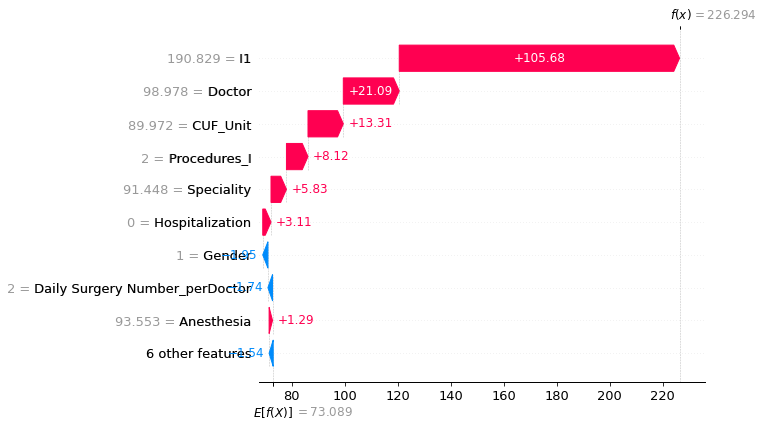

In [123]:
shap.plots.waterfall(shap_values1[0])